# Temperature Forecast Project

# 1. Introduction

# Project Description
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

# Dataset Attributes

1. station - Used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (°): 37.456 to 37.645
20. lon - Longitude (°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (°C): 11.3 to 29.8

# Objective:
The objective of this project is to develop separate machine learning models for predicting the minimum and maximum air temperatures for the next day in Seoul, South Korea. These models aim to improve the accuracy of temperature forecasts provided by the LDAPS model operated by the Korea Meteorological Administration. By leveraging historical weather data and various environmental variables, the goal is to provide more reliable temperature forecasts, which can be crucial for various sectors such as agriculture, transportation, and urban planning.

# Input Data:
The input data consists of summer weather data from 2013 to 2017, including features such as present-day temperatures, LDAPS model forecasts, geographic auxiliary variables (latitude, longitude, elevation, slope), and solar radiation. Each data point is associated with a weather station number, date, and present-day maximum and minimum temperatures.

# Output:
The primary outputs of the project are two separate machine learning models:

1.Minimum Temperature Prediction Model: This model predicts the minimum air temperature for the next day.

2.Maximum Temperature Prediction Model: This model predicts the maximum air temperature for the next day.

# Conclusion:
By developing accurate temperature prediction models, this project aims to contribute to improved weather forecasting capabilities, which can have significant implications for various industries and public services reliant on weather information.

# 2. Data Cleaning

# Import important library :

In [1]:
import warnings
warnings.simplefilter("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 




import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesClassifier, ExtraTreesRegressor
from xgboost import XGBRegressor


In [2]:
df= pd.read_csv(r'https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Temperature%20Forecast/temperature.csv')

In [3]:
df

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

In [4]:
df.head()#first 5 rows

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [5]:
df[3500:3530]#middle 30 rows

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
3500      1.0  16-07-2015          24.9          18.6    52.554024   
3501      2.0  16-07-2015          28.1          20.8    47.996681   
3502      3.0  16-07-2015          27.6          21.9    44.615089   
3503      4.0  16-07-2015          27.9          21.4    55.676704   
3504      5.0  16-07-2015          27.0          21.7    54.640724   
3505      6.0  16-07-2015          27.3          22.2    47.413029   
3506      7.0  16-07-2015          27.7          22.7    50.674923   
3507      8.0  16-07-2015          27.7          22.0    45.682571   
3508      9.0  16-07-2015          27.9          22.7    47.412777   
3509     10.0  16-07-2015          27.5          21.4    50.768871   
3510     11.0  16-07-2015          27.6          22.1    48.826984   
3511     12.0  16-07-2015          25.5          20.4    44.158756   
3512     13.0  16-07-2015          27.5          22.3    46.414993   
3513     14.0  16-07-2015          28.5          22.5    42.963570   
3514     15.0  16-07-2015          28.5          22.0    42.962669   
3515     16.0  16-07-2015          27.1          21.3    51.366573   
3516     17.0  16-07-2015          27.3          21.2    50.889595   
3517     18.0  16-07-2015          28.4          22.5    50.582809   
3518     19.0  16-07-2015          27.5          21.2    44.802322   
3519     20.0  16-07-2015          28.0          21.6    56.182396   
3520     21.0  16-07-2015          27.2          22.4    44.532288   
3521     22.0  16-07-2015          26.7          20.8    51.647167   
3522     23.0  16-07-2015          28.5          23.2    46.491970   
3523     24.0  16-07-2015          28.5          23.1    43.611397   
3524     25.0  16-07-2015          27.5          22.6    42.952435   
3525      1.0  17-07-2015          24.9          15.8    59.003597   
3526      2.0  17-07-2015          27.7          18.2    59.030140   
3527      3.0  17-07-2015          27.3          18.7    55.146214   
3528      4.0  17-07-2015          28.0          18.8    65.582771   
3529      5.0  17-07-2015          27.4          19.3    64.074944   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
3500    78.846832         25.369729         17.383150   8.049364   83.091743   
3501    77.784775         26.804459         17.156785   9.477357   58.350286   
3502    72.429703         27.071803         17.909741   8.961904   13.247850   
3503    81.990944         26.231837         16.948972  10.580381   87.523744   
3504    89.016106         25.581294         18.331114  10.360243  124.799527   
3505    74.738480         26.514436         18.847538   9.390921   61.093527   
3506    78.260529         27.222967         17.887766   7.502012  154.001078   
3507    69.411613         27.539571         19.135626   9.401081   51.554702   
3508    77.808907         27.389729         17.869455   8.230478  101.784772   
3509    78.059441         25.593559         17.627623  10.997302   69.214888   
3510    78.105362         26.300232         18.944415   8.454755   61.578650   
3511    69.258789         26.704322         17.724483   9.836863   27.743769   
3512    74.244392         26.483903         17.766203   7.854699   29.974511   
3513    67.390396         28.066811         19.191880   9.496553   18.265907   
3514    67.702713         27.995275         18.817449   8.122669   35.184304   
3515    79.549828         26.198232         18.381435   9.408139   95.659278   
3516    85.160789         26.191935         16.964620   6.736997   94.811667   
3517    79.043839         26.275621         18.702943   9.094306   96.848457   
3518    76.358749         27.508643         17.475104   7.793283   46.261174   
3519    82.407356         25.403350         17.207938  12.256389   85.073957   
3520    71.266159         27.171374         18.235661   9.692062   16.050177   
3521    81.088921         26.015883         19.284575   9.296423  105.91766

In [6]:
df.tail()#last 5 rows

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[5 rows x 25 columns]

# Exploratory Data Analysis (EDA)

In [7]:
df.shape

(7752, 25)

The dataset consists of 7752 rows and 25 columns, which include both features and labels.

In [8]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

Missing values were detected in the columns

In [9]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [10]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

All features contain float64 data except for the Date column, which contains object data.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [12]:
df.duplicated().sum()

0

In the dataset, there are no duplicate values present.

In [13]:
# checking the number of unique values in each column
df.nunique().to_frame("no.of unique values")

no.of unique values
station                            25
Date                              310
Present_Tmax                      167
Present_Tmin                      155
LDAPS_RHmin                      7672
LDAPS_RHmax                      7664
LDAPS_Tmax_lapse                 7675
LDAPS_Tmin_lapse                 7675
LDAPS_WS                         7675
LDAPS_LH                         7675
LDAPS_CC1                        7569
LDAPS_CC2                        7582
LDAPS_CC3                        7599
LDAPS_CC4                        7524
LDAPS_PPT1                       2812
LDAPS_PPT2                       2510
LDAPS_PPT3                       2356
LDAPS_PPT4                       1918
lat                                12
lon                                25
DEM                                25
Slope                              27
Solar radiation                  1575
Next_Tmax                         183
Next_Tmin                         157

In [14]:
df.shape

(7752, 25)

In [15]:
# checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print('/n')

station
1.0     310
14.0    310
24.0    310
23.0    310
22.0    310
21.0    310
20.0    310
19.0    310
18.0    310
17.0    310
16.0    310
15.0    310
13.0    310
2.0     310
12.0    310
11.0    310
10.0    310
9.0     310
8.0     310
7.0     310
6.0     310
5.0     310
4.0     310
3.0     310
25.0    310
Name: count, dtype: int64
/n
Date
30-06-2013    25
18-07-2016    25
25-07-2016    25
24-07-2016    25
23-07-2016    25
              ..
09-08-2014    25
08-08-2014    25
07-08-2014    25
06-08-2014    25
30-08-2017    25
Name: count, Length: 310, dtype: int64
/n
Present_Tmax
31.4    112
29.4    111
29.1    108
29.7    107
31.9    105
       ... 
36.9      1
21.2      1
20.1      1
36.4      1
20.3      1
Name: count, Length: 167, dtype: int64
/n
Present_Tmin
24.0    161
23.8    153
23.1    144
23.5    143
23.3    142
       ... 
13.6      1
14.2      1
29.1      1
29.7      1
15.0      1
Name: count, Length: 155, dtype: int64
/n
LDAPS_RHmin
19.794666    2
71.658089    2
77.030350    

From the above result, it's evident that there are zero values and no white spaces present in the dataset.

In [16]:
nul_val=df.isnull()

In [17]:
#returns counts of values where True if null
for column in nul_val.columns.values.tolist():
    print(column)
    print (nul_val[column].value_counts())
    print("")  

station
station
False    7750
True        2
Name: count, dtype: int64

Date
Date
False    7750
True        2
Name: count, dtype: int64

Present_Tmax
Present_Tmax
False    7682
True       70
Name: count, dtype: int64

Present_Tmin
Present_Tmin
False    7682
True       70
Name: count, dtype: int64

LDAPS_RHmin
LDAPS_RHmin
False    7677
True       75
Name: count, dtype: int64

LDAPS_RHmax
LDAPS_RHmax
False    7677
True       75
Name: count, dtype: int64

LDAPS_Tmax_lapse
LDAPS_Tmax_lapse
False    7677
True       75
Name: count, dtype: int64

LDAPS_Tmin_lapse
LDAPS_Tmin_lapse
False    7677
True       75
Name: count, dtype: int64

LDAPS_WS
LDAPS_WS
False    7677
True       75
Name: count, dtype: int64

LDAPS_LH
LDAPS_LH
False    7677
True       75
Name: count, dtype: int64

LDAPS_CC1
LDAPS_CC1
False    7677
True       75
Name: count, dtype: int64

LDAPS_CC2
LDAPS_CC2
False    7677
True       75
Name: count, dtype: int64

LDAPS_CC3
LDAPS_CC3
False    7677
True       75
Name: count, dtype: in

In [18]:
#Checking null values-
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [19]:
df.isnull().sum().sum()

1248

<Axes: >

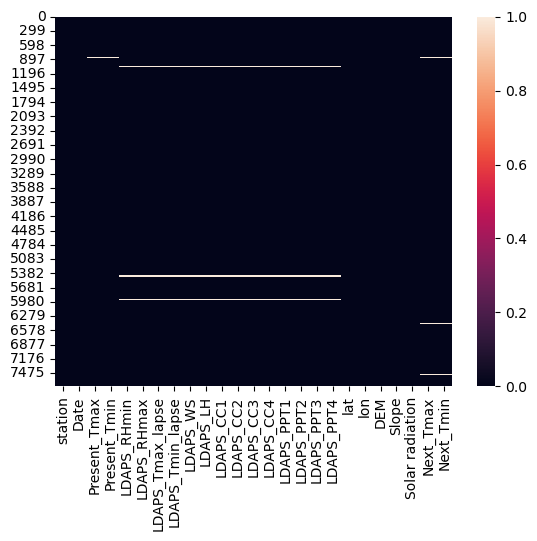

In [20]:
sns.heatmap(df.isnull())

Rather than addressing the few null values present in the dataset, we will opt to drop them directly.

In [21]:
df.dropna(inplace=True)

In [22]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [23]:
df.isnull().sum().sum()

0

<Axes: >

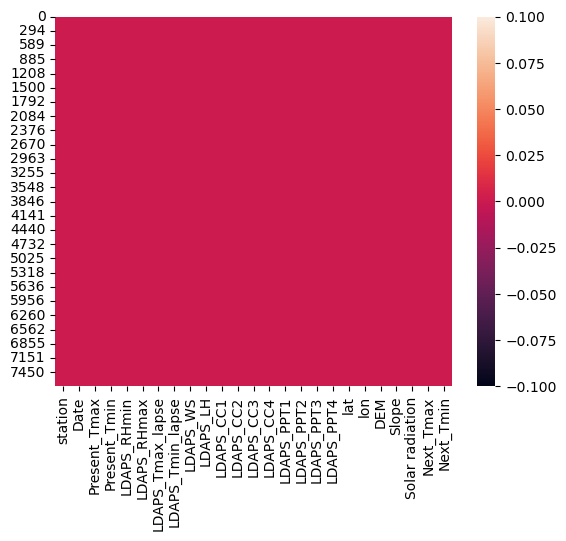

In [24]:
sns.heatmap(df.isnull())

In the dataset, there are no null values present.

In [25]:
#Convert date time format-

In [26]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [27]:
df['Date']=pd.to_datetime(df.Date,format='%d-%m-%Y')

In [28]:
df.dtypes

station                    float64
Date                datetime64[ns]
Present_Tmax               float64
Present_Tmin               float64
LDAPS_RHmin                float64
LDAPS_RHmax                float64
LDAPS_Tmax_lapse           float64
LDAPS_Tmin_lapse           float64
LDAPS_WS                   float64
LDAPS_LH                   float64
LDAPS_CC1                  float64
LDAPS_CC2                  float64
LDAPS_CC3                  float64
LDAPS_CC4                  float64
LDAPS_PPT1                 float64
LDAPS_PPT2                 float64
LDAPS_PPT3                 float64
LDAPS_PPT4                 float64
lat                        float64
lon                        float64
DEM                        float64
Slope                      float64
Solar radiation            float64
Next_Tmax                  float64
Next_Tmin                  float64
dtype: object

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7588 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   station           7588 non-null   float64       
 1   Date              7588 non-null   datetime64[ns]
 2   Present_Tmax      7588 non-null   float64       
 3   Present_Tmin      7588 non-null   float64       
 4   LDAPS_RHmin       7588 non-null   float64       
 5   LDAPS_RHmax       7588 non-null   float64       
 6   LDAPS_Tmax_lapse  7588 non-null   float64       
 7   LDAPS_Tmin_lapse  7588 non-null   float64       
 8   LDAPS_WS          7588 non-null   float64       
 9   LDAPS_LH          7588 non-null   float64       
 10  LDAPS_CC1         7588 non-null   float64       
 11  LDAPS_CC2         7588 non-null   float64       
 12  LDAPS_CC3         7588 non-null   float64       
 13  LDAPS_CC4         7588 non-null   float64       
 14  LDAPS_PPT1        7588 non-nu

We will designate the Date column as the index.

In [30]:
df.set_index('Date',inplace=True)
df


station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Date                                                                        
2013-06-30      1.0          28.7          21.4    58.255688    91.116364   
2013-06-30      2.0          31.9          21.6    52.263397    90.604721   
2013-06-30      3.0          31.6          23.3    48.690479    83.973587   
2013-06-30      4.0          32.0          23.4    58.239788    96.483688   
2013-06-30      5.0          31.4          21.9    56.174095    90.155128   
...             ...           ...           ...          ...          ...   
2017-08-30     21.0          23.1          17.8    24.688997    78.261383   
2017-08-30     22.0          22.5          17.4    30.094858    83.690018   
2017-08-30     23.0          23.3          17.1    26.741310    78.869858   
2017-08-30     24.0          23.3          17.7    24.040634    77.294975   
2017-08-30     25.0          23.2          17.4    22.933014    77.243744   

            LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
Date                                                                   
2013-06-30         28.074101         23.006936  6.818887   69.451805   
2013-06-30         29.850689         24.035009  5.691890   51.937448   
2013-06-30         30.091292         24.565633  6.138224   20.573050   
2013-06-30         29.704629         23.326177  5.650050   65.727144   
2013-06-30         29.113934         23.486480  5.735004  107.965535   
...                      ...               ...       ...         ...   
2017-08-30         27.812697         18.303014  6.603253    9.614074   
2017-08-30         26.704905         17.814038  5.768083   82.146707   
2017-08-30         26.352081         18.775678  6.148918   72.058294   
2017-08-30         27.010193         18.733519  6.542819   47.241457   
2017-08-30         27.939516         18.522965  7.289264    9.090034   

            LDAPS_CC1  ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat  \
Date                   ...                                                
2013-06-30   0.233947  ...         0.0         0.0         0.0  37.6046   
2013-06-30   0.225508  ...         0.0         0.0         0.0  37.6046   
2013-06-30   0.209344  ...         0.0         0.0         0.0  37.5776   
2013-06-30   0.216372  ...         0.0         0.0         0.0  37.6450   
2013-06-30   0.151407  ...         0.0         0.0         0.0  37.5507   
...               ...  ...         ...         ...         ...      ...   
2017-08-30   0.052902  ...         0.0         0.0         0.0  37.5507   
2017-08-30   0.066461  ...         0.0         0.0         0.0  37.5102   
2017-08-30   0.030034  ...         0.0         0.0         0.0  37.5372   
2017-08-30   0.035874  ...         0.0         0.0         0.0  37.5237   
2017-08-30   0.048954  ...         0.0         0.0         0.0  37.5237   

                lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  
Date                                                                          
2013-06-30  126.991  212.3350  2.7850      5992.895996       29.1       21.2  
2013-06-30  127.032   44.7624  0.5141      5869.312500       30.5       22.5  
2013-06-30  127.058   33.3068  0.2661      5863.555664       31.1       23.9  
2013-06-30  127.022   45.7160  2.5348      5856.964844       31.7       24.3  
2013-06-30  127.135   35.0380  0.5055      5859.552246       31.2       22.5  
...             ...       ...     ...              ...        ...        ...  
2017-08-30  127.040   26.2980  0.5721      4456.024414       27.6       17.7  
2017-08-30  127.086   21.9668  0.1332      4441.803711       28.0       17.1  
2017-08-30  126.891   15.5876  0.1554      4443.313965       28.3       18.1  
2017-08-30  126.909   17.2956  0.2223      4438.373535       28.6       18.8  
2017-08-30  126.970   19.5844  0.2713      4451.345215       27.8       17.4  

[7588 rows x 24 columns]

In [31]:
df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7588.000000   7588.000000   7588.000000  7588.000000  7588.000000   
mean     13.014101     29.748366     23.195809    56.724969    88.360823   
std       7.217858      2.967401      2.400880    14.626559     7.199456   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.600000    45.960243    84.203724   
50%      13.000000     29.900000     23.400000    55.023199    89.784122   
75%      19.000000     32.000000     24.800000    67.115099    93.742725   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7588.000000       7588.000000  7588.000000  7588.000000   
mean          29.620128         23.511786     7.094097    62.492606   
std            2.943496          2.342579     2.177034    33.686158   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673756         22.086820     5.675358    37.206201   
50%           29.709537         23.758249     6.547838    56.898324   
75%           31.711109         25.155660     8.028960    84.235666   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...   LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat  \
count  7588.000000  ...  7588.000000  7588.000000  7588.000000  7588.000000   
mean      0.368510  ...     0.480738     0.275007     0.265373    37.544792   
std       0.262260  ...     1.743327     1.146087     1.179661     0.050428   
min       0.000000  ...     0.000000     0.000000     0.000000    37.456200   
25%       0.146546  ...     0.000000     0.000000     0.000000    37.510200   
50%       0.315706  ...     0.000000     0.000000     0.000000    37.550700   
75%       0.574174  ...     0.017735     0.007855     0.000017    37.577600   
max       0.967277  ...    21.621661    15.841235    16.655469    37.645000   

              lon          DEM        Slope  Solar radiation    Next_Tmax  \
count  7588.00000  7588.000000  7588.000000      7588.000000  7588.000000   
mean    126.99142    61.918136     1.259755      5343.724208    30.241526   
std       0.07922    54.323529     1.372748       429.782561     3.111807   
min     126.82600    12.370000     0.098500      4329.520508    17.400000   
25%     126.93700    28.700000     0.271300      5001.485717    28.200000   
50%     126.99500    45.716000     0.618000      5441.987305    30.400000   
75%     127.04200    59.832400     1.767800      5729.485840    32.600000   
max     127.13500   212.335000     5.178200      5992.895996    38.900000   

         Next_Tmin  
count  7588.000000  
mean     22.910820  
std       2.482256  
min      11.300000  
25%      21.300000  
50%      23.100000  
75%      24.600000  
max      29.800000  

[8 rows x 24 columns]

# Observations-
- All columns have the same count of observations, indicating no null values in the dataset.
- Columns including LDAPS_RHmin, LDAPS_WS, LDAPS_LH, LDAPS_CC1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, DEM, and Slope exhibit mean values greater than the median, suggesting potential right skewness.
- Columns such as Present_Tmax, Present_Tmin, LDAPS_RHmax, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, Solar radiation, and Next_Tmin display median values higher than the mean, indicating potential left skewness.
- There exists a significant disparity between the 75th percentile and the maximum value in columns such as LDAPS_RHmin, LDAPS_RHmax, LDAPS_Tmax_lapse, LDAPS_WS, LDAPS_LH, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, DEM, and Slope, hinting at the presence of outliers.

In [32]:
df10=df

In [33]:
df10

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Date                                                                        
2013-06-30      1.0          28.7          21.4    58.255688    91.116364   
2013-06-30      2.0          31.9          21.6    52.263397    90.604721   
2013-06-30      3.0          31.6          23.3    48.690479    83.973587   
2013-06-30      4.0          32.0          23.4    58.239788    96.483688   
2013-06-30      5.0          31.4          21.9    56.174095    90.155128   
...             ...           ...           ...          ...          ...   
2017-08-30     21.0          23.1          17.8    24.688997    78.261383   
2017-08-30     22.0          22.5          17.4    30.094858    83.690018   
2017-08-30     23.0          23.3          17.1    26.741310    78.869858   
2017-08-30     24.0          23.3          17.7    24.040634    77.294975   
2017-08-30     25.0          23.2          17.4    22.933014    77.243744   

            LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
Date                                                                   
2013-06-30         28.074101         23.006936  6.818887   69.451805   
2013-06-30         29.850689         24.035009  5.691890   51.937448   
2013-06-30         30.091292         24.565633  6.138224   20.573050   
2013-06-30         29.704629         23.326177  5.650050   65.727144   
2013-06-30         29.113934         23.486480  5.735004  107.965535   
...                      ...               ...       ...         ...   
2017-08-30         27.812697         18.303014  6.603253    9.614074   
2017-08-30         26.704905         17.814038  5.768083   82.146707   
2017-08-30         26.352081         18.775678  6.148918   72.058294   
2017-08-30         27.010193         18.733519  6.542819   47.241457   
2017-08-30         27.939516         18.522965  7.289264    9.090034   

            LDAPS_CC1  ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat  \
Date                   ...                                                
2013-06-30   0.233947  ...         0.0         0.0         0.0  37.6046   
2013-06-30   0.225508  ...         0.0         0.0         0.0  37.6046   
2013-06-30   0.209344  ...         0.0         0.0         0.0  37.5776   
2013-06-30   0.216372  ...         0.0         0.0         0.0  37.6450   
2013-06-30   0.151407  ...         0.0         0.0         0.0  37.5507   
...               ...  ...         ...         ...         ...      ...   
2017-08-30   0.052902  ...         0.0         0.0         0.0  37.5507   
2017-08-30   0.066461  ...         0.0         0.0         0.0  37.5102   
2017-08-30   0.030034  ...         0.0         0.0         0.0  37.5372   
2017-08-30   0.035874  ...         0.0         0.0         0.0  37.5237   
2017-08-30   0.048954  ...         0.0         0.0         0.0  37.5237   

                lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  
Date                                                                          
2013-06-30  126.991  212.3350  2.7850      5992.895996       29.1       21.2  
2013-06-30  127.032   44.7624  0.5141      5869.312500       30.5       22.5  
2013-06-30  127.058   33.3068  0.2661      5863.555664       31.1       23.9  
2013-06-30  127.022   45.7160  2.5348      5856.964844       31.7       24.3  
2013-06-30  127.135   35.0380  0.5055      5859.552246       31.2       22.5  
...             ...       ...     ...              ...        ...        ...  
2017-08-30  127.040   26.2980  0.5721      4456.024414       27.6       17.7  
2017-08-30  127.086   21.9668  0.1332      4441.803711       28.0       17.1  
2017-08-30  126.891   15.5876  0.1554      4443.313965       28.3       18.1  
2017-08-30  126.909   17.2956  0.2223      4438.373535       28.6       18.8  
2017-08-30  126.970   19.5844  0.2713      4451.345215       27.8       17.4  

[7588 rows x 24 columns]

# 3. Data Visualization

# 1.Univariate Analysis-

<Axes: xlabel='Present_Tmax', ylabel='Count'>

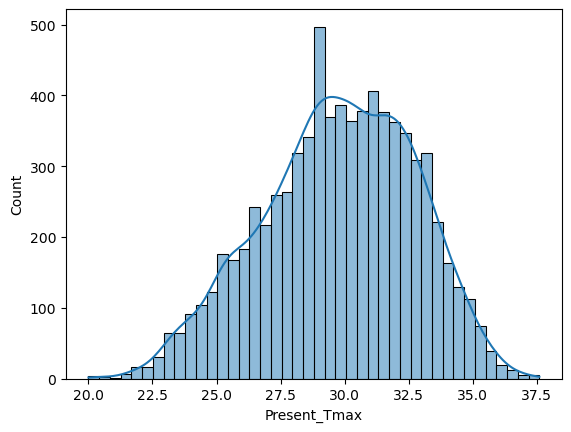

In [39]:
sns.histplot(df['Present_Tmax'],kde=True)

- Present_Tmax: The present-day air temperature ranges from 20°C to 37.5°C.

<Axes: xlabel='Present_Tmin', ylabel='Count'>

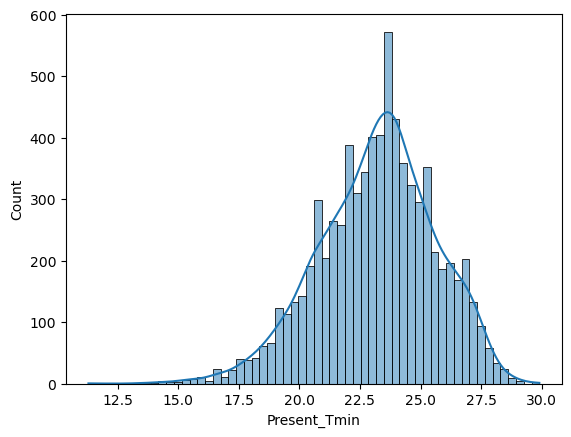

In [40]:
sns.histplot(df['Present_Tmin'],kde=True)

- Present_Tmin: The present-day minimum temperature falls within the range of 12.5°C to 30.0°C.

<Axes: xlabel='LDAPS_RHmin', ylabel='Count'>

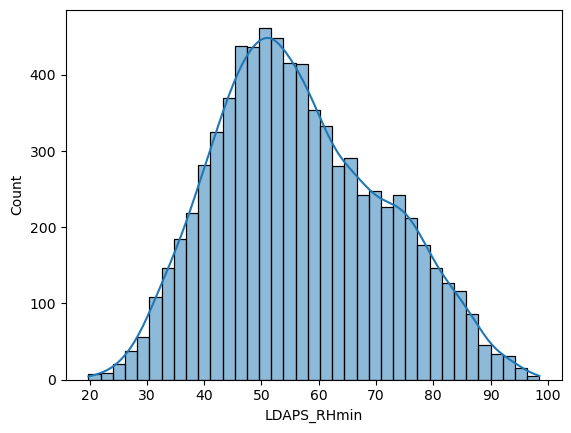

In [41]:
sns.histplot(df['LDAPS_RHmin'],kde=True)

- LDAPS_RHmin: The next-day minimum relative humidity ranges from 20% to 100% within the dataset.



<Axes: xlabel='LDAPS_RHmax', ylabel='Count'>

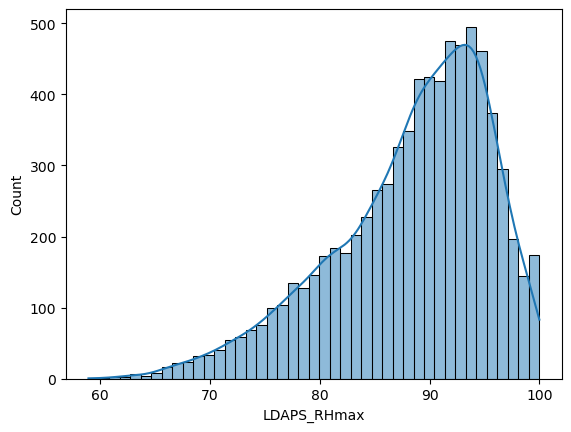

In [42]:
sns.histplot(df['LDAPS_RHmax'],kde=True)

- LDAPS_RHmax: The next-day maximum relative humidity is between 60% and 100% in the dataset.

<Axes: xlabel='LDAPS_Tmax_lapse', ylabel='Count'>

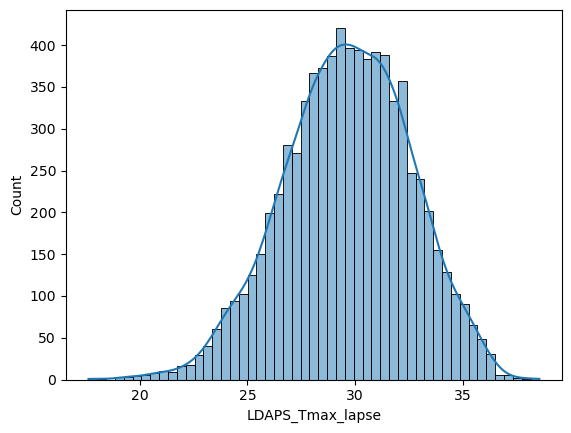

In [43]:
sns.histplot(df['LDAPS_Tmax_lapse'],kde=True)

- LDAPS_Tmax_lapse: The next-day maximum air temperature applied lapse rate falls within the range of 17°C to 38°C.

<Axes: xlabel='LDAPS_WS', ylabel='Count'>

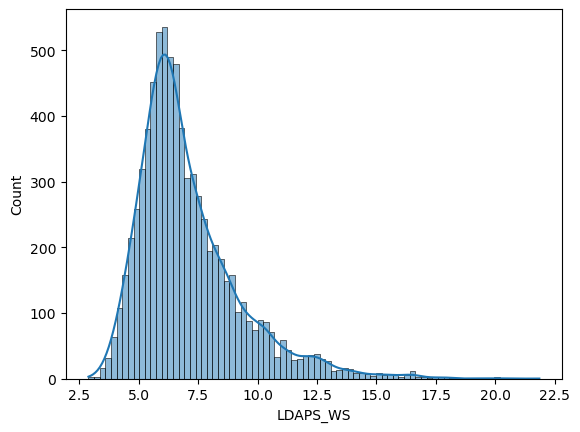

In [44]:
sns.histplot(df['LDAPS_WS'],kde=True)

- LDAPS_WS: The next-day average wind speed ranges from 2m/sec to 22m/sec.

<Axes: xlabel='LDAPS_LH', ylabel='Count'>

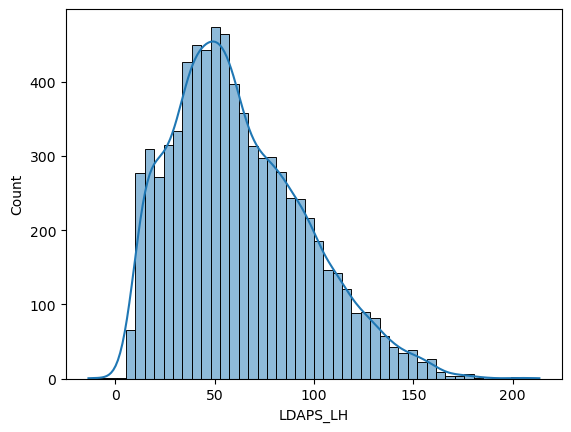

In [45]:
sns.histplot(df['LDAPS_LH'],kde=True)

- LDAPS_LH: The next-day average latent heat flux varies from -13 W/m2 to 213 W/m2.

<Axes: xlabel='LDAPS_CC1', ylabel='Count'>

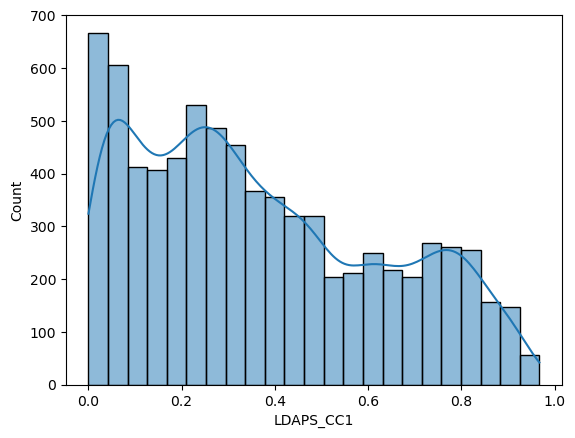

In [46]:
sns.histplot(df['LDAPS_CC1'],kde=True)

- LDAPS_CC1: Next-day 1st 6-hour split average cloud cover ranges from 0% to 1%.

<Axes: xlabel='LDAPS_CC2', ylabel='Count'>

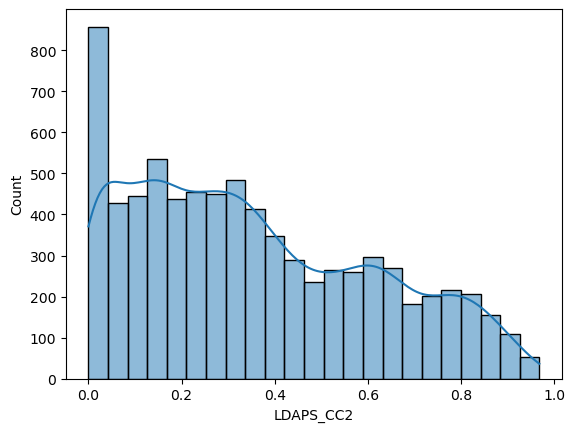

In [47]:
sns.histplot(df['LDAPS_CC2'],kde=True)

- LDAPS_CC2: Next-day 2nd 6-hour split average cloud cover is between 0% and 1%

<Axes: xlabel='LDAPS_CC3', ylabel='Count'>

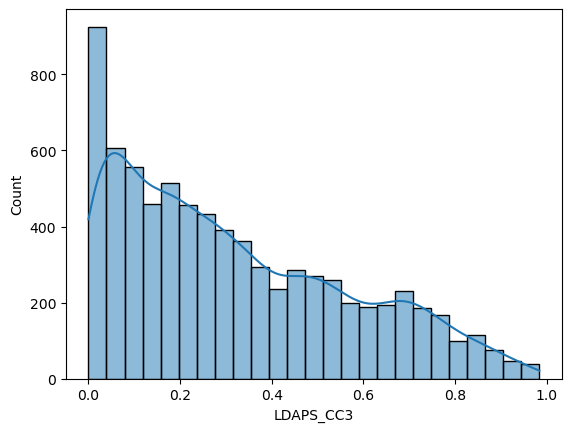

In [48]:
sns.histplot(df['LDAPS_CC3'],kde=True)

- LDAPS_CC3: Forecast of next-day 3rd 6-hour split average cloud cover ranges from 0% to 1%.

<Axes: xlabel='LDAPS_CC4', ylabel='Count'>

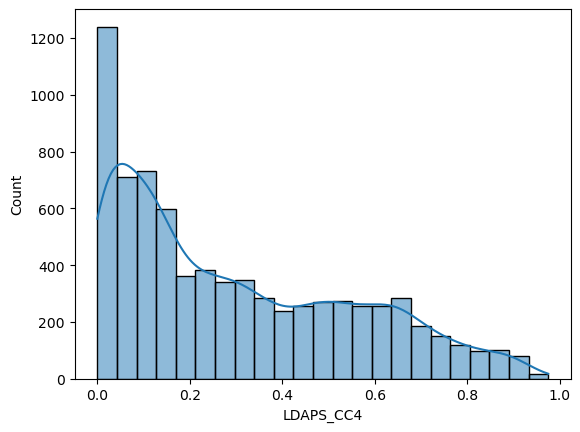

In [49]:
sns.histplot(df['LDAPS_CC4'],kde=True)

- LDAPS_CC4: Forecast of next-day 4th 6-hour split average cloud cover varies from 0% to 1%.

<Axes: xlabel='lat', ylabel='Count'>

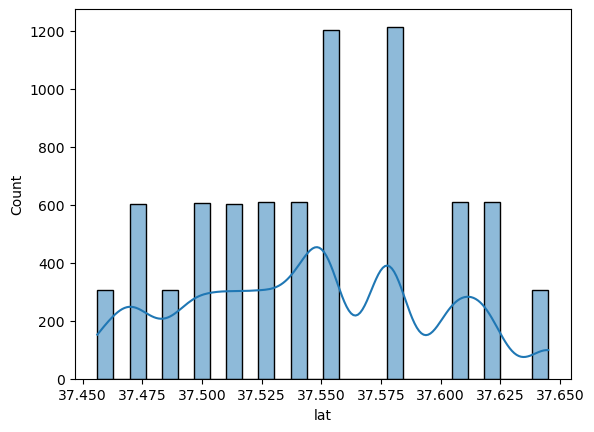

In [50]:
sns.histplot(df['lat'],kde=True)

- lat: Latitude spans from 37.450 to 37.645 degrees.

<Axes: xlabel='lon', ylabel='Count'>

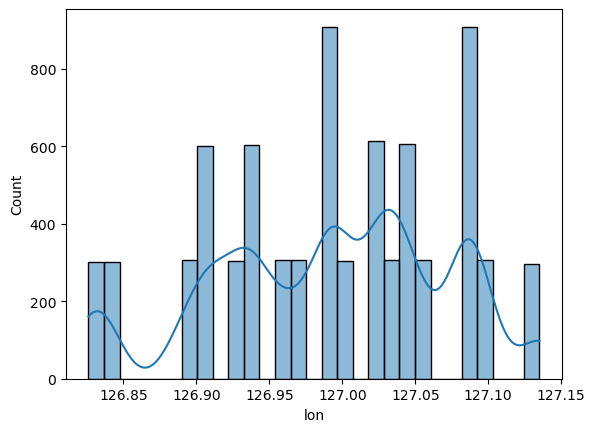

In [51]:
sns.histplot(df['lon'],kde=True)

- lon: Longitude ranges from 126.826 to 127.135 degrees.

<Axes: xlabel='DEM', ylabel='Count'>

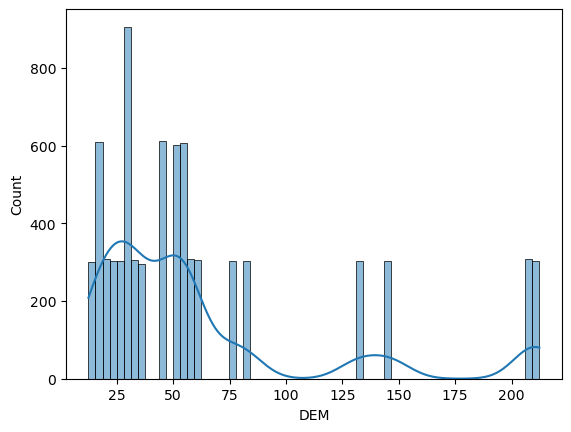

In [52]:
sns.histplot(df['DEM'],kde=True)

- DEM: Elevation varies from 12.4m to 212.3m.

<Axes: xlabel='Slope', ylabel='Count'>

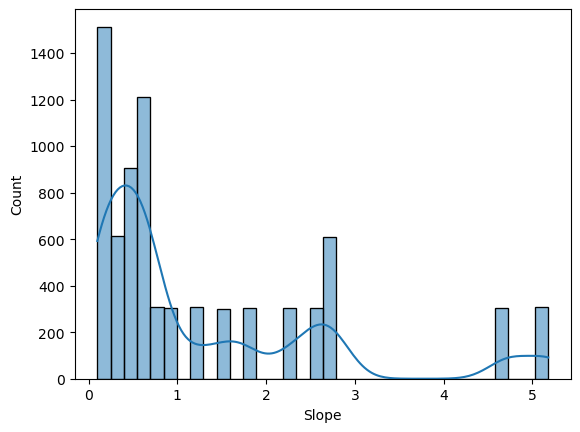

In [53]:
sns.histplot(df['Slope'],kde=True)

- Slope: Slope ranges from 0.1 to 5.2 degrees.

<Axes: xlabel='Solar radiation', ylabel='Count'>

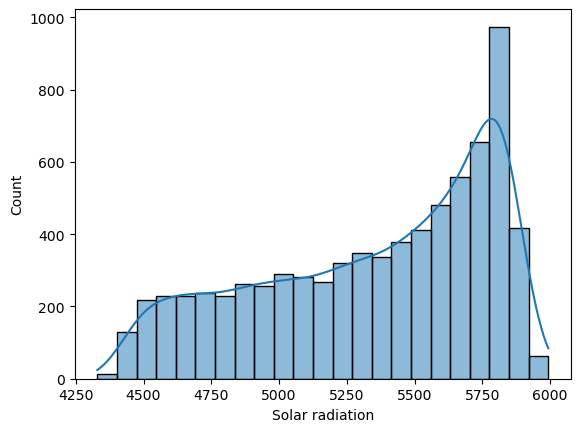

In [54]:
sns.histplot(df['Solar radiation'],kde=True)

- Solar radiation: Daily incoming solar radiation varies from 4329.5 to 5992.9 wh/m2.

<Axes: xlabel='Next_Tmax', ylabel='Count'>

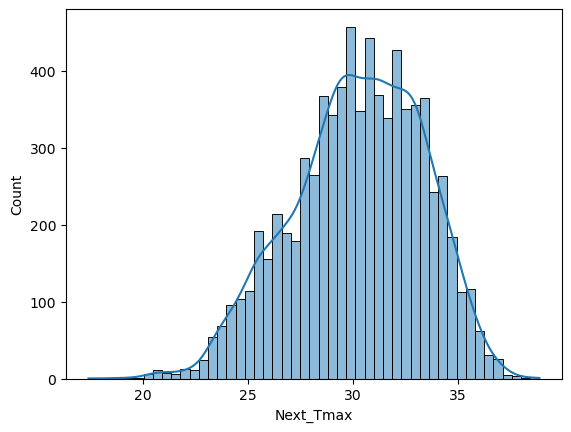

In [55]:
sns.histplot(df['Next_Tmax'],kde=True)

- Next_Tmax: The next-day maximum air temperature ranges from 17°C to 38°C.

<Axes: xlabel='Next_Tmin', ylabel='Count'>

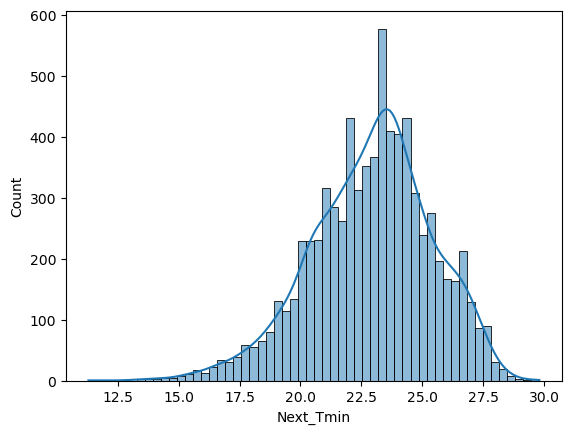

In [56]:
sns.histplot(df['Next_Tmin'],kde=True)

- Next_Tmin: The next-day minimum air temperature ranges from 12°C to 30°C.

# 2.Bivariate analysis-

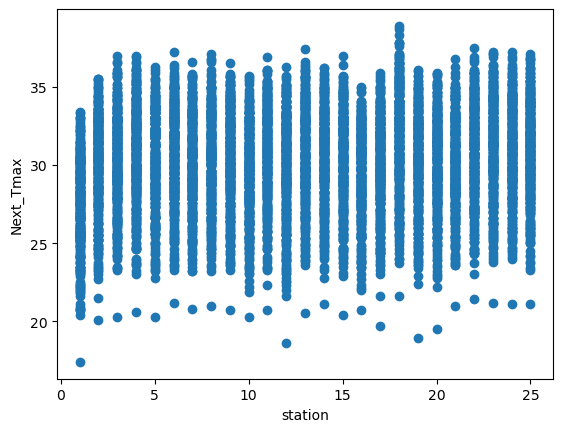

In [102]:
plt.scatter(x='station',y='Next_Tmax',data=df)
plt.xlabel('station')
plt.ylabel('Next_Tmax')
plt.show()

- Station: Positive correlation with Next_Tmax.

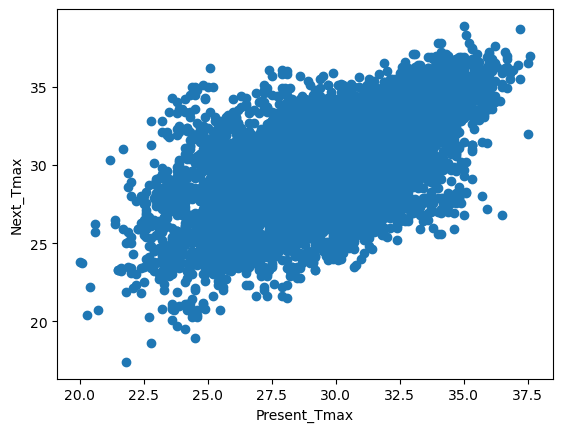

In [103]:
plt.scatter(x='Present_Tmax',y='Next_Tmax',data=df)
plt.xlabel('Present_Tmax')
plt.ylabel('Next_Tmax')
plt.show()

- Present_Tmax: Strong positive correlation with Next_Tmax.

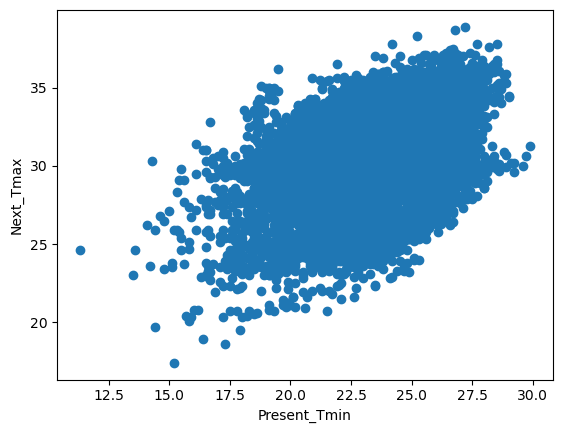

In [104]:
plt.scatter(x='Present_Tmin',y='Next_Tmax',data=df)
plt.xlabel('Present_Tmin')
plt.ylabel('Next_Tmax')
plt.show()

- Present_Tmin: Strong positive correlation with Next_Tmax.

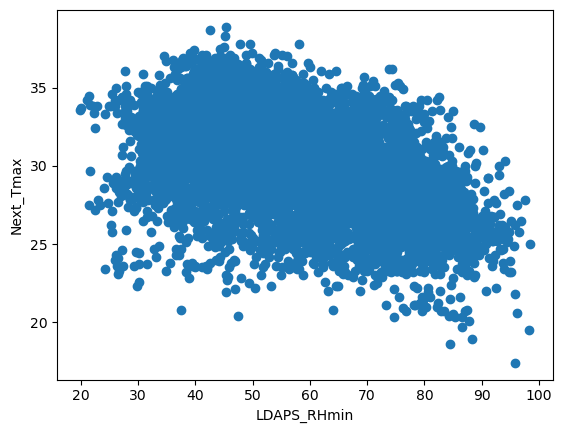

In [105]:
plt.scatter(x='LDAPS_RHmin',y='Next_Tmax',data=df)
plt.xlabel('LDAPS_RHmin')
plt.ylabel('Next_Tmax')
plt.show()

- LDAPS_RHmin: Negative correlation with Next_Tmax.

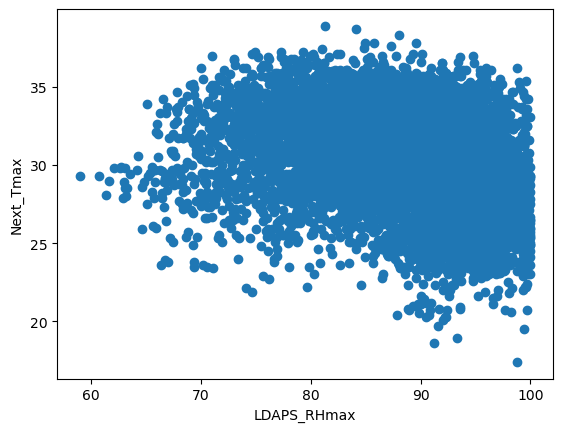

In [106]:
plt.scatter(x='LDAPS_RHmax',y='Next_Tmax',data=df)
plt.xlabel('LDAPS_RHmax')
plt.ylabel('Next_Tmax')
plt.show()

- LDAPS_Tmax_lapse: Strong positive correlation with Next_Tmax.

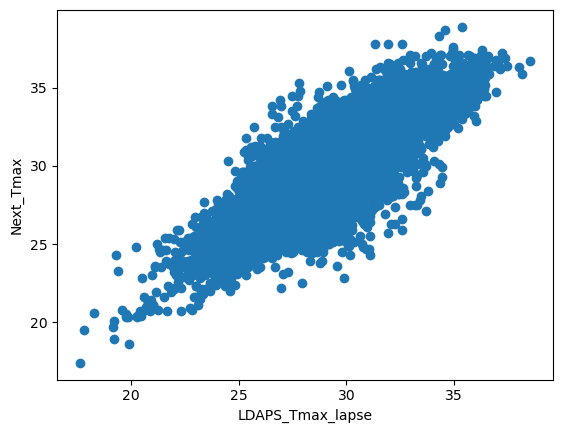

In [107]:
plt.scatter(x='LDAPS_Tmax_lapse',y='Next_Tmax',data=df)
plt.xlabel('LDAPS_Tmax_lapse')
plt.ylabel('Next_Tmax')
plt.show()

- LDAPS_Tmax_lapse: Strong positive correlation with Next_Tmax.

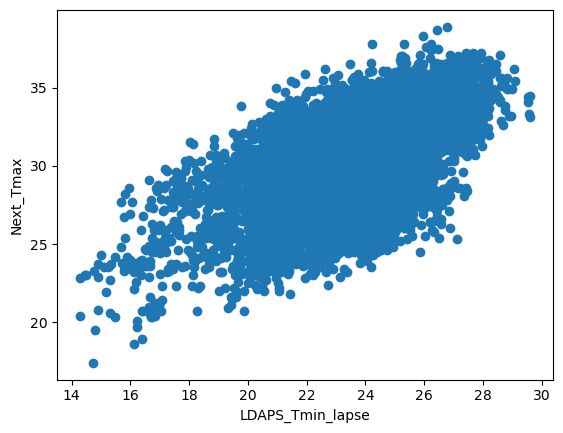

In [108]:
plt.scatter(x='LDAPS_Tmin_lapse',y='Next_Tmax',data=df)
plt.xlabel('LDAPS_Tmin_lapse')
plt.ylabel('Next_Tmax')
plt.show()

- LDAPS_Tmin_lapse: Strong positive correlation with Next_Tmax.

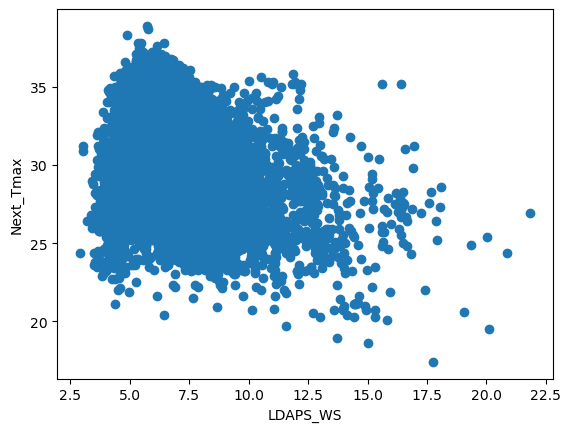

In [109]:
plt.scatter(x='LDAPS_WS',y='Next_Tmax',data=df)
plt.xlabel('LDAPS_WS')
plt.ylabel('Next_Tmax')
plt.show()

- LDAPS_WS: Negative correlation with Next_Tmax.

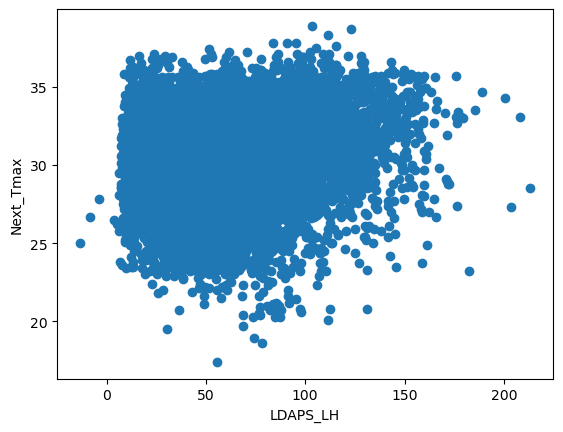

In [110]:
plt.scatter(x='LDAPS_LH',y='Next_Tmax',data=df)
plt.xlabel('LDAPS_LH')
plt.ylabel('Next_Tmax')
plt.show()

- LDAPS_LH: Positive correlation with Next_Tmax.

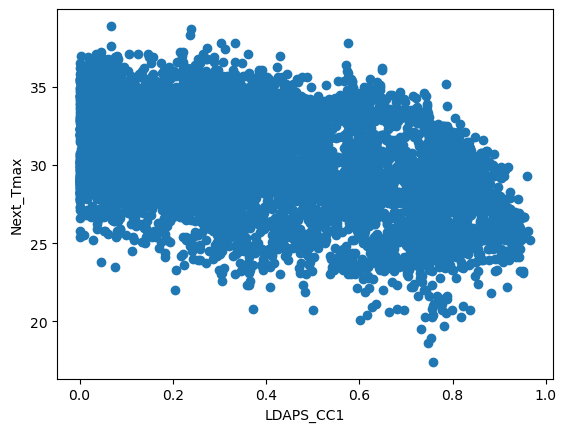

In [111]:
plt.scatter(x='LDAPS_CC1',y='Next_Tmax',data=df)
plt.xlabel('LDAPS_CC1')
plt.ylabel('Next_Tmax')
plt.show()

- LDAPS_CC1: Negative correlation with Next_Tmax.

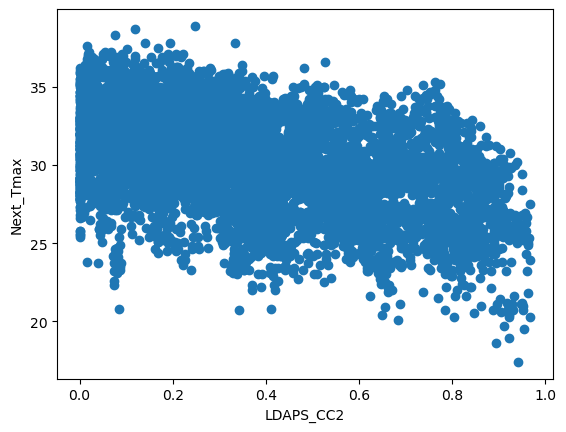

In [112]:
plt.scatter(x='LDAPS_CC2',y='Next_Tmax',data=df)
plt.xlabel('LDAPS_CC2')
plt.ylabel('Next_Tmax')
plt.show()

- LDAPS_CC2: Negative correlation with Next_Tmax.

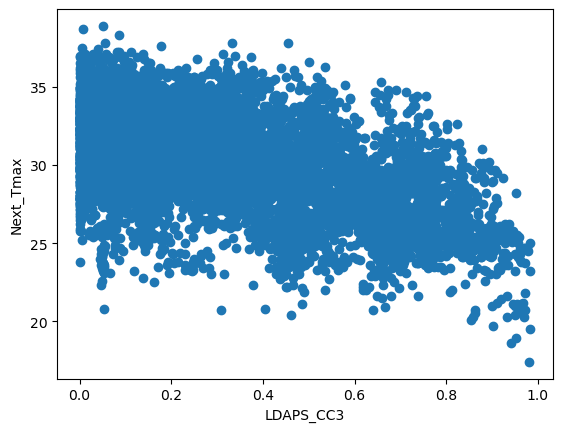

In [113]:
plt.scatter(x='LDAPS_CC3',y='Next_Tmax',data=df)
plt.xlabel('LDAPS_CC3')
plt.ylabel('Next_Tmax')
plt.show()

- LDAPS_CC3: Negative correlation with Next_Tmax.

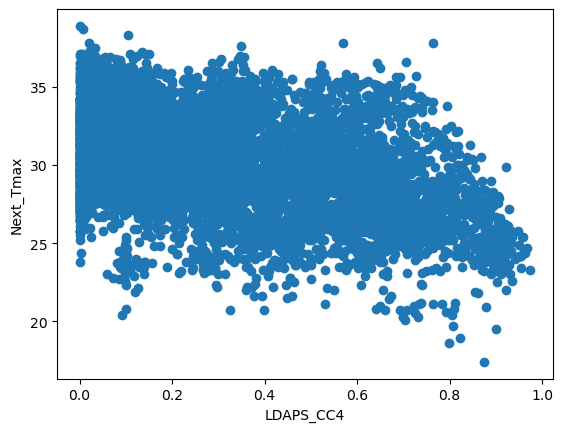

In [114]:
plt.scatter(x='LDAPS_CC4',y='Next_Tmax',data=df)
plt.xlabel('LDAPS_CC4')
plt.ylabel('Next_Tmax')
plt.show()

- LDAPS_CC4: Negative correlation with Next_Tmax.

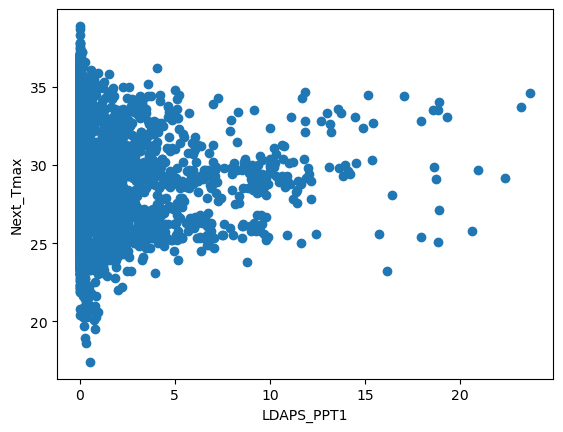

In [115]:
plt.scatter(x='LDAPS_PPT1',y='Next_Tmax',data=df)
plt.xlabel('LDAPS_PPT1')
plt.ylabel('Next_Tmax')
plt.show()

- LDAPS_PPT1: Negative correlation with Next_Tmax.

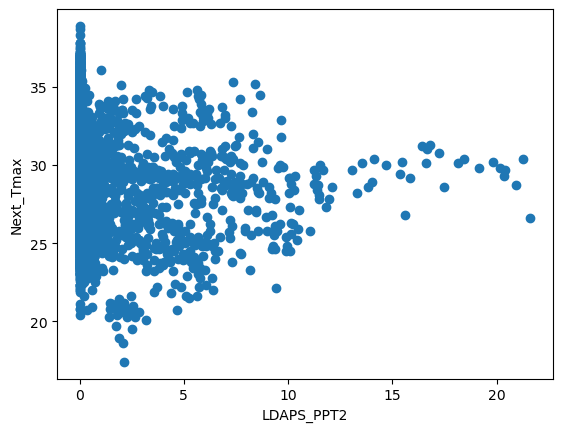

In [116]:
plt.scatter(x='LDAPS_PPT2',y='Next_Tmax',data=df)
plt.xlabel('LDAPS_PPT2')
plt.ylabel('Next_Tmax')
plt.show()

- LDAPS_PPT2: Negative correlation with Next_Tmax.

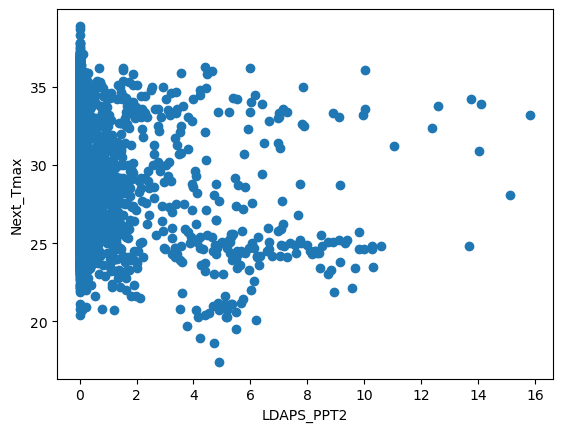

In [117]:
plt.scatter(x='LDAPS_PPT3',y='Next_Tmax',data=df)
plt.xlabel('LDAPS_PPT2')
plt.ylabel('Next_Tmax')
plt.show()

- LDAPS_PPT3: Negative correlation with Next_Tmax.

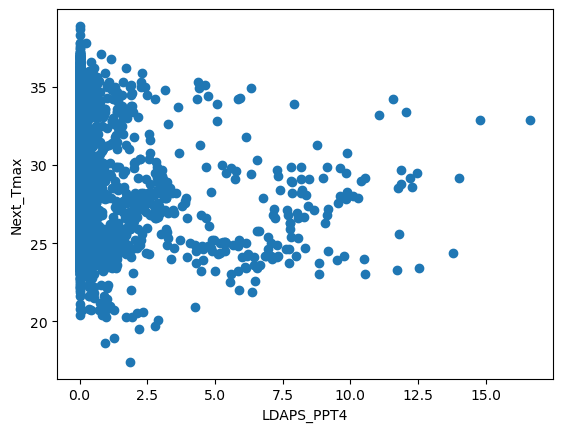

In [118]:
plt.scatter(x='LDAPS_PPT4',y='Next_Tmax',data=df)
plt.xlabel('LDAPS_PPT4')
plt.ylabel('Next_Tmax')
plt.show()

- LDAPS_PPT4: Negative correlation with Next_Tmax.

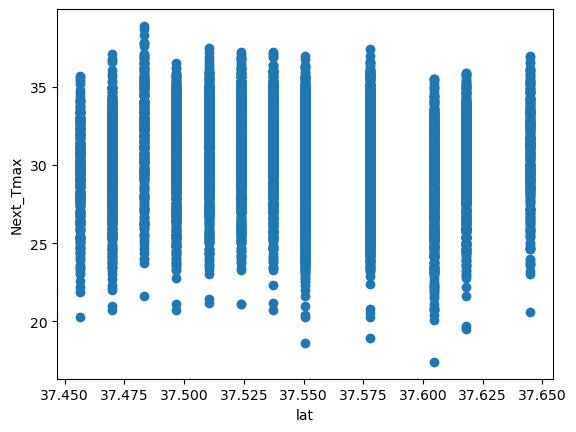

In [119]:
plt.scatter(x='lat',y='Next_Tmax',data=df)
plt.xlabel('lat')
plt.ylabel('Next_Tmax')
plt.show()

- Lat: Very weak negative correlation with Next_Tmax.

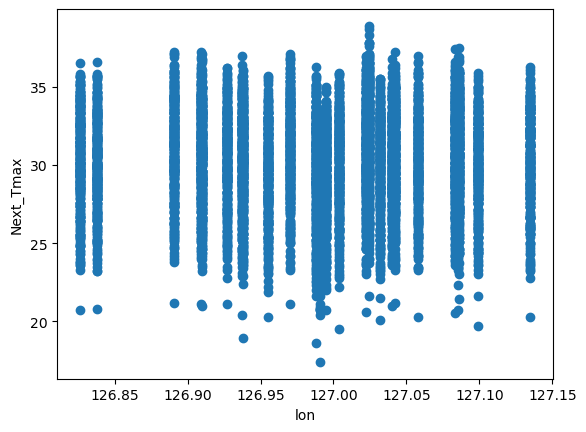

In [120]:
plt.scatter(x='lon',y='Next_Tmax',data=df)
plt.xlabel('lon')
plt.ylabel('Next_Tmax')
plt.show()

- Lon: Very weak correlation with Next_Tmax.

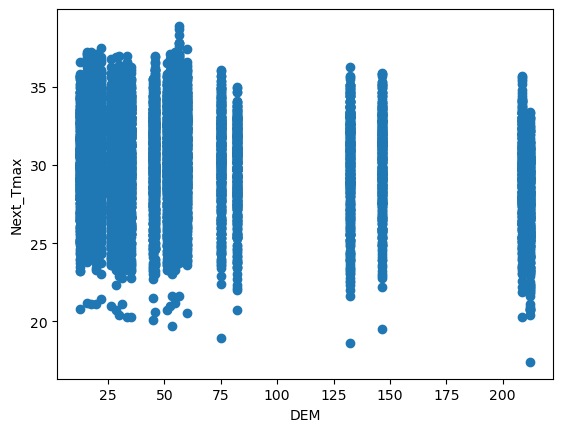

In [121]:
plt.scatter(x='DEM',y='Next_Tmax',data=df)
plt.xlabel('DEM')
plt.ylabel('Next_Tmax')
plt.show()

- DEM: Negative correlation with Next_Tmax.

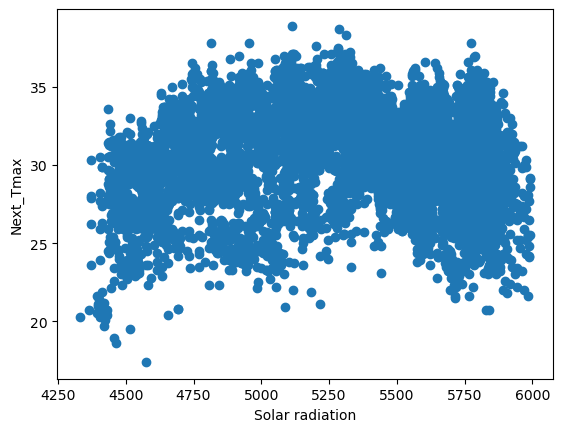

In [122]:
plt.scatter(x='Solar radiation',y='Next_Tmax',data=df)
plt.xlabel('Solar radiation')
plt.ylabel('Next_Tmax')
plt.show()

- Slope: Negative correlation with Next_Tmax.

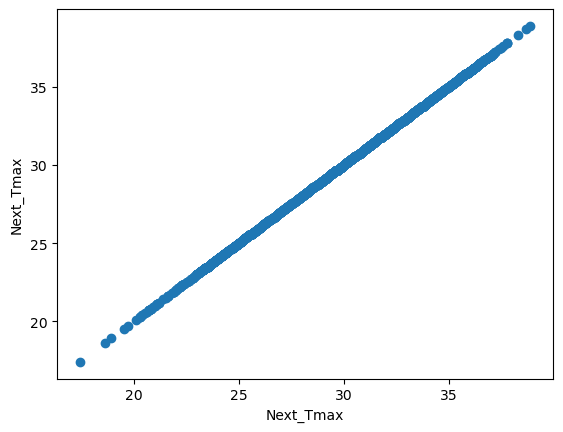

In [123]:
plt.scatter(x='Next_Tmax',y='Next_Tmax',data=df)
plt.xlabel('Next_Tmax')
plt.ylabel('Next_Tmax')
plt.show()

- Solar radiation: Very weak correlation with Next_Tmax.

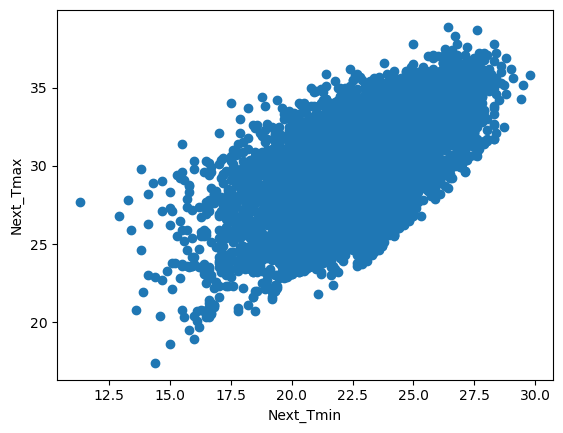

In [124]:
plt.scatter(x='Next_Tmin',y='Next_Tmax',data=df)
plt.xlabel('Next_Tmin')
plt.ylabel('Next_Tmax')
plt.show()

- Next_Tmin: Strong positive correlation with Next_Tmax.

In [34]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [35]:
df.corr()['Next_Tmax']

station             0.107747
Present_Tmax        0.610357
Present_Tmin        0.463523
LDAPS_RHmin        -0.446824
LDAPS_RHmax        -0.289788
LDAPS_Tmax_lapse    0.835729
LDAPS_Tmin_lapse    0.592119
LDAPS_WS           -0.351107
LDAPS_LH            0.156779
LDAPS_CC1          -0.459705
LDAPS_CC2          -0.498295
LDAPS_CC3          -0.523061
LDAPS_CC4          -0.454039
LDAPS_PPT1         -0.125954
LDAPS_PPT2         -0.186722
LDAPS_PPT3         -0.203554
LDAPS_PPT4         -0.190720
lat                -0.055367
lon                 0.003502
DEM                -0.174578
Slope              -0.104279
Solar radiation     0.016145
Next_Tmax           1.000000
Next_Tmin           0.616629
Name: Next_Tmax, dtype: float64

In [36]:
df.corr().abs()['Next_Tmax'].sort_values(ascending=True)

lon                 0.003502
Solar radiation     0.016145
lat                 0.055367
Slope               0.104279
station             0.107747
LDAPS_PPT1          0.125954
LDAPS_LH            0.156779
DEM                 0.174578
LDAPS_PPT2          0.186722
LDAPS_PPT4          0.190720
LDAPS_PPT3          0.203554
LDAPS_RHmax         0.289788
LDAPS_WS            0.351107
LDAPS_RHmin         0.446824
LDAPS_CC4           0.454039
LDAPS_CC1           0.459705
Present_Tmin        0.463523
LDAPS_CC2           0.498295
LDAPS_CC3           0.523061
LDAPS_Tmin_lapse    0.592119
Present_Tmax        0.610357
Next_Tmin           0.616629
LDAPS_Tmax_lapse    0.835729
Next_Tmax           1.000000
Name: Next_Tmax, dtype: float64

<Axes: >

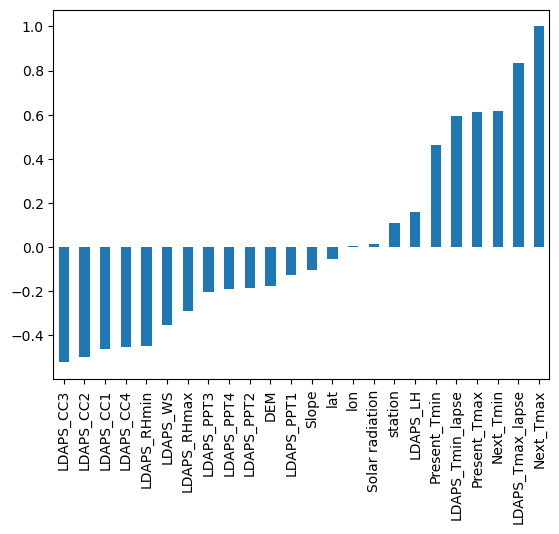

In [37]:
df.corr()['Next_Tmax'].sort_values().drop(columns=['Next_Tmax']).plot(kind='bar')

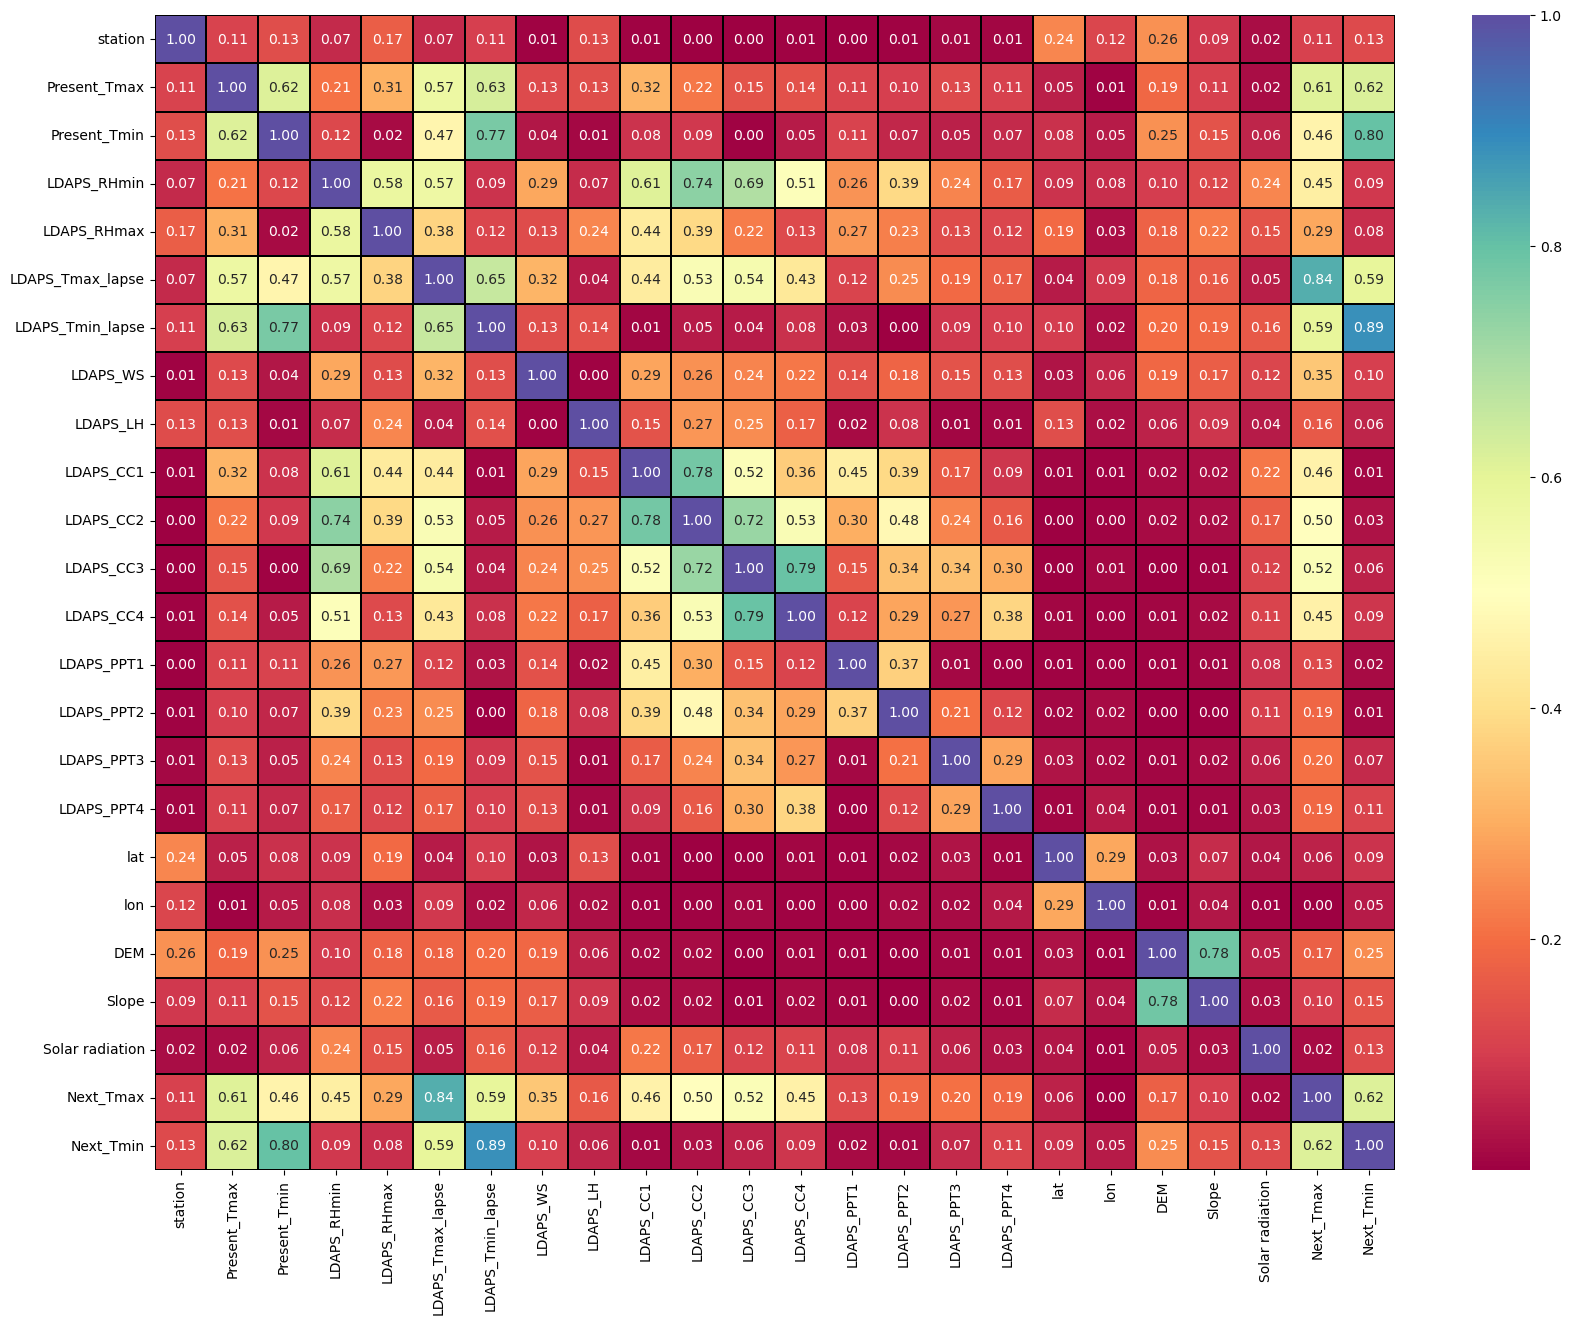

In [130]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr().abs(),annot=True,fmt='.2f',linecolor='black',linewidth=0.2,cmap='Spectral')
plt.show()

# Observations-
- Present_Tmin & Next_Tmin: 80% correlation suggests multicollinearity between these features.
- LDAPS_RHmin & LDAPS_CC2: 74% correlation indicates multicollinearity between these features.
- Present_Tmin & LDAPS_Tmin_lapse: 77% correlation implies multicollinearity between these features.
- LDAPS_Tmax_lapse & Next_Tmax: 84% correlation signifies a strong relationship between this feature and the target variable.
- LDAPS_CC1 & LDAPS_CC2: 78% correlation suggests multicollinearity between these features.
- LDAPS_CC4 & LDAPS_CC3: 79% correlation indicates multicollinearity between these features.
- LDAPS_Tmin_lapse & Next_Tmin: 89% correlation implies multicollinearity between these features.
- DEM & Slope: 78% correlation suggests multicollinearity between these features.

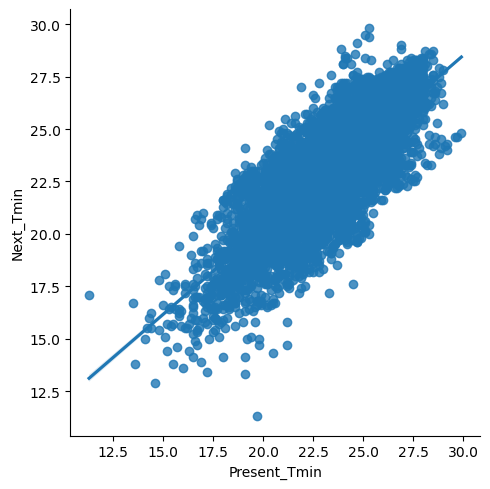

In [164]:
sns.lmplot(x='Present_Tmin',y='Next_Tmin',data=df)
plt.show()

Here, we observe a strong positive correlation between Next_Tmin and Present_Tmin.

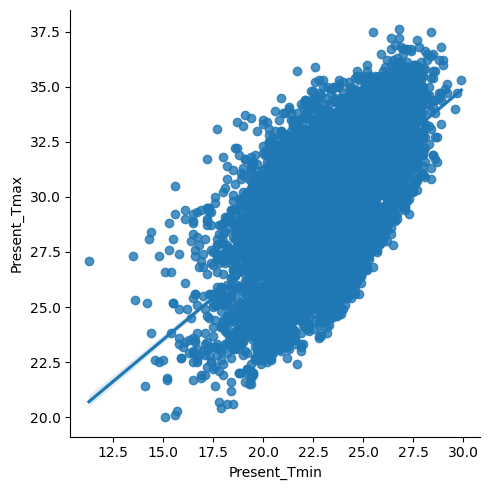

In [165]:
sns.lmplot(x='Present_Tmin',y='Present_Tmax',data=df)
plt.show()

Here, a positive correlation between Present_Tmax and Present_Tmin is evident.

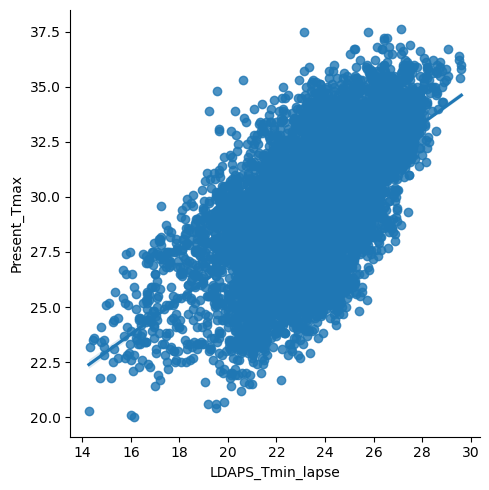

In [166]:
sns.lmplot(x='LDAPS_Tmin_lapse',y='Present_Tmax',data=df)
plt.show()

Here, a positive correlation between LDAPS_Tmin_lapse and present_Tmax is observed.

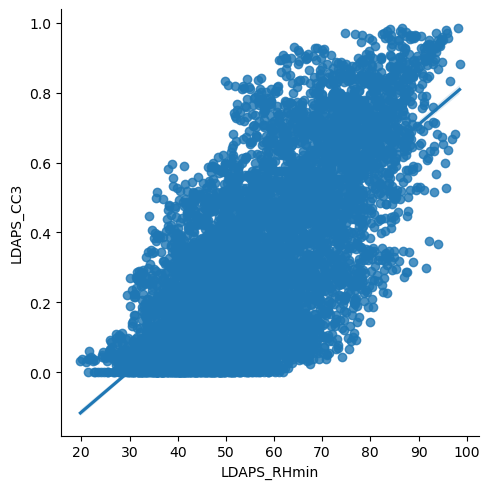

In [167]:
sns.lmplot(x='LDAPS_RHmin',y='LDAPS_CC3',data=df)
plt.show()

Here, a positive correlation between LDAPS_RHmin and LDAPS_CC3 is evident.

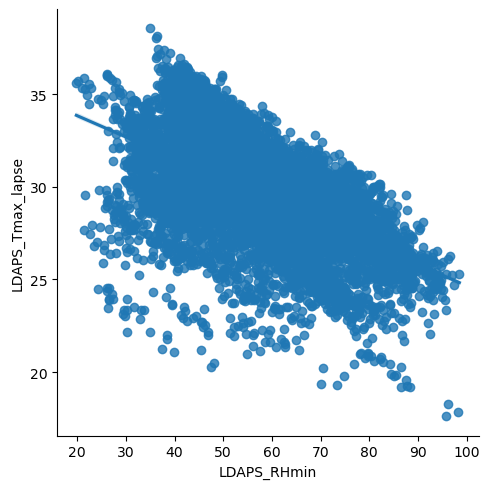

In [168]:
sns.lmplot(x='LDAPS_RHmin',y='LDAPS_Tmax_lapse',data=df)
plt.show()

Here, a negative correlation between LDAPS_RHmin and LDAPS_Tmax_lapse is observed.

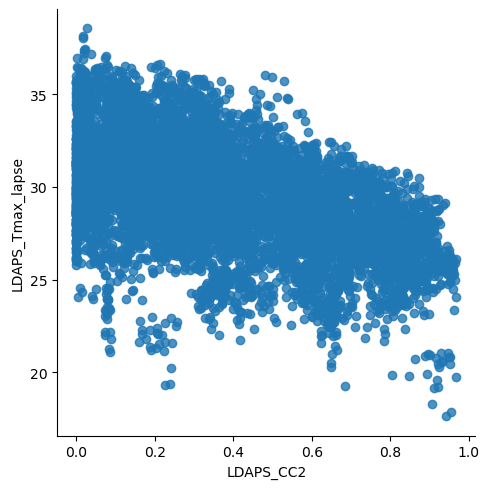

In [169]:
sns.lmplot(x='LDAPS_CC2',y='LDAPS_Tmax_lapse',data=df)
plt.show()

Here, a negative correlation between LDAPS_CC2 and LDAPS_Tmax_lapse is evident.

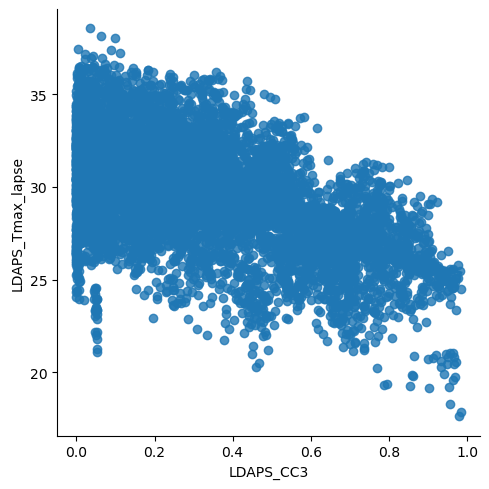

In [170]:
sns.lmplot(x='LDAPS_CC3',y='LDAPS_Tmax_lapse',data=df)
plt.show()

Here, a negative correlation between LDAPS_CC3 and LDAPS_Tmax_lapse is observed.

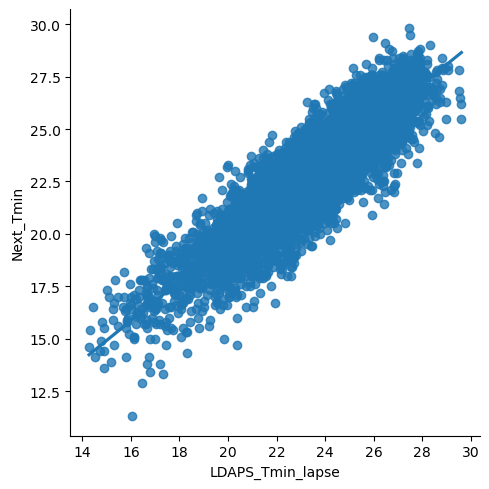

In [171]:
sns.lmplot(x='LDAPS_Tmin_lapse',y='Next_Tmin',data=df)
plt.show()

Here, a strong positive correlation between LDAPS_Tmin_lapse and Next_Tmin is evident.

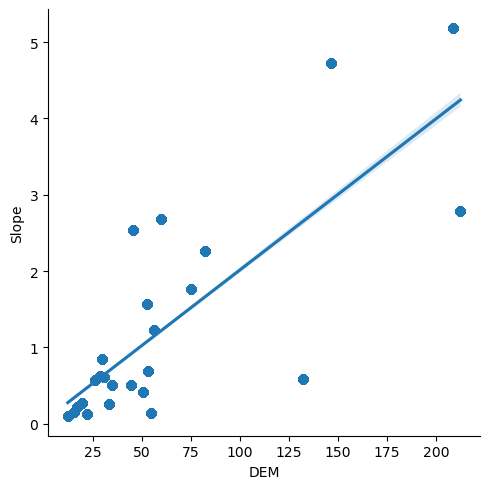

In [161]:
sns.lmplot(x='DEM',y='Slope',data=df)
plt.show()

Here, a positive correlation between DEM and Slope is observed.

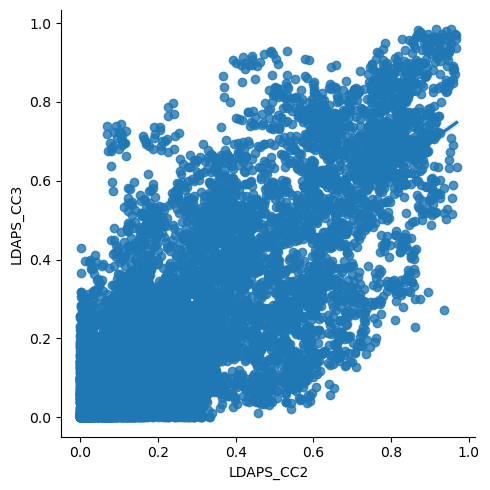

In [162]:
sns.lmplot(x='LDAPS_CC2',y='LDAPS_CC3',data=df)
plt.show()

A positive correlation is evident between LDAPS_CC2 and LDAPS_CC3.

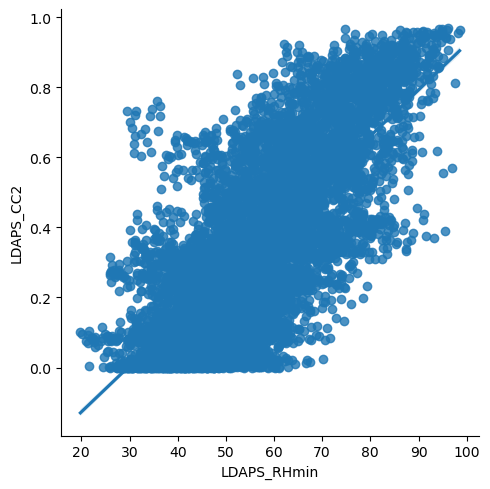

In [163]:
sns.lmplot(x='LDAPS_RHmin',y='LDAPS_CC2',data=df)
plt.show()

A positive correlation is evident between LDAPS_CC2 and LDAPS_RHmin.

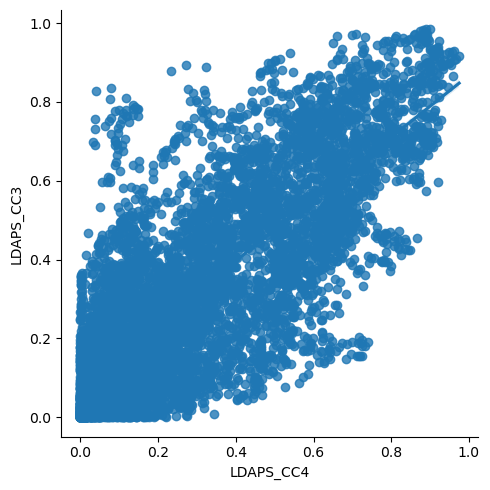

In [160]:
sns.lmplot(x='LDAPS_CC4',y='LDAPS_CC3',data=df)
plt.show()

A positive correlation is observed between LDAPS_CC3 and LDAPS_CC4.

In [38]:
df10

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Date                                                                        
2013-06-30      1.0          28.7          21.4    58.255688    91.116364   
2013-06-30      2.0          31.9          21.6    52.263397    90.604721   
2013-06-30      3.0          31.6          23.3    48.690479    83.973587   
2013-06-30      4.0          32.0          23.4    58.239788    96.483688   
2013-06-30      5.0          31.4          21.9    56.174095    90.155128   
...             ...           ...           ...          ...          ...   
2017-08-30     21.0          23.1          17.8    24.688997    78.261383   
2017-08-30     22.0          22.5          17.4    30.094858    83.690018   
2017-08-30     23.0          23.3          17.1    26.741310    78.869858   
2017-08-30     24.0          23.3          17.7    24.040634    77.294975   
2017-08-30     25.0          23.2          17.4    22.933014    77.243744   

            LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
Date                                                                   
2013-06-30         28.074101         23.006936  6.818887   69.451805   
2013-06-30         29.850689         24.035009  5.691890   51.937448   
2013-06-30         30.091292         24.565633  6.138224   20.573050   
2013-06-30         29.704629         23.326177  5.650050   65.727144   
2013-06-30         29.113934         23.486480  5.735004  107.965535   
...                      ...               ...       ...         ...   
2017-08-30         27.812697         18.303014  6.603253    9.614074   
2017-08-30         26.704905         17.814038  5.768083   82.146707   
2017-08-30         26.352081         18.775678  6.148918   72.058294   
2017-08-30         27.010193         18.733519  6.542819   47.241457   
2017-08-30         27.939516         18.522965  7.289264    9.090034   

            LDAPS_CC1  ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat  \
Date                   ...                                                
2013-06-30   0.233947  ...         0.0         0.0         0.0  37.6046   
2013-06-30   0.225508  ...         0.0         0.0         0.0  37.6046   
2013-06-30   0.209344  ...         0.0         0.0         0.0  37.5776   
2013-06-30   0.216372  ...         0.0         0.0         0.0  37.6450   
2013-06-30   0.151407  ...         0.0         0.0         0.0  37.5507   
...               ...  ...         ...         ...         ...      ...   
2017-08-30   0.052902  ...         0.0         0.0         0.0  37.5507   
2017-08-30   0.066461  ...         0.0         0.0         0.0  37.5102   
2017-08-30   0.030034  ...         0.0         0.0         0.0  37.5372   
2017-08-30   0.035874  ...         0.0         0.0         0.0  37.5237   
2017-08-30   0.048954  ...         0.0         0.0         0.0  37.5237   

                lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  
Date                                                                          
2013-06-30  126.991  212.3350  2.7850      5992.895996       29.1       21.2  
2013-06-30  127.032   44.7624  0.5141      5869.312500       30.5       22.5  
2013-06-30  127.058   33.3068  0.2661      5863.555664       31.1       23.9  
2013-06-30  127.022   45.7160  2.5348      5856.964844       31.7       24.3  
2013-06-30  127.135   35.0380  0.5055      5859.552246       31.2       22.5  
...             ...       ...     ...              ...        ...        ...  
2017-08-30  127.040   26.2980  0.5721      4456.024414       27.6       17.7  
2017-08-30  127.086   21.9668  0.1332      4441.803711       28.0       17.1  
2017-08-30  126.891   15.5876  0.1554      4443.313965       28.3       18.1  
2017-08-30  126.909   17.2956  0.2223      4438.373535       28.6       18.8  
2017-08-30  126.970   19.5844  0.2713      4451.345215       27.8       17.4  

[7588 rows x 24 columns]

In [39]:
df

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Date                                                                        
2013-06-30      1.0          28.7          21.4    58.255688    91.116364   
2013-06-30      2.0          31.9          21.6    52.263397    90.604721   
2013-06-30      3.0          31.6          23.3    48.690479    83.973587   
2013-06-30      4.0          32.0          23.4    58.239788    96.483688   
2013-06-30      5.0          31.4          21.9    56.174095    90.155128   
...             ...           ...           ...          ...          ...   
2017-08-30     21.0          23.1          17.8    24.688997    78.261383   
2017-08-30     22.0          22.5          17.4    30.094858    83.690018   
2017-08-30     23.0          23.3          17.1    26.741310    78.869858   
2017-08-30     24.0          23.3          17.7    24.040634    77.294975   
2017-08-30     25.0          23.2          17.4    22.933014    77.243744   

            LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
Date                                                                   
2013-06-30         28.074101         23.006936  6.818887   69.451805   
2013-06-30         29.850689         24.035009  5.691890   51.937448   
2013-06-30         30.091292         24.565633  6.138224   20.573050   
2013-06-30         29.704629         23.326177  5.650050   65.727144   
2013-06-30         29.113934         23.486480  5.735004  107.965535   
...                      ...               ...       ...         ...   
2017-08-30         27.812697         18.303014  6.603253    9.614074   
2017-08-30         26.704905         17.814038  5.768083   82.146707   
2017-08-30         26.352081         18.775678  6.148918   72.058294   
2017-08-30         27.010193         18.733519  6.542819   47.241457   
2017-08-30         27.939516         18.522965  7.289264    9.090034   

            LDAPS_CC1  ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat  \
Date                   ...                                                
2013-06-30   0.233947  ...         0.0         0.0         0.0  37.6046   
2013-06-30   0.225508  ...         0.0         0.0         0.0  37.6046   
2013-06-30   0.209344  ...         0.0         0.0         0.0  37.5776   
2013-06-30   0.216372  ...         0.0         0.0         0.0  37.6450   
2013-06-30   0.151407  ...         0.0         0.0         0.0  37.5507   
...               ...  ...         ...         ...         ...      ...   
2017-08-30   0.052902  ...         0.0         0.0         0.0  37.5507   
2017-08-30   0.066461  ...         0.0         0.0         0.0  37.5102   
2017-08-30   0.030034  ...         0.0         0.0         0.0  37.5372   
2017-08-30   0.035874  ...         0.0         0.0         0.0  37.5237   
2017-08-30   0.048954  ...         0.0         0.0         0.0  37.5237   

                lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  
Date                                                                          
2013-06-30  126.991  212.3350  2.7850      5992.895996       29.1       21.2  
2013-06-30  127.032   44.7624  0.5141      5869.312500       30.5       22.5  
2013-06-30  127.058   33.3068  0.2661      5863.555664       31.1       23.9  
2013-06-30  127.022   45.7160  2.5348      5856.964844       31.7       24.3  
2013-06-30  127.135   35.0380  0.5055      5859.552246       31.2       22.5  
...             ...       ...     ...              ...        ...        ...  
2017-08-30  127.040   26.2980  0.5721      4456.024414       27.6       17.7  
2017-08-30  127.086   21.9668  0.1332      4441.803711       28.0       17.1  
2017-08-30  126.891   15.5876  0.1554      4443.313965       28.3       18.1  
2017-08-30  126.909   17.2956  0.2223      4438.373535       28.6       18.8  
2017-08-30  126.970   19.5844  0.2713      4451.345215       27.8       17.4  

[7588 rows x 24 columns]

# 3.Multivariate analysis-

In [276]:
# sns.pairplot(df)

# Distribution plot-

In [40]:
x=df.drop(columns='Next_Tmax',axis=1)
y=df.Next_Tmax

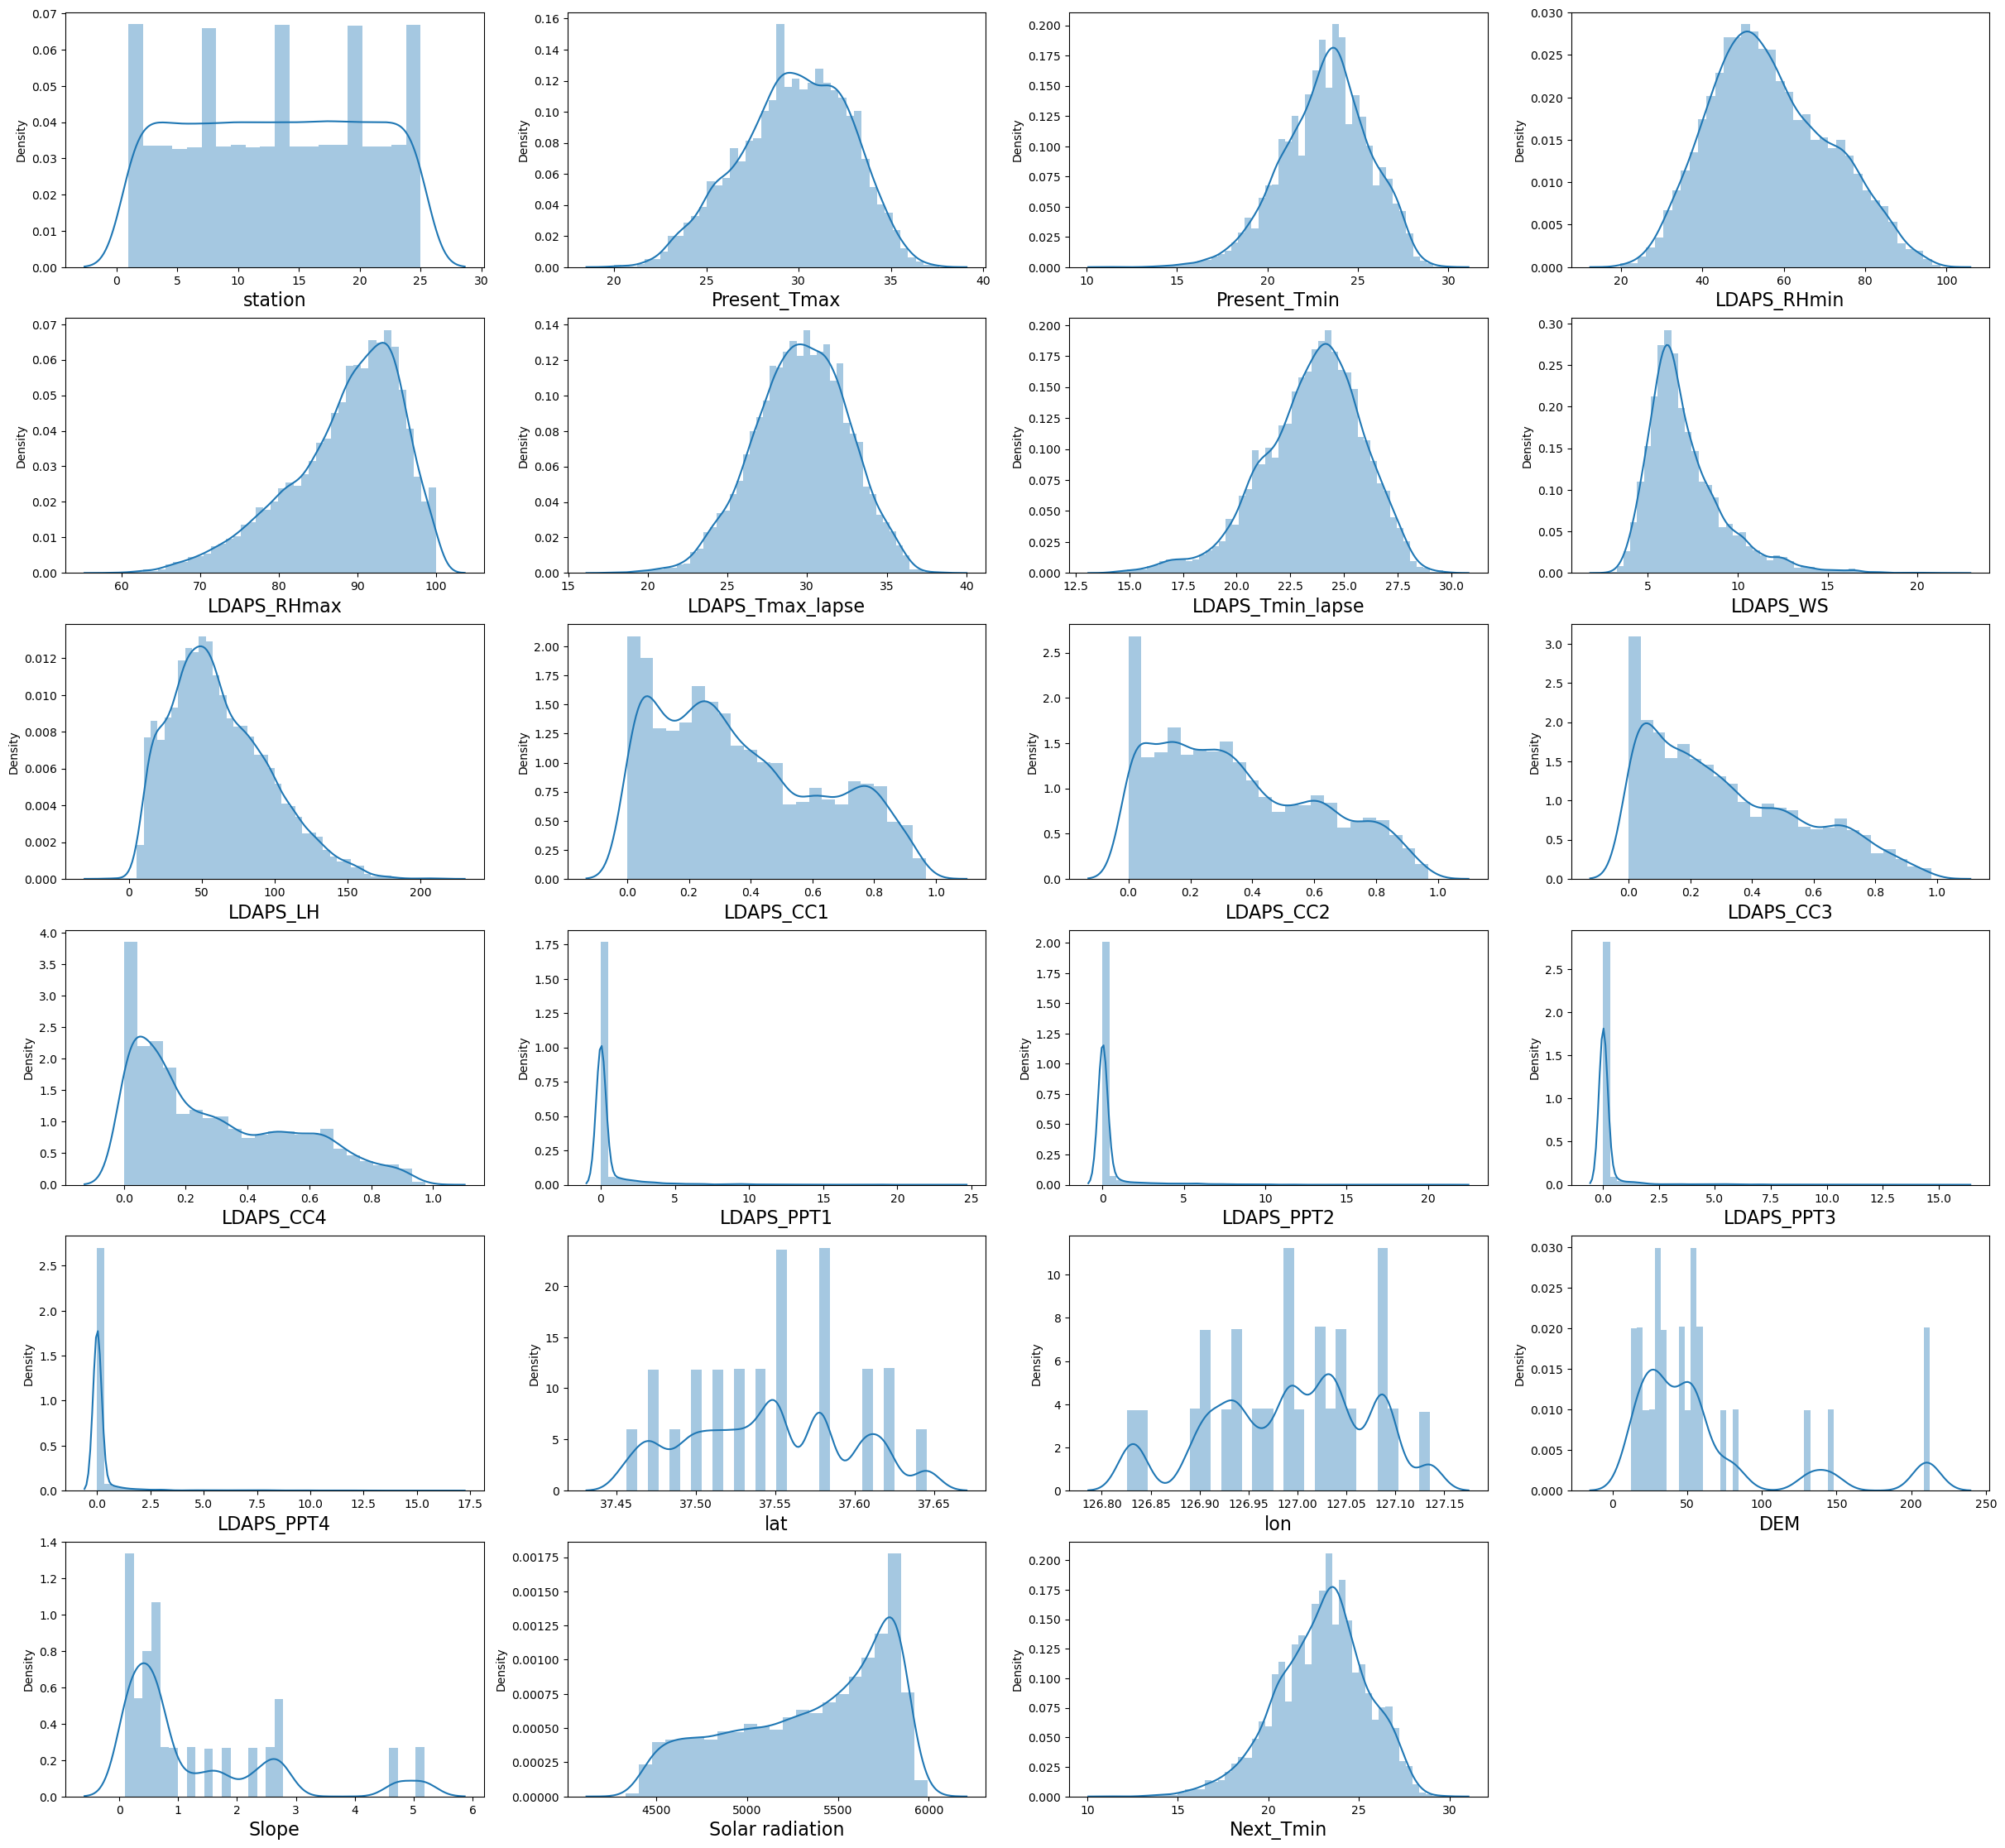

In [37]:
plt.figure(figsize=(30,28))  
plotnumber=1

for col in x.columns:
    if plotnumber<=24:
        ax=plt.subplot(6,4,plotnumber)   
        sns.distplot(df[col])  
        plt.xlabel(col,fontsize=16)
    plotnumber+=1
plt.show() 


In [41]:
df.skew().sort_values()

LDAPS_RHmax        -0.845264
LDAPS_Tmin_lapse   -0.574035
Solar radiation    -0.524325
Next_Tmin          -0.393662
Present_Tmin       -0.353822
Next_Tmax          -0.334842
lon                -0.289048
Present_Tmax       -0.257069
LDAPS_Tmax_lapse   -0.222349
station            -0.004178
lat                 0.085377
LDAPS_RHmin         0.301396
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_LH            0.662971
LDAPS_CC4           0.663815
LDAPS_WS            1.553926
Slope               1.559050
DEM                 1.721617
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
dtype: float64

The plotted data reveals skewness in columns such as LDAPS_RHmax, LDAPS_Tmin_lapse, LDAPS_WS, LDAPS_LH, LDAPS_CC3, LDAPS_CC4, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, DEM, and Slope.

# Approach_SKEW-I:-cube root method to remove skewness

In [42]:
columns_to_transform = ['LDAPS_RHmax', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC3', 
                       'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT3', 'LDAPS_PPT2', 'LDAPS_PPT4', 'DEM', 
                       'Slope']

df[columns_to_transform] = df[columns_to_transform].apply(np.cbrt)


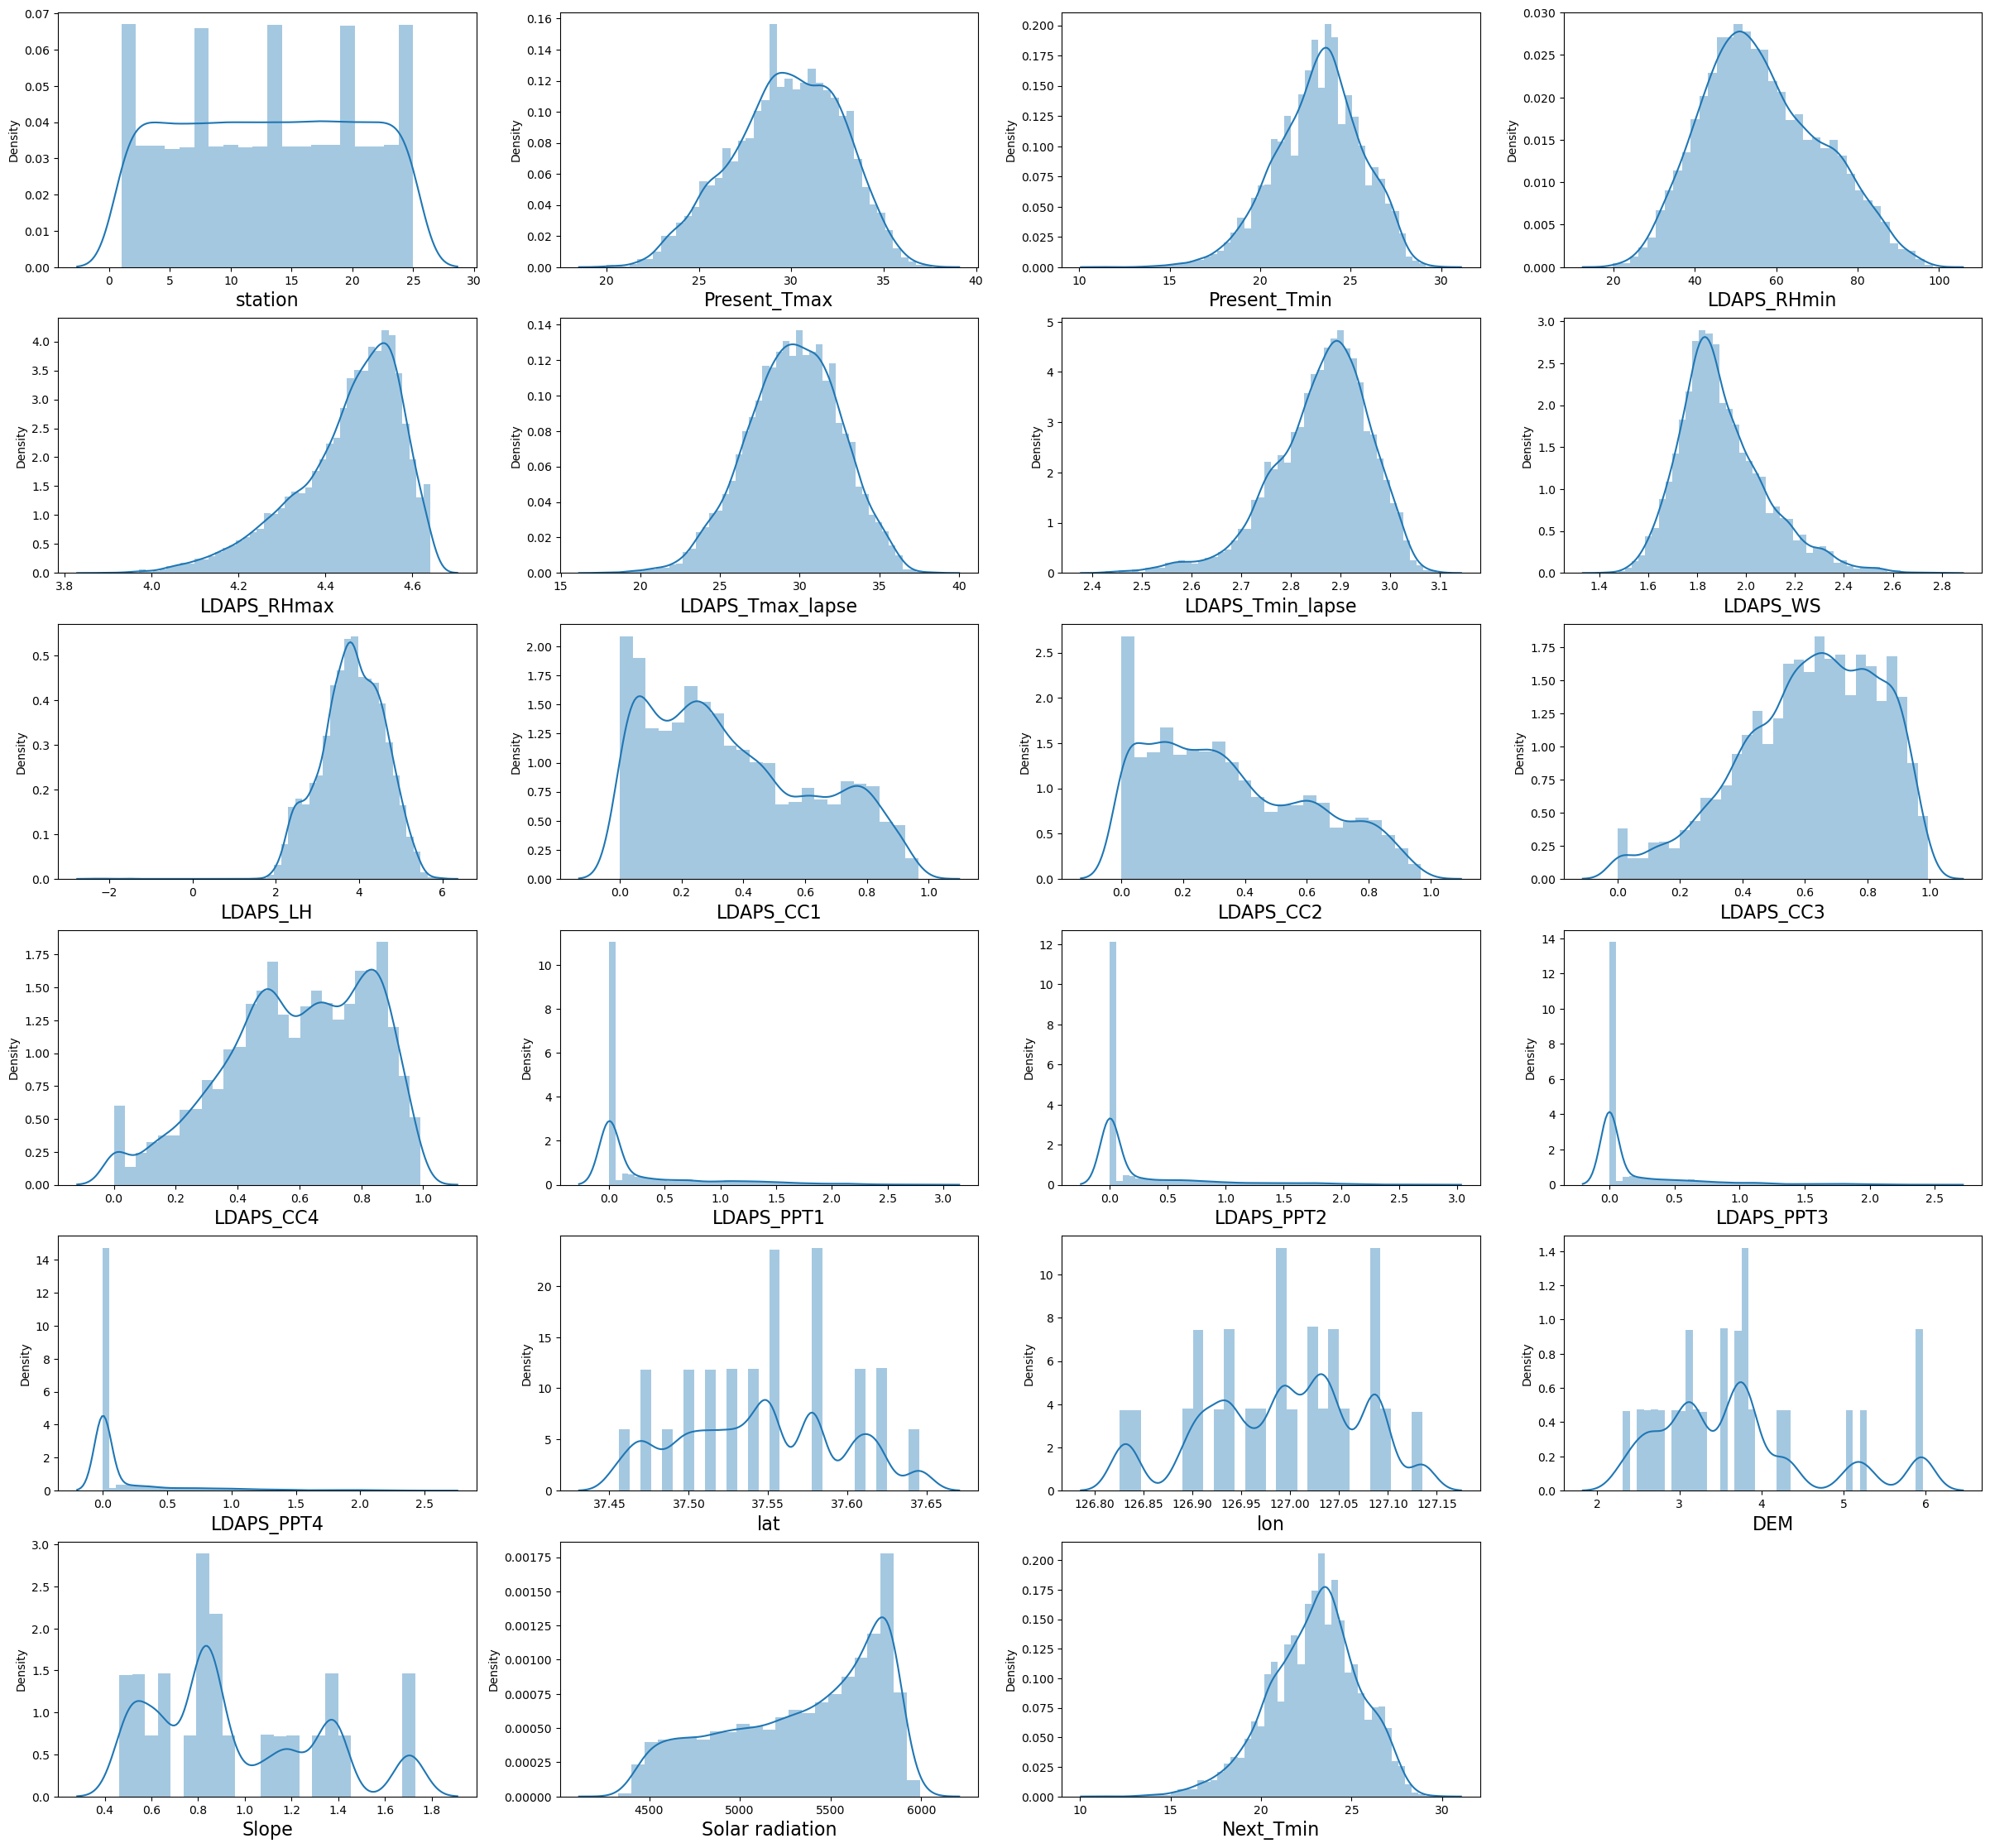

In [40]:
plt.figure(figsize=(30,28))  
plotnumber=1

for col in x.columns:
    if plotnumber<=24:
        ax=plt.subplot(6,4,plotnumber)   
        sns.distplot(df[col])  
        plt.xlabel(col,fontsize=16)
    plotnumber+=1
plt.show() 


# Outliers

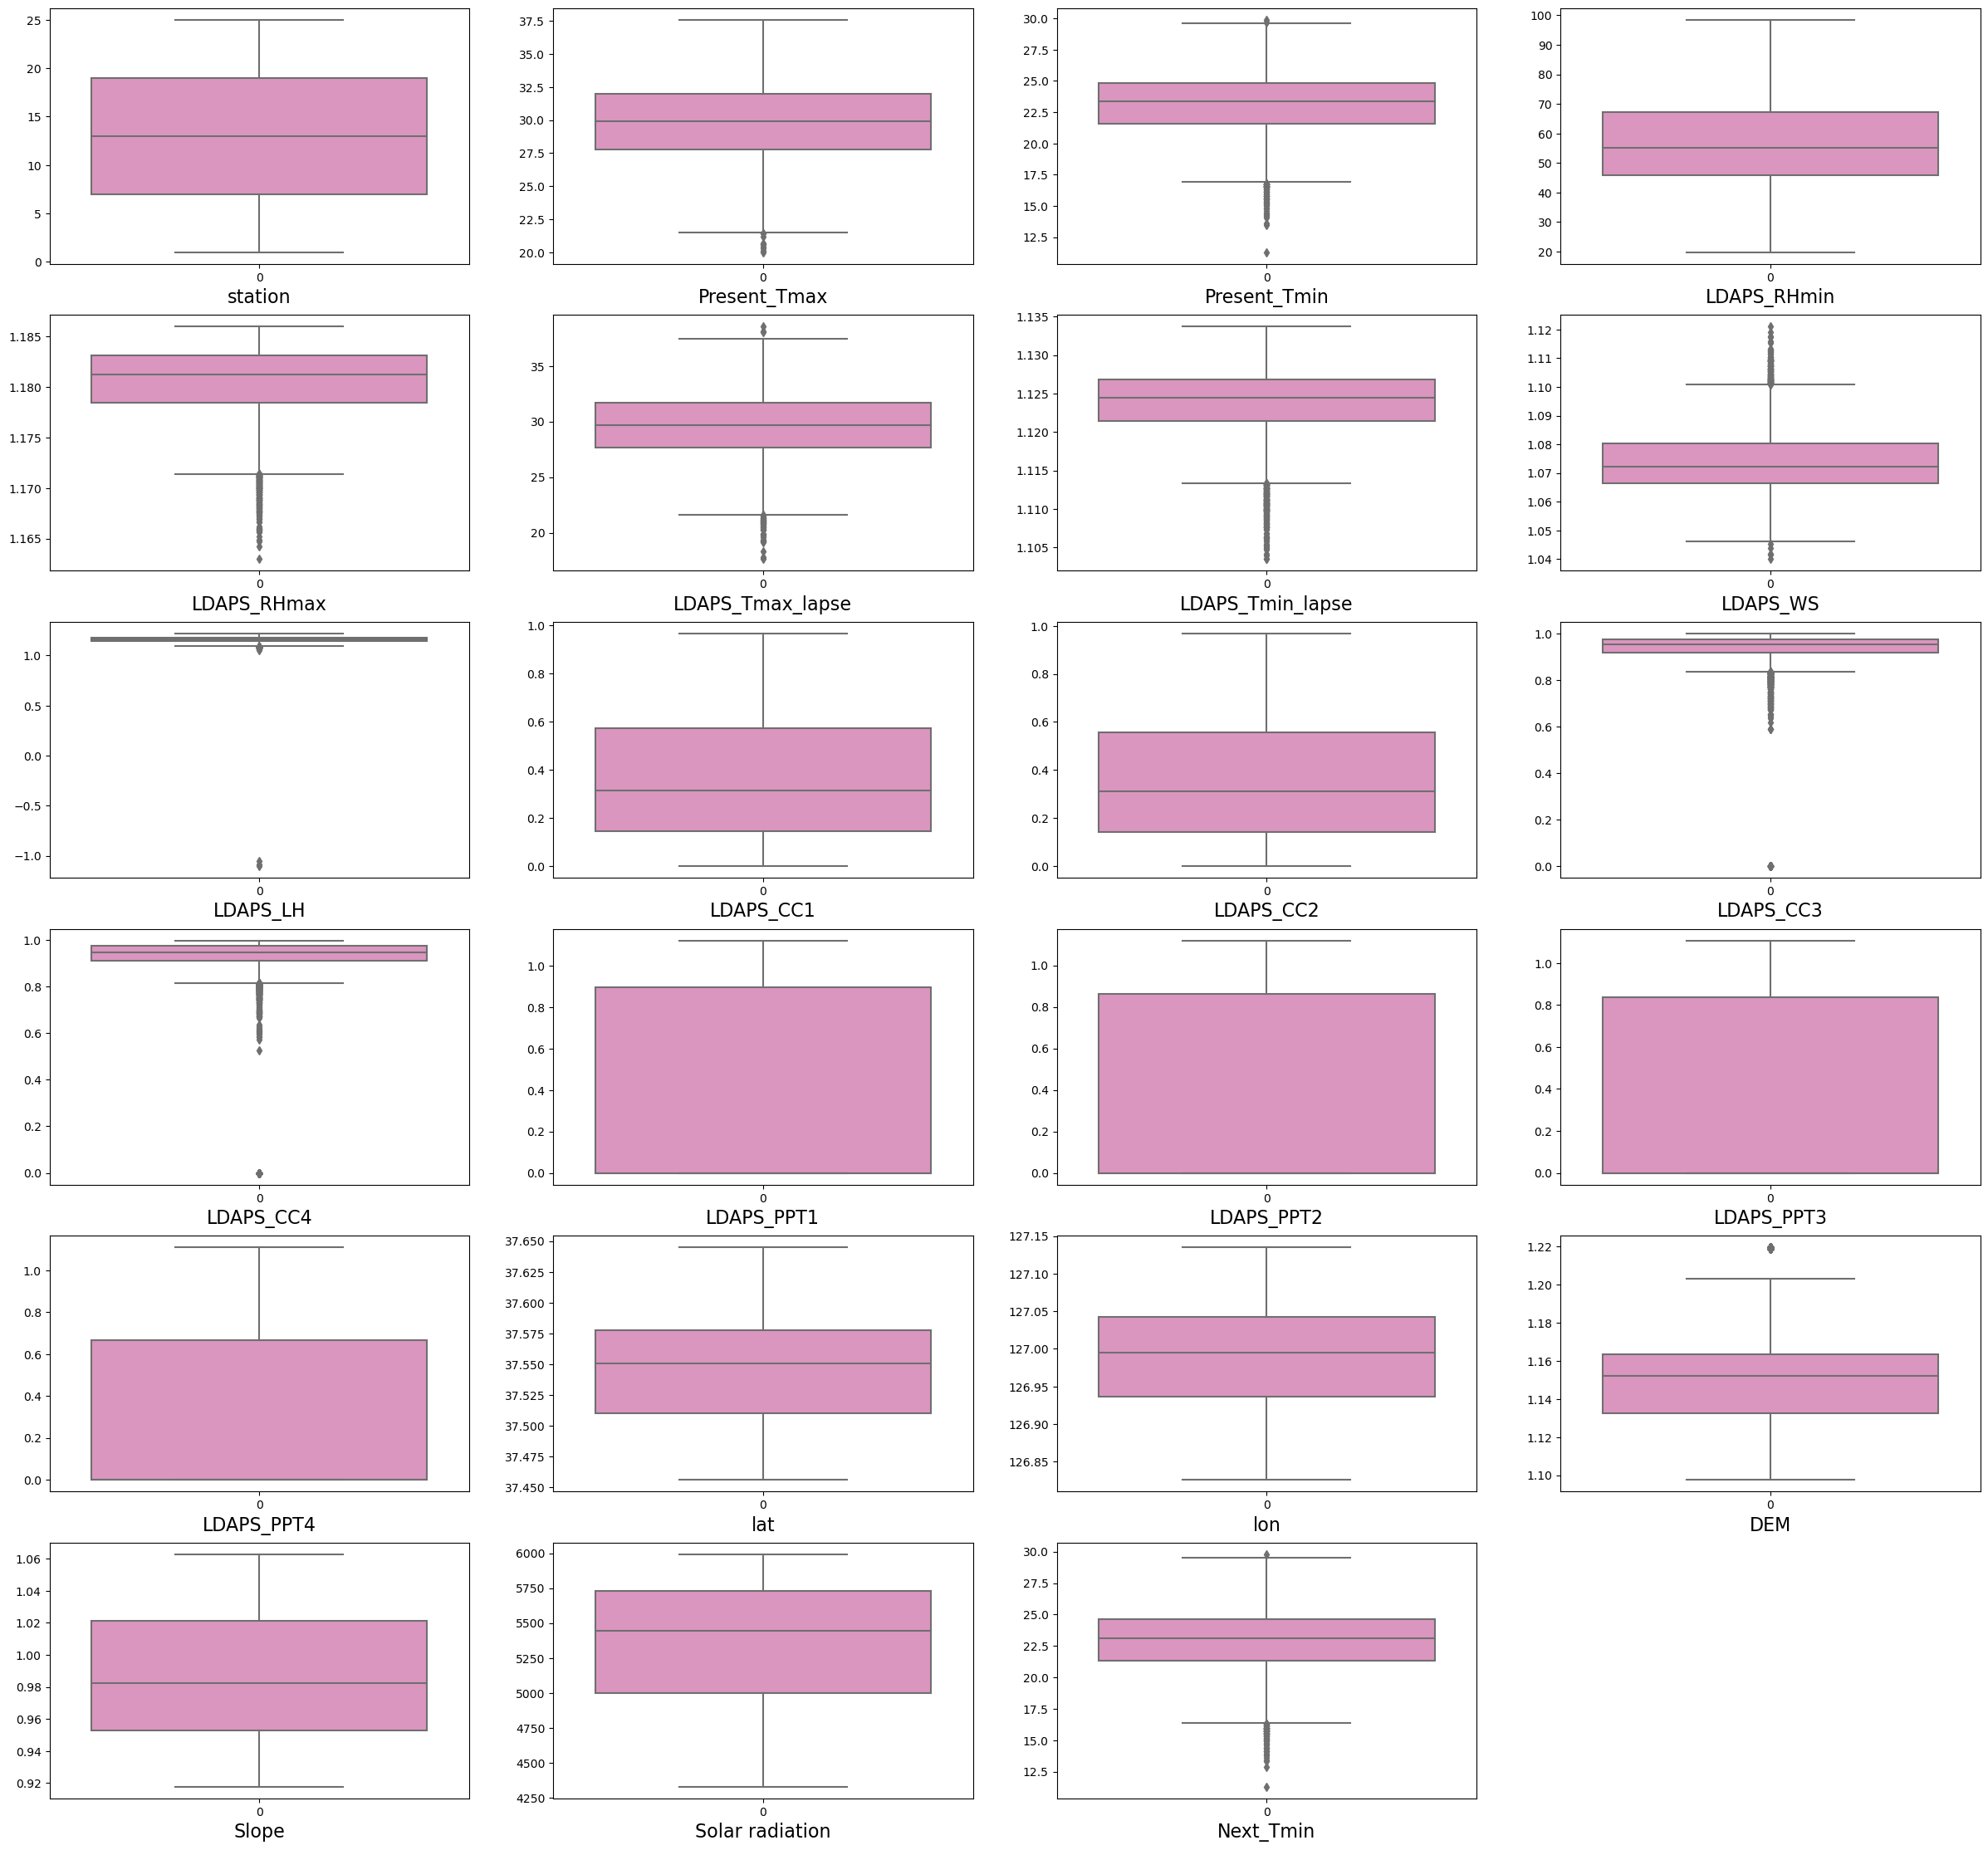

In [116]:
plt.figure(figsize=(30,28))  
plotnumber=1

for col in x.columns:
    if plotnumber<=24:
        ax=plt.subplot(6,4,plotnumber)   
        sns.boxplot(df[col],palette='Set2_r')  
        plt.xlabel(col,fontsize=16)
    plotnumber+=1
plt.show() 

In [43]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [44]:
df2=df

# Approach_Outlier-I:-Removing outliers using the IQR method.


In [45]:
# Calculate quartiles
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

# Calculate interquartile range (IQR)
IQR = q3 - q1

# Calculate upper and lower bounds for outliers
# upper_bound = q3 + (1.5 * IQR)
# lower_bound = q1 - (1.5 * IQR)

In [46]:
# Present_Tmax

In [47]:
Present_Tmax_low=q1.Present_Tmax-(1.5*IQR.Present_Tmax)

index=np.where(df['Present_Tmax']<Present_Tmax_low)

df=df.drop(df.index[index])

In [48]:
# Present_Tmin

In [49]:
Present_Tmin_high=(q3.Present_Tmin+(1.5*IQR.Present_Tmin))


index=np.where(df['Present_Tmin']>Present_Tmin_high)

df=df.drop(df.index[index])

In [50]:
Present_Tmin_low=q1.Present_Tmin-(1.5*IQR.Present_Tmin)

index=np.where(df['Present_Tmin']<Present_Tmin_low)

df=df.drop(df.index[index])

In [51]:
# LDAPS_RHmax

In [52]:
LDAPS_RHmax_low=q1.LDAPS_RHmax-(1.5*IQR.LDAPS_RHmax)

index=np.where(df['LDAPS_RHmax']<LDAPS_RHmax_low)

df=df.drop(df.index[index])

In [53]:
# LDAPS_Tmax_lapse

In [54]:
LDAPS_Tmax_lapse_high=(q3.LDAPS_Tmax_lapse+(1.5*IQR.LDAPS_Tmax_lapse))


index=np.where(df['LDAPS_Tmax_lapse']>LDAPS_Tmax_lapse_high)

df=df.drop(df.index[index])

In [55]:
LDAPS_Tmax_lapse_low=q1.LDAPS_Tmax_lapse-(1.5*IQR.LDAPS_Tmax_lapse)

index=np.where(df['LDAPS_Tmax_lapse']<LDAPS_Tmax_lapse_low)

df=df.drop(df.index[index])

In [56]:
# LDAPS_Tmin_lapse

In [57]:
LDAPS_Tmin_lapse_low=q1.LDAPS_Tmin_lapse-(1.5*IQR.LDAPS_Tmin_lapse)

index=np.where(df['LDAPS_Tmin_lapse']<LDAPS_Tmin_lapse_low)

df=df.drop(df.index[index])

In [58]:
# LDAPS_WS

In [59]:
LDAPS_WS_high=(q3.LDAPS_WS+(1.5*IQR.LDAPS_WS))


index=np.where(df['LDAPS_WS']>LDAPS_WS_high)

df=df.drop(df.index[index])

In [60]:
LDAPS_WS_low=q1.LDAPS_WS-(1.5*IQR.LDAPS_WS)

index=np.where(df['LDAPS_WS']<LDAPS_WS_low)

df=df.drop(df.index[index])

In [61]:
# LDAPS_LH

In [62]:
LDAPS_LH_high=(q3.LDAPS_LH+(1.5*IQR.LDAPS_LH))


index=np.where(df['LDAPS_LH']>LDAPS_LH_high)

df=df.drop(df.index[index])

In [63]:
LDAPS_LH_low=q1.LDAPS_LH-(1.5*IQR.LDAPS_LH)

index=np.where(df['LDAPS_LH']<LDAPS_LH_low)

df=df.drop(df.index[index])

In [64]:
# LDAPS_PPT1

In [65]:
LDAPS_PPT1_high=(q3.LDAPS_PPT1+(1.5*IQR.LDAPS_PPT1))


index=np.where(df['LDAPS_PPT1']>LDAPS_PPT1_high)

df=df.drop(df.index[index])

In [66]:
# LDAPS_PPT2

In [67]:
LDAPS_PPT2_high=(q3.LDAPS_PPT2+(1.5*IQR.LDAPS_PPT2))


index=np.where(df['LDAPS_PPT2']>LDAPS_PPT2_high)

df=df.drop(df.index[index])

In [68]:
# LDAPS_PPT3

In [69]:
LDAPS_PPT3_high=(q3.LDAPS_PPT3+(1.5*IQR.LDAPS_PPT3))


index=np.where(df['LDAPS_PPT3']>LDAPS_PPT3_high)

df=df.drop(df.index[index])

In [70]:
# LDAPS_PPT4

In [71]:
LDAPS_PPT4_high=(q3.LDAPS_PPT4+(1.5*IQR.LDAPS_PPT4))


index=np.where(df['LDAPS_PPT4']>LDAPS_PPT4_high)

df=df.drop(df.index[index])

In [72]:
# DEM

In [73]:
DEM_high=(q3.DEM+(1.5*IQR.DEM))


index=np.where(df['DEM']>DEM_high)

df=df.drop(df.index[index])

In [74]:
# Next_Tmin

In [75]:
Next_Tmin_high=(q3.Next_Tmin+(1.5*IQR.Next_Tmin))


index=np.where(df['Next_Tmin']>Next_Tmin_high)

df=df.drop(df.index[index])

In [76]:
Next_Tmin_low=q1.Next_Tmin-(1.5*IQR.Next_Tmin)

index=np.where(df['Next_Tmin']<Next_Tmin_low)

df=df.drop(df.index[index])

In [77]:
df.reset_index()

Empty DataFrame
Columns: [Date, station, Present_Tmax, Present_Tmin, LDAPS_RHmin, LDAPS_RHmax, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, LDAPS_WS, LDAPS_LH, LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, lat, lon, DEM, Slope, Solar radiation, Next_Tmax, Next_Tmin]
Index: []

[0 rows x 25 columns]

We've observed that the application of the IQR method results in significant data loss, rendering it impractical for further use in model building. Consequently, we have decided to shift our approach to the Z-score method for outlier removal.

In [78]:
df=df2


# Approach_Outlier-II: Removing outliers using the Z-score method.

In [79]:
from scipy.stats import zscore

In [80]:
z=np.abs(zscore(x))
z.shape


(7588, 23)

In [81]:
threshold=3
print(np.where(z>3))

(array([  25,   25,   26, ..., 7581, 7582, 7582], dtype=int64), array([ 7, 14, 14, ...,  2,  2,  6], dtype=int64))


In [82]:
df1=df[(z<3).all(axis=1)]
df1

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Date                                                                        
2013-06-30      1.0          28.7          21.4    58.255688     4.499858   
2013-06-30      2.0          31.9          21.6    52.263397     4.491419   
2013-06-30      3.0          31.6          23.3    48.690479     4.379060   
2013-06-30      4.0          32.0          23.4    58.239788     4.586534   
2013-06-30      5.0          31.4          21.9    56.174095     4.483978   
...             ...           ...           ...          ...          ...   
2017-08-30     21.0          23.1          17.8    24.688997     4.277426   
2017-08-30     22.0          22.5          17.4    30.094858     4.374125   
2017-08-30     23.0          23.3          17.1    26.741310     4.288483   
2017-08-30     24.0          23.3          17.7    24.040634     4.259746   
2017-08-30     25.0          23.2          17.4    22.933014     4.258805   

            LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  \
Date                                                                            
2013-06-30         28.074101          2.844153  1.896289  4.110499   0.233947   
2013-06-30         29.850689          2.885901  1.785468  3.731014   0.225508   
2013-06-30         30.091292          2.906984  1.830969  2.740099   0.209344   
2013-06-30         29.704629          2.857247  1.781083  4.035663   0.216372   
2013-06-30         29.113934          2.863778  1.789965  4.761697   0.151407   
...                      ...               ...       ...       ...        ...   
2017-08-30         27.812697          2.635366  1.876086  2.126355   0.052902   
2017-08-30         26.704905          2.611685  1.793400  4.347071   0.066461   
2017-08-30         26.352081          2.657859  1.832031  4.161290   0.030034   
2017-08-30         27.010193          2.655868  1.870345  3.614996   0.035874   
2017-08-30         27.939516          2.645880  1.938926  2.086997   0.048954   

            ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon  \
Date        ...                                                         
2013-06-30  ...         0.0         0.0         0.0  37.6046  126.991   
2013-06-30  ...         0.0         0.0         0.0  37.6046  127.032   
2013-06-30  ...         0.0         0.0         0.0  37.5776  127.058   
2013-06-30  ...         0.0         0.0         0.0  37.6450  127.022   
2013-06-30  ...         0.0         0.0         0.0  37.5507  127.135   
...         ...         ...         ...         ...      ...      ...   
2017-08-30  ...         0.0         0.0         0.0  37.5507  127.040   
2017-08-30  ...         0.0         0.0         0.0  37.5102  127.086   
2017-08-30  ...         0.0         0.0         0.0  37.5372  126.891   
2017-08-30  ...         0.0         0.0         0.0  37.5237  126.909   
2017-08-30  ...         0.0         0.0         0.0  37.5237  126.970   

                 DEM     Slope  Solar radiation  Next_Tmax  Next_Tmin  
Date                                                                   
2013-06-30  5.965871  1.406938      5992.895996       29.1       21.2  
2013-06-30  3.550622  0.801092      5869.312500       30.5       22.5  
2013-06-30  3.217444  0.643203      5863.555664       31.1       23.9  
2013-06-30  3.575659  1.363477      5856.964844       31.7       24.3  
2013-06-30  3.272250  0.796600      5859.552246       31.2       22.5  
...              ...       ...              ...        ...        ...  
2017-08-30  2.973771  0.830151      4456.024414       27.6       17.7  
2017-08-30  2.800629  0.510703      4441.803711       28.0       17.1  
2017-08-30  2.498004  0.537630      4443.313965       28.3       18.1  
2017-08-30  2.586099  0.605778      4438.373535       28.6       18.8  
2017-08-30  2.695484  0.647366      4451.345215       27.8       17.4  

[6740 rows x 24 columns]

# Data Loss

In [83]:
(7588-7093)/7588*100

6.523458091723774

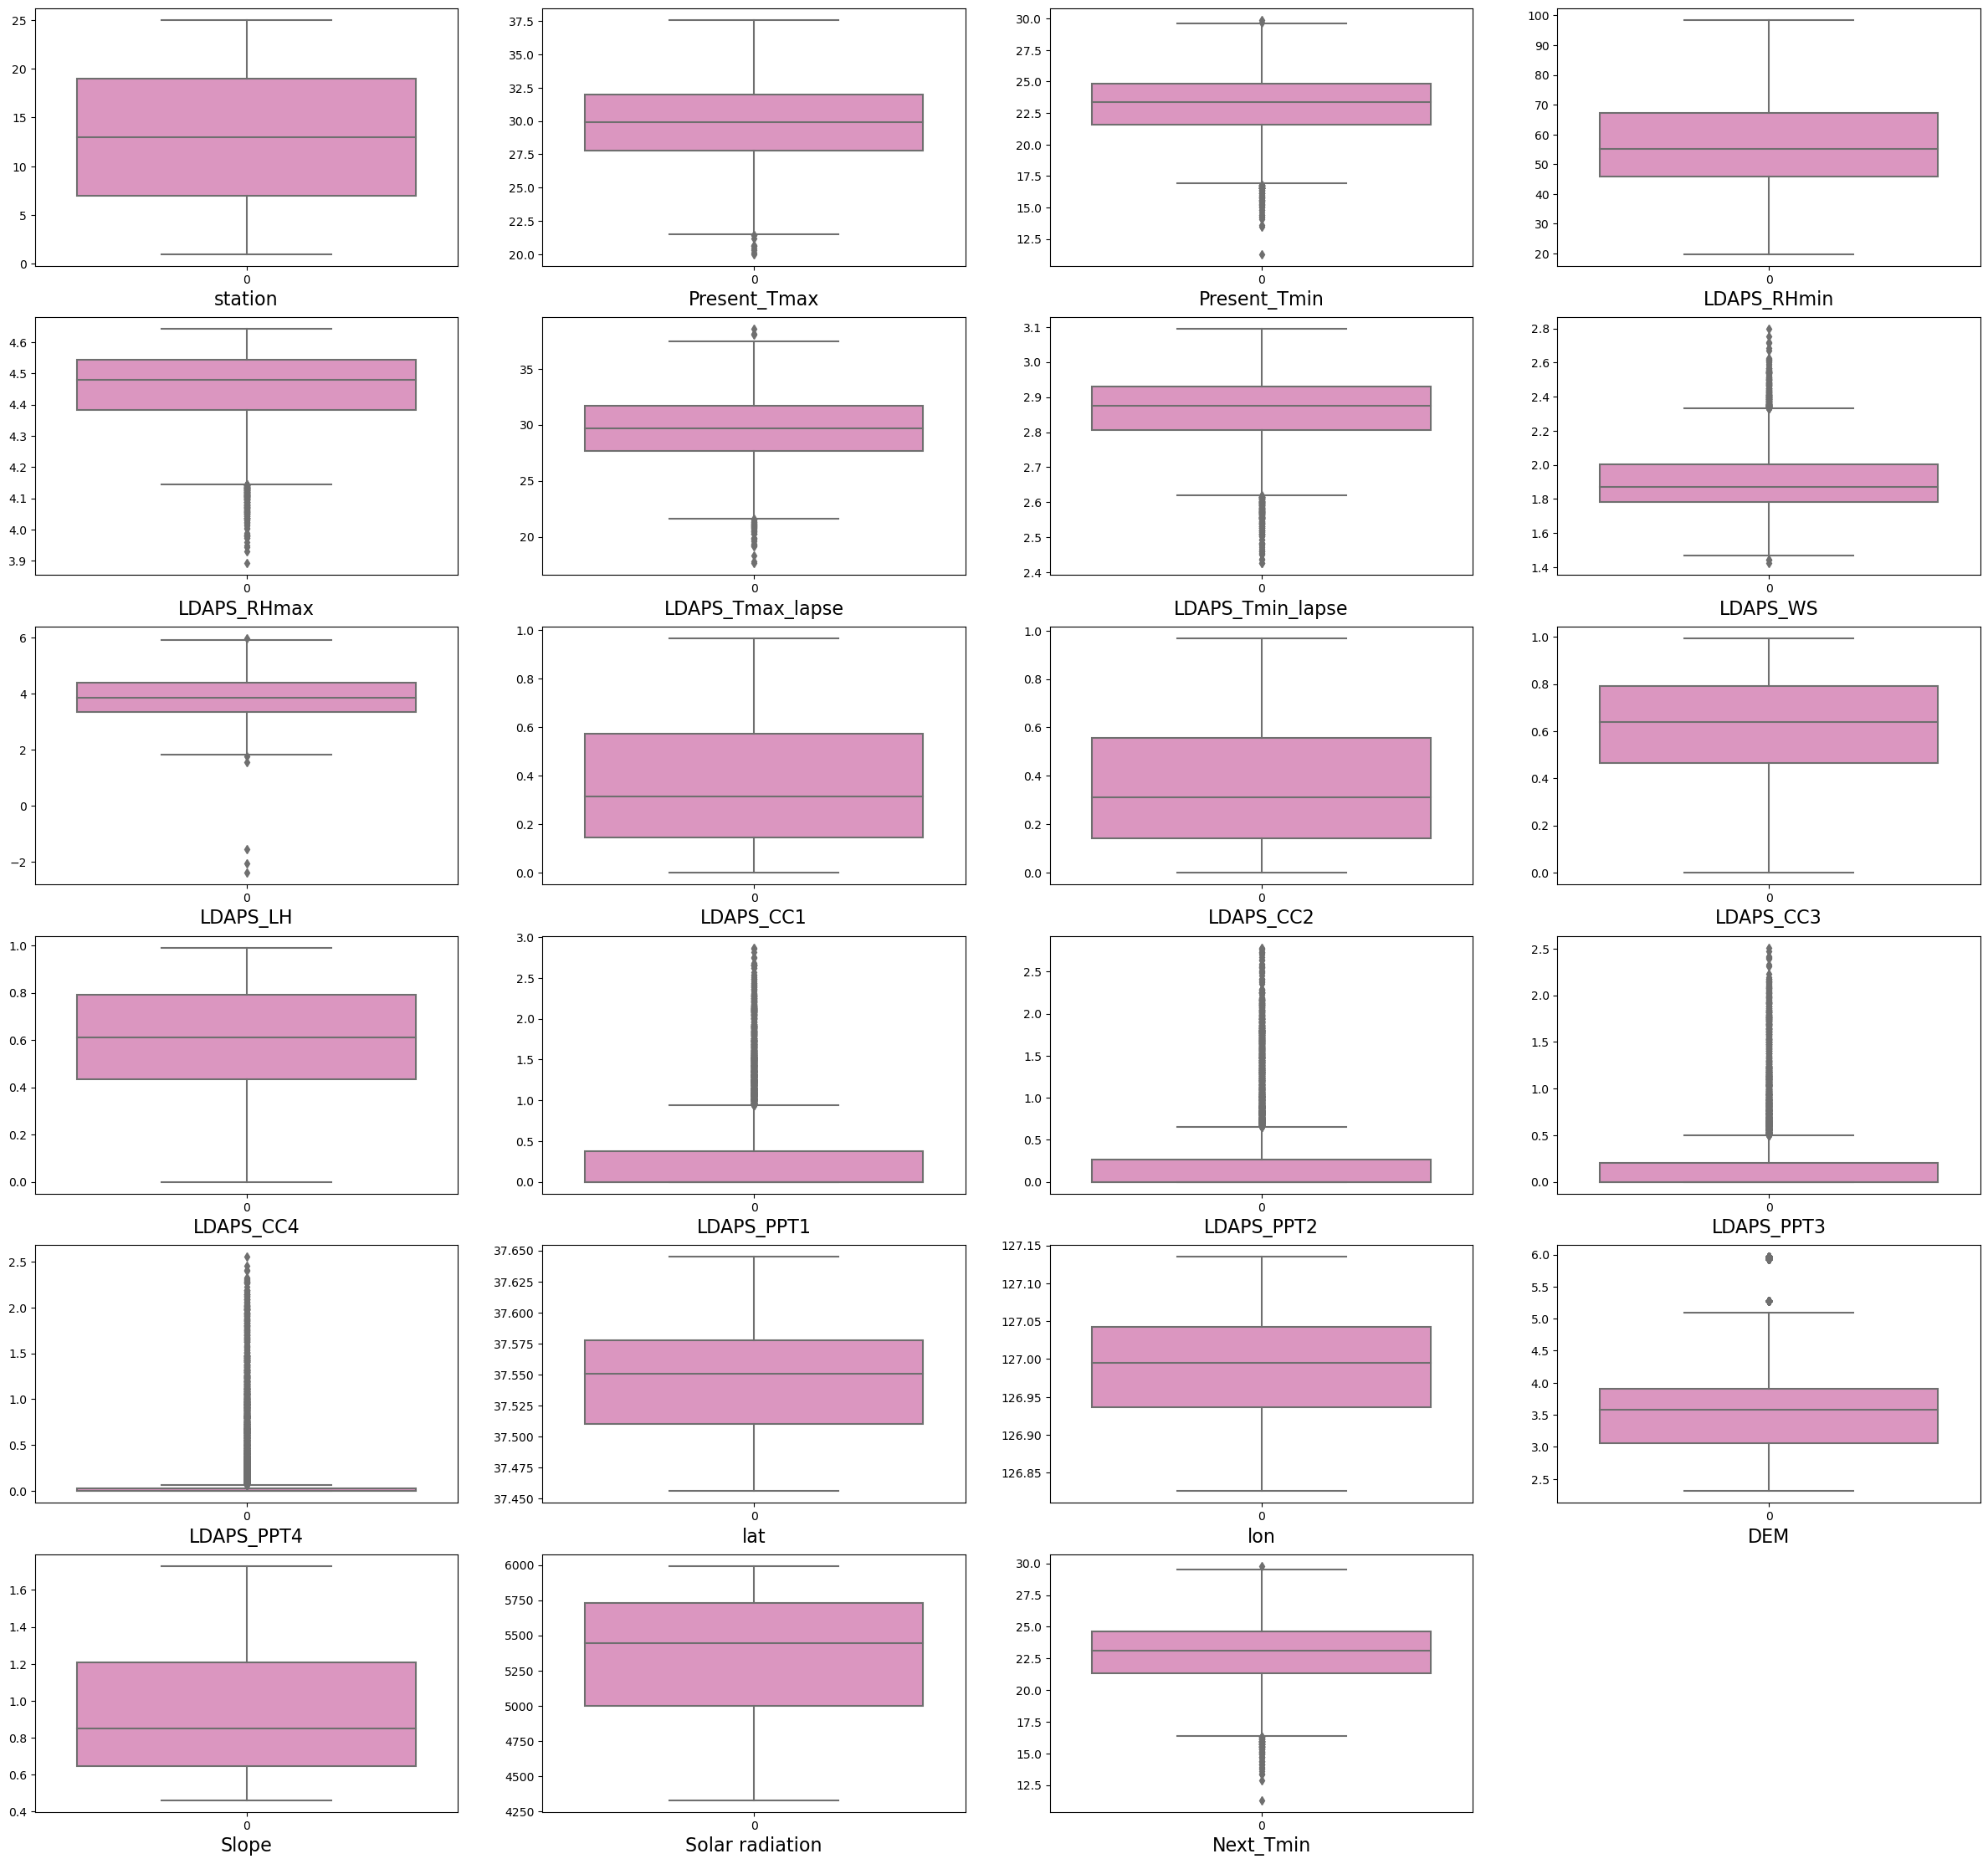

In [84]:
plt.figure(figsize=(30,28))  
plotnumber=1

for col in x.columns:
    if plotnumber<=24:
        ax=plt.subplot(6,4,plotnumber)   
        sns.boxplot(df[col],palette='Set2_r')  
        plt.xlabel(col,fontsize=16)
    plotnumber+=1
plt.show() 

In [85]:
df=df1

In [86]:
df

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Date                                                                        
2013-06-30      1.0          28.7          21.4    58.255688     4.499858   
2013-06-30      2.0          31.9          21.6    52.263397     4.491419   
2013-06-30      3.0          31.6          23.3    48.690479     4.379060   
2013-06-30      4.0          32.0          23.4    58.239788     4.586534   
2013-06-30      5.0          31.4          21.9    56.174095     4.483978   
...             ...           ...           ...          ...          ...   
2017-08-30     21.0          23.1          17.8    24.688997     4.277426   
2017-08-30     22.0          22.5          17.4    30.094858     4.374125   
2017-08-30     23.0          23.3          17.1    26.741310     4.288483   
2017-08-30     24.0          23.3          17.7    24.040634     4.259746   
2017-08-30     25.0          23.2          17.4    22.933014     4.258805   

            LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  \
Date                                                                            
2013-06-30         28.074101          2.844153  1.896289  4.110499   0.233947   
2013-06-30         29.850689          2.885901  1.785468  3.731014   0.225508   
2013-06-30         30.091292          2.906984  1.830969  2.740099   0.209344   
2013-06-30         29.704629          2.857247  1.781083  4.035663   0.216372   
2013-06-30         29.113934          2.863778  1.789965  4.761697   0.151407   
...                      ...               ...       ...       ...        ...   
2017-08-30         27.812697          2.635366  1.876086  2.126355   0.052902   
2017-08-30         26.704905          2.611685  1.793400  4.347071   0.066461   
2017-08-30         26.352081          2.657859  1.832031  4.161290   0.030034   
2017-08-30         27.010193          2.655868  1.870345  3.614996   0.035874   
2017-08-30         27.939516          2.645880  1.938926  2.086997   0.048954   

            ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon  \
Date        ...                                                         
2013-06-30  ...         0.0         0.0         0.0  37.6046  126.991   
2013-06-30  ...         0.0         0.0         0.0  37.6046  127.032   
2013-06-30  ...         0.0         0.0         0.0  37.5776  127.058   
2013-06-30  ...         0.0         0.0         0.0  37.6450  127.022   
2013-06-30  ...         0.0         0.0         0.0  37.5507  127.135   
...         ...         ...         ...         ...      ...      ...   
2017-08-30  ...         0.0         0.0         0.0  37.5507  127.040   
2017-08-30  ...         0.0         0.0         0.0  37.5102  127.086   
2017-08-30  ...         0.0         0.0         0.0  37.5372  126.891   
2017-08-30  ...         0.0         0.0         0.0  37.5237  126.909   
2017-08-30  ...         0.0         0.0         0.0  37.5237  126.970   

                 DEM     Slope  Solar radiation  Next_Tmax  Next_Tmin  
Date                                                                   
2013-06-30  5.965871  1.406938      5992.895996       29.1       21.2  
2013-06-30  3.550622  0.801092      5869.312500       30.5       22.5  
2013-06-30  3.217444  0.643203      5863.555664       31.1       23.9  
2013-06-30  3.575659  1.363477      5856.964844       31.7       24.3  
2013-06-30  3.272250  0.796600      5859.552246       31.2       22.5  
...              ...       ...              ...        ...        ...  
2017-08-30  2.973771  0.830151      4456.024414       27.6       17.7  
2017-08-30  2.800629  0.510703      4441.803711       28.0       17.1  
2017-08-30  2.498004  0.537630      4443.313965       28.3       18.1  
2017-08-30  2.586099  0.605778      4438.373535       28.6       18.8  
2017-08-30  2.695484  0.647366      4451.345215       27.8       17.4  

[6740 rows x 24 columns]

In [87]:
df.corr()['Next_Tmax']

station             0.107094
Present_Tmax        0.587192
Present_Tmin        0.439660
LDAPS_RHmin        -0.433807
LDAPS_RHmax        -0.296236
LDAPS_Tmax_lapse    0.817058
LDAPS_Tmin_lapse    0.543722
LDAPS_WS           -0.251524
LDAPS_LH            0.139387
LDAPS_CC1          -0.453988
LDAPS_CC2          -0.484558
LDAPS_CC3          -0.428068
LDAPS_CC4          -0.385309
LDAPS_PPT1         -0.329115
LDAPS_PPT2         -0.332698
LDAPS_PPT3         -0.251551
LDAPS_PPT4         -0.226483
lat                -0.049168
lon                 0.010557
DEM                -0.138767
Slope              -0.086780
Solar radiation    -0.020693
Next_Tmax           1.000000
Next_Tmin           0.581613
Name: Next_Tmax, dtype: float64

# Model-I:- with all features

In [88]:
df

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Date                                                                        
2013-06-30      1.0          28.7          21.4    58.255688     4.499858   
2013-06-30      2.0          31.9          21.6    52.263397     4.491419   
2013-06-30      3.0          31.6          23.3    48.690479     4.379060   
2013-06-30      4.0          32.0          23.4    58.239788     4.586534   
2013-06-30      5.0          31.4          21.9    56.174095     4.483978   
...             ...           ...           ...          ...          ...   
2017-08-30     21.0          23.1          17.8    24.688997     4.277426   
2017-08-30     22.0          22.5          17.4    30.094858     4.374125   
2017-08-30     23.0          23.3          17.1    26.741310     4.288483   
2017-08-30     24.0          23.3          17.7    24.040634     4.259746   
2017-08-30     25.0          23.2          17.4    22.933014     4.258805   

            LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  \
Date                                                                            
2013-06-30         28.074101          2.844153  1.896289  4.110499   0.233947   
2013-06-30         29.850689          2.885901  1.785468  3.731014   0.225508   
2013-06-30         30.091292          2.906984  1.830969  2.740099   0.209344   
2013-06-30         29.704629          2.857247  1.781083  4.035663   0.216372   
2013-06-30         29.113934          2.863778  1.789965  4.761697   0.151407   
...                      ...               ...       ...       ...        ...   
2017-08-30         27.812697          2.635366  1.876086  2.126355   0.052902   
2017-08-30         26.704905          2.611685  1.793400  4.347071   0.066461   
2017-08-30         26.352081          2.657859  1.832031  4.161290   0.030034   
2017-08-30         27.010193          2.655868  1.870345  3.614996   0.035874   
2017-08-30         27.939516          2.645880  1.938926  2.086997   0.048954   

            ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon  \
Date        ...                                                         
2013-06-30  ...         0.0         0.0         0.0  37.6046  126.991   
2013-06-30  ...         0.0         0.0         0.0  37.6046  127.032   
2013-06-30  ...         0.0         0.0         0.0  37.5776  127.058   
2013-06-30  ...         0.0         0.0         0.0  37.6450  127.022   
2013-06-30  ...         0.0         0.0         0.0  37.5507  127.135   
...         ...         ...         ...         ...      ...      ...   
2017-08-30  ...         0.0         0.0         0.0  37.5507  127.040   
2017-08-30  ...         0.0         0.0         0.0  37.5102  127.086   
2017-08-30  ...         0.0         0.0         0.0  37.5372  126.891   
2017-08-30  ...         0.0         0.0         0.0  37.5237  126.909   
2017-08-30  ...         0.0         0.0         0.0  37.5237  126.970   

                 DEM     Slope  Solar radiation  Next_Tmax  Next_Tmin  
Date                                                                   
2013-06-30  5.965871  1.406938      5992.895996       29.1       21.2  
2013-06-30  3.550622  0.801092      5869.312500       30.5       22.5  
2013-06-30  3.217444  0.643203      5863.555664       31.1       23.9  
2013-06-30  3.575659  1.363477      5856.964844       31.7       24.3  
2013-06-30  3.272250  0.796600      5859.552246       31.2       22.5  
...              ...       ...              ...        ...        ...  
2017-08-30  2.973771  0.830151      4456.024414       27.6       17.7  
2017-08-30  2.800629  0.510703      4441.803711       28.0       17.1  
2017-08-30  2.498004  0.537630      4443.313965       28.3       18.1  
2017-08-30  2.586099  0.605778      4438.373535       28.6       18.8  
2017-08-30  2.695484  0.647366      4451.345215       27.8       17.4  

[6740 rows x 24 columns]

In [132]:
X = df.drop('Next_Tmax', axis=1)
Y = df['Next_Tmax']

In [133]:
X

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Date                                                                        
2013-06-30      1.0          28.7          21.4    58.255688     1.181892   
2013-06-30      2.0          31.9          21.6    52.263397     1.181645   
2013-06-30      3.0          31.6          23.3    48.690479     1.178324   
2013-06-30      4.0          32.0          23.4    58.239788     1.184400   
2013-06-30      5.0          31.4          21.9    56.174095     1.181427   
...             ...           ...           ...          ...          ...   
2017-08-28     18.0          27.5          18.7    30.205290     1.182653   
2017-08-28     21.0          26.8          18.6    26.050879     1.180851   
2017-08-28     22.0          26.3          18.4    30.173571     1.179281   
2017-08-28     24.0          27.3          18.9    29.670870     1.181868   
2017-08-28     25.0          27.4          18.5    24.243977     1.181358   

            LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  \
Date                                                                            
2013-06-30         28.074101          1.123154  1.073688  1.170066   0.233947   
2013-06-30         29.850689          1.124974  1.066528  1.157541   0.225508   
2013-06-30         30.091292          1.125884  1.069515  1.118512   0.209344   
2013-06-30         29.704629          1.123727  1.066237  1.167680   0.216372   
2013-06-30         29.113934          1.124012  1.066827  1.189342   0.151407   
...                      ...               ...       ...       ...        ...   
2017-08-28         23.329887          1.111573  1.084635  1.196479   0.362357   
2017-08-28         24.367884          1.113301  1.076066  1.119213   0.392633   
2017-08-28         23.940014          1.114198  1.078153  1.195766   0.376835   
2017-08-28         23.378815          1.111167  1.089976  1.170509   0.344987   
2017-08-28         24.468071          1.111722  1.084228  1.112417   0.393134   

            ...  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat  \
Date        ...                                                            
2013-06-30  ...         0.0         0.0         0.0         0.0  37.6046   
2013-06-30  ...         0.0         0.0         0.0         0.0  37.6046   
2013-06-30  ...         0.0         0.0         0.0         0.0  37.5776   
2013-06-30  ...         0.0         0.0         0.0         0.0  37.6450   
2013-06-30  ...         0.0         0.0         0.0         0.0  37.5507   
...         ...         ...         ...         ...         ...      ...   
2017-08-28  ...         0.0         0.0         0.0         0.0  37.4832   
2017-08-28  ...         0.0         0.0         0.0         0.0  37.5507   
2017-08-28  ...         0.0         0.0         0.0         0.0  37.5102   
2017-08-28  ...         0.0         0.0         0.0         0.0  37.5237   
2017-08-28  ...         0.0         0.0         0.0         0.0  37.5237   

                lon       DEM     Slope  Solar radiation  Next_Tmin  
Date                                                                 
2013-06-30  126.991  1.219512  1.038664      5992.895996       21.2  
2013-06-30  127.032  1.151185  0.975659      5869.312500       22.5  
2013-06-30  127.058  1.138650  0.952150      5863.555664       23.9  
2013-06-30  127.022  1.152084  1.035049      5856.964844       24.3  
2013-06-30  127.135  1.140789  0.975050      5859.552246       22.5  
...             ...       ...       ...              ...        ...  
2017-08-28  127.024  1.161114  1.007736      4515.307129       18.6  
2017-08-28  127.040  1.128729  0.979529      4534.740723       18.8  
2017-08-28  127.086  1.121231  0.928056      4520.791504       18.5  
2017-08-28  126.909  1.111346  0.945829      4517.387207       18.2  
2017-08-28  126.970  1.116474  0.952833      4530.068848       18.1  

[7093 rows x 23 columns]

In [134]:
X.shape

(7093, 23)

In [135]:
Y

Date
2013-06-30    29.1
2013-06-30    30.5
2013-06-30    31.1
2013-06-30    31.7
2013-06-30    31.2
              ... 
2017-08-28    23.7
2017-08-28    24.0
2017-08-28    24.4
2017-08-28    24.5
2017-08-28    23.4
Name: Next_Tmax, Length: 7093, dtype: float64

In [136]:
Y.shape

(7093,)

# Feature Scaling

In [137]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X 

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0    -1.663801     -0.381972     -0.845590     0.061870     0.379263   
1    -1.524987      0.727315     -0.757334    -0.356882     0.308048   
2    -1.386174      0.623319     -0.007155    -0.606564    -0.651692   
3    -1.247361      0.761980      0.036974     0.060758     1.103953   
4    -1.108548      0.553988     -0.624949    -0.083596     0.245151   
...        ...           ...           ...          ...          ...   
7088  0.696023     -0.797955     -2.037052    -1.898342     0.599261   
7089  1.112462     -1.040611     -2.081180    -2.188659     0.078700   
7090  1.251275     -1.213937     -2.169436    -1.900558    -0.375055   
7091  1.528901     -0.867285     -1.948795    -1.935688     0.372554   
7092  1.667715     -0.832620     -2.125308    -2.314929     0.225153   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  ...  \
0            -0.578804         -0.260699  0.043966  0.451993  -0.536048  ...   
1             0.048749          0.207883 -0.640034 -0.027117  -0.568348  ...   
2             0.133738          0.442234 -0.354755 -1.519989  -0.630214  ...   
3            -0.002845         -0.113070 -0.667872  0.360717  -0.603314  ...   
4            -0.211499         -0.039673 -0.611554  1.189308  -0.851953  ...   
...                ...               ...       ...       ...        ...  ...   
7088         -2.254625         -3.242483  1.089698  1.462301  -0.044590  ...   
7089         -1.887968         -2.797532  0.271080 -1.493163   0.071283  ...   
7090         -2.039107         -2.566406  0.470499  1.435025   0.010818  ...   
7091         -2.237342         -3.346941  1.599907  0.468908  -0.111072  ...   
7092         -1.852579         -3.203987  1.050836 -1.753137   0.073200  ...   

      LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4       lat       lon  \
0      -0.772749   -0.708187   -0.680635   -0.579574  1.204169 -0.005208   
1      -0.772749   -0.708187   -0.680635   -0.579574  1.204169  0.510502   
2      -0.772749   -0.708187   -0.680635   -0.579574  0.666689  0.837537   
3      -0.772749   -0.708187   -0.680635   -0.579574  2.008399  0.384719   
4      -0.772749   -0.708187   -0.680635   -0.579574  0.131199  1.806065   
...          ...         ...         ...         ...       ...       ...   
7088   -0.772749   -0.708187   -0.680635   -0.579574 -1.212502  0.409875   
7089   -0.772749   -0.708187   -0.680635   -0.579574  0.131199  0.611128   
7090   -0.772749   -0.708187   -0.680635   -0.579574 -0.675022  1.189729   
7091   -0.772749   -0.708187   -0.680635   -0.579574 -0.406281 -1.036628   
7092   -0.772749   -0.708187   -0.680635   -0.579574 -0.406281 -0.269352   

           DEM     Slope  Solar radiation  Next_Tmin  
0     2.099676  1.252032         1.531270  -0.809499  
1    -0.036536 -0.288331         1.234111  -0.248222  
2    -0.428432 -0.863088         1.220269   0.356230  
3    -0.008425  1.163654         1.204421   0.528930  
4    -0.361559 -0.303230         1.210642  -0.248222  
...        ...       ...              ...        ...  
7088  0.273912  0.495900        -2.021623  -1.932052  
7089 -0.738591 -0.193706        -1.974894  -1.845702  
7090 -0.973017 -1.452143        -2.008435  -1.975228  
7091 -1.282050 -1.017628        -2.016621  -2.104753  
7092 -1.121747 -0.846396        -1.986128  -2.147928  

[7093 rows x 23 columns]

To address potential bias stemming from variations in decimal places across feature columns, I've opted to standardize all the features using the Standard Scaler method. This technique ensures that all feature columns have comparable scales, which can enhance the performance and stability of my model./

# Assessing multicollinearity among features.

In [138]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [139]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Features']=X.columns
vif

VIF Values          Features
0     1.257241           station
1     2.672059      Present_Tmax
2     3.202928      Present_Tmin
3     6.276515       LDAPS_RHmin
4     2.259798       LDAPS_RHmax
5     7.089748  LDAPS_Tmax_lapse
6     7.898497  LDAPS_Tmin_lapse
7     1.242786          LDAPS_WS
8     1.439785          LDAPS_LH
9     5.484724         LDAPS_CC1
10    5.666407         LDAPS_CC2
11    2.684839         LDAPS_CC3
12    2.083679         LDAPS_CC4
13    2.878301        LDAPS_PPT1
14    2.627111        LDAPS_PPT2
15    1.742264        LDAPS_PPT3
16    1.643546        LDAPS_PPT4
17    1.261583               lat
18    1.193531               lon
19    3.273547               DEM
20    2.853351             Slope
21    1.236001   Solar radiation
22    5.360796         Next_Tmin

In [140]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [141]:
df.corr()['Next_Tmax']

station             0.106350
Present_Tmax        0.595429
Present_Tmin        0.419374
LDAPS_RHmin        -0.479193
LDAPS_RHmax        -0.327394
LDAPS_Tmax_lapse    0.823290
LDAPS_Tmin_lapse    0.553368
LDAPS_WS           -0.282840
LDAPS_LH            0.119875
LDAPS_CC1          -0.467108
LDAPS_CC2          -0.509981
LDAPS_CC3          -0.410405
LDAPS_CC4          -0.369795
LDAPS_PPT1         -0.309990
LDAPS_PPT2         -0.398678
LDAPS_PPT3         -0.338228
LDAPS_PPT4         -0.306717
lat                -0.049280
lon                 0.004616
DEM                -0.138101
Slope              -0.092269
Solar radiation    -0.040606
Next_Tmax           1.000000
Next_Tmin           0.591210
Name: Next_Tmax, dtype: float64

Here, I'm dropping the multicollinear features along with those least correlated with the target variable.

The longitude,latitude,Slope,Solar radiation,Station has the least correlation with target variable so we will be dropping theses columns.

In [142]:
X=X.drop(columns=['station', 'lat',  'lon',   'Slope', 'Solar radiation'])
X

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
0        -0.381972     -0.845590     0.061870     0.379263         -0.578804   
1         0.727315     -0.757334    -0.356882     0.308048          0.048749   
2         0.623319     -0.007155    -0.606564    -0.651692          0.133738   
3         0.761980      0.036974     0.060758     1.103953         -0.002845   
4         0.553988     -0.624949    -0.083596     0.245151         -0.211499   
...            ...           ...          ...          ...               ...   
7088     -0.797955     -2.037052    -1.898342     0.599261         -2.254625   
7089     -1.040611     -2.081180    -2.188659     0.078700         -1.887968   
7090     -1.213937     -2.169436    -1.900558    -0.375055         -2.039107   
7091     -0.867285     -1.948795    -1.935688     0.372554         -2.237342   
7092     -0.832620     -2.125308    -2.314929     0.225153         -1.852579   

      LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  \
0            -0.260699  0.043966  0.451993  -0.536048  -0.621714  -0.209094   
1             0.207883 -0.640034 -0.027117  -0.568348  -0.434870  -0.220667   
2             0.442234 -0.354755 -1.519989  -0.630214  -0.412632  -0.016152   
3            -0.113070 -0.667872  0.360717  -0.603314  -0.535438  -0.211851   
4            -0.039673 -0.611554  1.189308  -0.851953  -0.441802  -0.125556   
...                ...       ...       ...        ...        ...        ...   
7088         -3.242483  1.089698  1.462301  -0.044590  -1.125694  -1.190789   
7089         -2.797532  0.271080 -1.493163   0.071283  -1.112321  -1.241870   
7090         -2.566406  0.470499  1.435025   0.010818  -1.109524  -1.127703   
7091         -3.346941  1.599907  0.468908  -0.111072  -1.099020  -1.106420   
7092         -3.203987  1.050836 -1.753137   0.073200  -1.087832  -1.185082   

      LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4       DEM  \
0     -0.204560   -0.772749   -0.708187   -0.680635   -0.579574  2.099676   
1     -0.222080   -0.772749   -0.708187   -0.680635   -0.579574 -0.036536   
2     -0.146358   -0.772749   -0.708187   -0.680635   -0.579574 -0.428432   
3     -0.186815   -0.772749   -0.708187   -0.680635   -0.579574 -0.008425   
4     -0.018632   -0.772749   -0.708187   -0.680635   -0.579574 -0.361559   
...         ...         ...         ...         ...         ...       ...   
7088  -0.408325   -0.772749   -0.708187   -0.680635   -0.579574  0.273912   
7089  -0.391815   -0.772749   -0.708187   -0.680635   -0.579574 -0.738591   
7090  -0.429319   -0.772749   -0.708187   -0.680635   -0.579574 -0.973017   
7091  -0.384858   -0.772749   -0.708187   -0.680635   -0.579574 -1.282050   
7092  -0.397363   -0.772749   -0.708187   -0.680635   -0.579574 -1.121747   

      Next_Tmin  
0     -0.809499  
1     -0.248222  
2      0.356230  
3      0.528930  
4     -0.248222  
...         ...  
7088  -1.932052  
7089  -1.845702  
7090  -1.975228  
7091  -2.104753  
7092  -2.147928  

[7093 rows x 18 columns]

In [143]:
X.shape

(7093, 18)

In [144]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Features']=X.columns
vif

VIF Values          Features
0     2.648983      Present_Tmax
1     3.127024      Present_Tmin
2     5.762212       LDAPS_RHmin
3     2.200994       LDAPS_RHmax
4     6.403024  LDAPS_Tmax_lapse
5     7.590723  LDAPS_Tmin_lapse
6     1.215909          LDAPS_WS
7     1.417005          LDAPS_LH
8     5.393524         LDAPS_CC1
9     5.619024         LDAPS_CC2
10    2.666344         LDAPS_CC3
11    2.077568         LDAPS_CC4
12    2.871988        LDAPS_PPT1
13    2.619193        LDAPS_PPT2
14    1.713351        LDAPS_PPT3
15    1.631155        LDAPS_PPT4
16    1.185680               DEM
17    5.310320         Next_Tmin

Now that the multicollinearity issue has been addressed and is within an acceptable range, we can proceed with confidence to the next step of model building.

In [145]:
X

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
0        -0.381972     -0.845590     0.061870     0.379263         -0.578804   
1         0.727315     -0.757334    -0.356882     0.308048          0.048749   
2         0.623319     -0.007155    -0.606564    -0.651692          0.133738   
3         0.761980      0.036974     0.060758     1.103953         -0.002845   
4         0.553988     -0.624949    -0.083596     0.245151         -0.211499   
...            ...           ...          ...          ...               ...   
7088     -0.797955     -2.037052    -1.898342     0.599261         -2.254625   
7089     -1.040611     -2.081180    -2.188659     0.078700         -1.887968   
7090     -1.213937     -2.169436    -1.900558    -0.375055         -2.039107   
7091     -0.867285     -1.948795    -1.935688     0.372554         -2.237342   
7092     -0.832620     -2.125308    -2.314929     0.225153         -1.852579   

      LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  \
0            -0.260699  0.043966  0.451993  -0.536048  -0.621714  -0.209094   
1             0.207883 -0.640034 -0.027117  -0.568348  -0.434870  -0.220667   
2             0.442234 -0.354755 -1.519989  -0.630214  -0.412632  -0.016152   
3            -0.113070 -0.667872  0.360717  -0.603314  -0.535438  -0.211851   
4            -0.039673 -0.611554  1.189308  -0.851953  -0.441802  -0.125556   
...                ...       ...       ...        ...        ...        ...   
7088         -3.242483  1.089698  1.462301  -0.044590  -1.125694  -1.190789   
7089         -2.797532  0.271080 -1.493163   0.071283  -1.112321  -1.241870   
7090         -2.566406  0.470499  1.435025   0.010818  -1.109524  -1.127703   
7091         -3.346941  1.599907  0.468908  -0.111072  -1.099020  -1.106420   
7092         -3.203987  1.050836 -1.753137   0.073200  -1.087832  -1.185082   

      LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4       DEM  \
0     -0.204560   -0.772749   -0.708187   -0.680635   -0.579574  2.099676   
1     -0.222080   -0.772749   -0.708187   -0.680635   -0.579574 -0.036536   
2     -0.146358   -0.772749   -0.708187   -0.680635   -0.579574 -0.428432   
3     -0.186815   -0.772749   -0.708187   -0.680635   -0.579574 -0.008425   
4     -0.018632   -0.772749   -0.708187   -0.680635   -0.579574 -0.361559   
...         ...         ...         ...         ...         ...       ...   
7088  -0.408325   -0.772749   -0.708187   -0.680635   -0.579574  0.273912   
7089  -0.391815   -0.772749   -0.708187   -0.680635   -0.579574 -0.738591   
7090  -0.429319   -0.772749   -0.708187   -0.680635   -0.579574 -0.973017   
7091  -0.384858   -0.772749   -0.708187   -0.680635   -0.579574 -1.282050   
7092  -0.397363   -0.772749   -0.708187   -0.680635   -0.579574 -1.121747   

      Next_Tmin  
0     -0.809499  
1     -0.248222  
2      0.356230  
3      0.528930  
4     -0.248222  
...         ...  
7088  -1.932052  
7089  -1.845702  
7090  -1.975228  
7091  -2.104753  
7092  -2.147928  

[7093 rows x 18 columns]

In [146]:
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=i) 
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)   
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is', maxacc,'at random state',maxrs) 

Best accuracy is 0.7960780828078058 at random state 148


In [147]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=maxrs)

20% of the dataset will be used for testing, and the remaining 80% for training our machine learning models.

In [148]:
def evaluate_regression(model, X, Y):
    print('Model Name:',model)
    # Splitting data into train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=maxrs)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting y_test
    pred = model.predict(X_test)
    
    # Predicting y_train
    train = model.predict(X_train)
    
    
    # R-squared Score
    r2 = r2_score(Y_test, pred)
    print("R-squared Score:", r2)
    
    #R-squared Score on training data
    r3 = r2_score(Y_train, train)
    print("R-squared Score on training data:", r3*100)
    
    # Mean Absolute Error
    mae = mean_absolute_error(Y_test, pred)
    print("Mean Absolute Error:", mae)
    
    # Mean Squared Error
    mse = mean_squared_error(Y_test, pred)
    print("Mean Squared Error:", mse)
    
    # Root Mean Squared Error
    rmse =np.sqrt(mean_squared_error(Y_test, pred))
    print("Root Mean Squared Error:", rmse)
    
    
    
    # Cross Validation Score
    cv_score = cross_val_score(model, X, Y, cv=5, scoring='r2') 
    print("\nCross Validation Score:", cv_score)
    print("Cross Validation Score Mean:", cv_score.mean())
    
    # Result of accuracy minus cv scores
    result = r2 - cv_score.mean()
    print("R-squared Score - Cross Validation Score is", result*100)


In [149]:
# Linear Regression
LR = LinearRegression()
evaluate_regression(LR,X, Y)

Model Name: LinearRegression()
R-squared Score: 0.8022437552657069
R-squared Score on training data: 76.74280139002906
Mean Absolute Error: 1.0614372286815348
Mean Squared Error: 1.8874717255531608
Root Mean Squared Error: 1.3738528762400875

Cross Validation Score: [0.72796576 0.67190391 0.68189921 0.81751975 0.65615604]
Cross Validation Score Mean: 0.7110889326203615
R-squared Score - Cross Validation Score is 9.115482264534535


In [150]:
# Ridge Regressor
RDG = Ridge()
evaluate_regression(RDG,X, Y)

Model Name: Ridge()
R-squared Score: 0.8022277300751732
R-squared Score on training data: 76.74278973424991
Mean Absolute Error: 1.061456248642602
Mean Squared Error: 1.8876246769508254
Root Mean Squared Error: 1.3739085402423354

Cross Validation Score: [0.72810377 0.67185244 0.6818693  0.81755703 0.65620501]
Cross Validation Score Mean: 0.7111175119718091
R-squared Score - Cross Validation Score is 9.111021810336418


In [151]:
# Lasso Regressor
LS = Lasso()
evaluate_regression(LS,X, Y)

Model Name: Lasso()
R-squared Score: 0.5821214974733047
R-squared Score on training data: 55.76265157456019
Mean Absolute Error: 1.5960733649022
Mean Squared Error: 3.988414420466883
Root Mean Squared Error: 1.997101504798112

Cross Validation Score: [0.51250488 0.51031867 0.56777383 0.47183554 0.55379675]
Cross Validation Score Mean: 0.5232459350301015
R-squared Score - Cross Validation Score is 5.887556244320313


In [152]:
# Decision Tree Regression
DT = DecisionTreeRegressor()
evaluate_regression(DT,X, Y)

Model Name: DecisionTreeRegressor()
R-squared Score: 0.7887120322410651
R-squared Score on training data: 100.0
Mean Absolute Error: 1.0075405214940096
Mean Squared Error: 2.016624383368569
Root Mean Squared Error: 1.4200790060304986

Cross Validation Score: [0.37568078 0.37746679 0.36446614 0.63199617 0.34031101]
Cross Validation Score Mean: 0.4179841765488753
R-squared Score - Cross Validation Score is 37.07278556921898


In [153]:
# Random Forest Regression
RFR = RandomForestRegressor()
evaluate_regression(RFR,X, Y)

Model Name: RandomForestRegressor()
R-squared Score: 0.8997940229408247
R-squared Score on training data: 98.53175354651576
Mean Absolute Error: 0.7201007751937977
Mean Squared Error: 0.956409486257927
Root Mean Squared Error: 0.9779619042978754

Cross Validation Score: [0.74253015 0.64062012 0.67031184 0.77776513 0.62478847]
Cross Validation Score Mean: 0.6912031432440754
R-squared Score - Cross Validation Score is 20.859087969674928


In [154]:
# Extra Tree Regression
ETR = ExtraTreesRegressor()
evaluate_regression(ETR,X, Y)

Model Name: ExtraTreesRegressor()
R-squared Score: 0.918264091142871
R-squared Score on training data: 100.0
Mean Absolute Error: 0.6537216349541926
Mean Squared Error: 0.7801231113460174
Root Mean Squared Error: 0.8832457819576708

Cross Validation Score: [0.72862468 0.63508251 0.68184184 0.80084737 0.63184898]
Cross Validation Score Mean: 0.6956490761542844
R-squared Score - Cross Validation Score is 22.26150149885866


In [155]:
# ADA Boost Regressor
ABR = AdaBoostRegressor()
evaluate_regression(ABR,X, Y)

Model Name: AdaBoostRegressor()
R-squared Score: 0.7541878431981793
R-squared Score on training data: 74.58849238774035
Mean Absolute Error: 1.2337646413693957
Mean Squared Error: 2.346138279395737
Root Mean Squared Error: 1.5317108994179474

Cross Validation Score: [0.70920178 0.61349811 0.63284025 0.72714511 0.61167155]
Cross Validation Score Mean: 0.6588713599071648
R-squared Score - Cross Validation Score is 9.53164832910145


In [156]:
# GradientBoostingRegressor
GBR = GradientBoostingRegressor()
evaluate_regression(GBR,X, Y)

Model Name: GradientBoostingRegressor()
R-squared Score: 0.8553595836031191
R-squared Score on training data: 86.09633069100828
Mean Absolute Error: 0.9060258999955291
Mean Squared Error: 1.3805111271614192
Root Mean Squared Error: 1.1749515424737393

Cross Validation Score: [0.74482319 0.65506676 0.69554402 0.80428572 0.65785762]
Cross Validation Score Mean: 0.7115154623095535
R-squared Score - Cross Validation Score is 14.38441212935656


In [157]:
# XGBRegressor
XGBR = XGBRegressor()
evaluate_regression(XGBR,X, Y)

Model Name: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
R-squared Score: 0.9134572004618143
R-squared Score on training data: 98.96336558049964
Mean Absolute Error: 0.6791219172299622
Mean Squared Error: 0.8260021694789716
Root Mean Squared Error: 0.9088466149350899

Cross Validation Score: [0.73

I'm selecting XGBRegressor as the best model because it exhibits the smallest disparity between the test accuracy and cross-validation score. Moreover, both the train and test accuracies are promising and closely aligned.

# Hyper parameter tuning on the best ML Model

In [158]:
# Choosing the XGBRegressor as best model
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]
}

In [159]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=XGBR, param_grid=param_grid, cv=5)

In [160]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...one,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]})

In [161]:
best_params = grid_search.best_params_
best_params

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}

In [162]:
final_model_1 = XGBRegressor(learning_rate=0.1, max_depth=7, n_estimators=300)

In [163]:
final_model_1.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [164]:
pred = final_model_1.predict(X_test)

In [165]:
mse = mean_squared_error(Y_test, pred)

In [166]:
print("Mean Squared Error:", mse)

Mean Squared Error: 0.7489118625780172


In [167]:
r2_score(Y_test,pred)

0.921534190115092

# Saving the model

In [168]:
import joblib

filename = "FinalModel_9.pkl"
joblib.dump(final_model_1, filename)

['FinalModel_9.pkl']

In [169]:
model=joblib.load("FinalModel_9.pkl")

prediction=model.predict(X_test)
prediction

array([30.424927, 33.268505, 30.33848 , ..., 31.770817, 24.499916,
       33.236305], dtype=float32)

In [170]:
a=np.array(Y_test)
df=pd.DataFrame()
df['Predicted']=prediction
df['Original']=a
df

Predicted  Original
0     30.424927      31.6
1     33.268505      34.0
2     30.338480      29.8
3     32.060230      32.0
4     32.146393      32.5
...         ...       ...
1414  29.211809      28.4
1415  29.876869      29.6
1416  31.770817      31.4
1417  24.499916      24.3
1418  33.236305      33.6

[1419 rows x 2 columns]

In [171]:
df.tail()

Predicted  Original
1414  29.211809      28.4
1415  29.876869      29.6
1416  31.770817      31.4
1417  24.499916      24.3
1418  33.236305      33.6

# Model-II:-applying Select K-Best feature method for feature selection

In [172]:
df=df

Predicted  Original
0     30.424927      31.6
1     33.268505      34.0
2     30.338480      29.8
3     32.060230      32.0
4     32.146393      32.5
...         ...       ...
1414  29.211809      28.4
1415  29.876869      29.6
1416  31.770817      31.4
1417  24.499916      24.3
1418  33.236305      33.6

[1419 rows x 2 columns]

In [173]:
X

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
0        -0.381972     -0.845590     0.061870     0.379263         -0.578804   
1         0.727315     -0.757334    -0.356882     0.308048          0.048749   
2         0.623319     -0.007155    -0.606564    -0.651692          0.133738   
3         0.761980      0.036974     0.060758     1.103953         -0.002845   
4         0.553988     -0.624949    -0.083596     0.245151         -0.211499   
...            ...           ...          ...          ...               ...   
7088     -0.797955     -2.037052    -1.898342     0.599261         -2.254625   
7089     -1.040611     -2.081180    -2.188659     0.078700         -1.887968   
7090     -1.213937     -2.169436    -1.900558    -0.375055         -2.039107   
7091     -0.867285     -1.948795    -1.935688     0.372554         -2.237342   
7092     -0.832620     -2.125308    -2.314929     0.225153         -1.852579   

      LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  \
0            -0.260699  0.043966  0.451993  -0.536048  -0.621714  -0.209094   
1             0.207883 -0.640034 -0.027117  -0.568348  -0.434870  -0.220667   
2             0.442234 -0.354755 -1.519989  -0.630214  -0.412632  -0.016152   
3            -0.113070 -0.667872  0.360717  -0.603314  -0.535438  -0.211851   
4            -0.039673 -0.611554  1.189308  -0.851953  -0.441802  -0.125556   
...                ...       ...       ...        ...        ...        ...   
7088         -3.242483  1.089698  1.462301  -0.044590  -1.125694  -1.190789   
7089         -2.797532  0.271080 -1.493163   0.071283  -1.112321  -1.241870   
7090         -2.566406  0.470499  1.435025   0.010818  -1.109524  -1.127703   
7091         -3.346941  1.599907  0.468908  -0.111072  -1.099020  -1.106420   
7092         -3.203987  1.050836 -1.753137   0.073200  -1.087832  -1.185082   

      LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4       DEM  \
0     -0.204560   -0.772749   -0.708187   -0.680635   -0.579574  2.099676   
1     -0.222080   -0.772749   -0.708187   -0.680635   -0.579574 -0.036536   
2     -0.146358   -0.772749   -0.708187   -0.680635   -0.579574 -0.428432   
3     -0.186815   -0.772749   -0.708187   -0.680635   -0.579574 -0.008425   
4     -0.018632   -0.772749   -0.708187   -0.680635   -0.579574 -0.361559   
...         ...         ...         ...         ...         ...       ...   
7088  -0.408325   -0.772749   -0.708187   -0.680635   -0.579574  0.273912   
7089  -0.391815   -0.772749   -0.708187   -0.680635   -0.579574 -0.738591   
7090  -0.429319   -0.772749   -0.708187   -0.680635   -0.579574 -0.973017   
7091  -0.384858   -0.772749   -0.708187   -0.680635   -0.579574 -1.282050   
7092  -0.397363   -0.772749   -0.708187   -0.680635   -0.579574 -1.121747   

      Next_Tmin  
0     -0.809499  
1     -0.248222  
2      0.356230  
3      0.528930  
4     -0.248222  
...         ...  
7088  -1.932052  
7089  -1.845702  
7090  -1.975228  
7091  -2.104753  
7092  -2.147928  

[7093 rows x 18 columns]

In [174]:
Y

Date
2013-06-30    29.1
2013-06-30    30.5
2013-06-30    31.1
2013-06-30    31.7
2013-06-30    31.2
              ... 
2017-08-28    23.7
2017-08-28    24.0
2017-08-28    24.4
2017-08-28    24.5
2017-08-28    23.4
Name: Next_Tmax, Length: 7093, dtype: float64

# Performing feature selection using the select k-best method.

In [175]:
from sklearn.feature_selection import SelectKBest,f_classif

In [176]:
# Instantiate SelectKBest with f_classif scoring function and select top 16 features
best_features = SelectKBest(score_func=f_classif, k=18)

# Fit SelectKBest to features and target variable
fit = best_features.fit(x, y)

# Create DataFrame of feature scores
df_scores = pd.DataFrame(fit.scores_)

# Create DataFrame of feature names
df_columns = pd.DataFrame(x.columns)

# Concatenate scores and feature names
feature_score = pd.concat([df_scores, df_columns], axis=1)
feature_score.columns = ['score', 'feature_name']

# Print top 11 features based on scores
print(feature_score.nlargest(12, 'score'))

         score      feature_name
5   100.761133  LDAPS_Tmax_lapse
22   28.785418         Next_Tmin
1    27.421366      Present_Tmax
6    26.630243  LDAPS_Tmin_lapse
10   15.833986         LDAPS_CC2
2    14.171371      Present_Tmin
9    13.281908         LDAPS_CC1
3    12.415072       LDAPS_RHmin
14   10.051343        LDAPS_PPT2
15    9.547275        LDAPS_PPT3
16    8.363096        LDAPS_PPT4
7     6.820117          LDAPS_WS


In [177]:
df3=X[['LDAPS_Tmax_lapse', 'Next_Tmin', 'Present_Tmax', 'LDAPS_Tmin_lapse', 'LDAPS_CC2',
                 'Present_Tmin', 'LDAPS_CC1', 'LDAPS_RHmin', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'LDAPS_WS']]


In [178]:
df3

LDAPS_Tmax_lapse  Next_Tmin  Present_Tmax  LDAPS_Tmin_lapse  LDAPS_CC2  \
0            -0.578804  -0.809499     -0.381972         -0.260699  -0.621714   
1             0.048749  -0.248222      0.727315          0.207883  -0.434870   
2             0.133738   0.356230      0.623319          0.442234  -0.412632   
3            -0.002845   0.528930      0.761980         -0.113070  -0.535438   
4            -0.211499  -0.248222      0.553988         -0.039673  -0.441802   
...                ...        ...           ...               ...        ...   
7088         -2.254625  -1.932052     -0.797955         -3.242483  -1.125694   
7089         -1.887968  -1.845702     -1.040611         -2.797532  -1.112321   
7090         -2.039107  -1.975228     -1.213937         -2.566406  -1.109524   
7091         -2.237342  -2.104753     -0.867285         -3.346941  -1.099020   
7092         -1.852579  -2.147928     -0.832620         -3.203987  -1.087832   

      Present_Tmin  LDAPS_CC1  LDAPS_RHmin  LDAPS_PPT2  LDAPS_PPT3  \
0        -0.845590  -0.536048     0.061870   -0.708187   -0.680635   
1        -0.757334  -0.568348    -0.356882   -0.708187   -0.680635   
2        -0.007155  -0.630214    -0.606564   -0.708187   -0.680635   
3         0.036974  -0.603314     0.060758   -0.708187   -0.680635   
4        -0.624949  -0.851953    -0.083596   -0.708187   -0.680635   
...            ...        ...          ...         ...         ...   
7088     -2.037052  -0.044590    -1.898342   -0.708187   -0.680635   
7089     -2.081180   0.071283    -2.188659   -0.708187   -0.680635   
7090     -2.169436   0.010818    -1.900558   -0.708187   -0.680635   
7091     -1.948795  -0.111072    -1.935688   -0.708187   -0.680635   
7092     -2.125308   0.073200    -2.314929   -0.708187   -0.680635   

      LDAPS_PPT4  LDAPS_WS  
0      -0.579574  0.043966  
1      -0.579574 -0.640034  
2      -0.579574 -0.354755  
3      -0.579574 -0.667872  
4      -0.579574 -0.611554  
...          ...       ...  
7088   -0.579574  1.089698  
7089   -0.579574  0.271080  
7090   -0.579574  0.470499  
7091   -0.579574  1.599907  
7092   -0.579574  1.050836  

[7093 rows x 12 columns]

In [179]:
Y.shape

(7093,)

In [180]:
X=df3

In [181]:
X.shape

(7093, 12)

In [182]:
# Assessing multicollinearity among features.

In [183]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Features']=X.columns
vif

VIF Values          Features
0     6.123656  LDAPS_Tmax_lapse
1     5.133088         Next_Tmin
2     2.354823      Present_Tmax
3     6.854237  LDAPS_Tmin_lapse
4     4.565266         LDAPS_CC2
5     3.047354      Present_Tmin
6     3.079863         LDAPS_CC1
7     4.261408       LDAPS_RHmin
8     2.424695        LDAPS_PPT2
9     1.673496        LDAPS_PPT3
10    1.411422        LDAPS_PPT4
11    1.134951          LDAPS_WS

In [190]:
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=i) 
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)   
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is', maxacc,'at random state',maxrs) 

Best accuracy is 0.7841765946225827 at random state 148


In [191]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=maxrs)

20% of the dataset will be used for testing, and the remaining 80% for training our machine learning models.

# Model Building

In [192]:
def evaluate_regression(model, X, Y):
    print('Model Name:',model)
    # Splitting data into train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=maxrs)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting y_test
    pred = model.predict(X_test)
    
    # Predicting y_train
    train = model.predict(X_train)
    
    
    # R-squared Score
    r2 = r2_score(Y_test, pred)
    print("R-squared Score:", r2)
    
    #R-squared Score on training data
    r3 = r2_score(Y_train, train)
    print("R-squared Score on training data:", r3*100)
    
    # Mean Absolute Error
    mae = mean_absolute_error(Y_test, pred)
    print("Mean Absolute Error:", mae)
    
    # Mean Squared Error
    mse = mean_squared_error(Y_test, pred)
    print("Mean Squared Error:", mse)
    
    # Root Mean Squared Error
    rmse =np.sqrt(mean_squared_error(Y_test, pred))
    print("Root Mean Squared Error:", rmse)
    
    
    
    # Cross Validation Score
    cv_score = cross_val_score(model, X, Y, cv=5, scoring='r2') 
    print("\nCross Validation Score:", cv_score)
    print("Cross Validation Score Mean:", cv_score.mean())
    
    # Result of accuracy minus cv scores
    result = r2 - cv_score.mean()
    print("R-squared Score - Cross Validation Score is", result*100)


In [193]:
# Linear Regression
LR = LinearRegression()
evaluate_regression(LR,X, Y)

Model Name: LinearRegression()
R-squared Score: 0.7891097933510864
R-squared Score on training data: 75.1802864851605
Mean Absolute Error: 1.091822874675522
Mean Squared Error: 2.012827978103599
Root Mean Squared Error: 1.4187416882941022

Cross Validation Score: [0.7074126  0.66102802 0.66735634 0.82676209 0.63507574]
Cross Validation Score Mean: 0.6995269595485738
R-squared Score - Cross Validation Score is 8.958283380251263


In [194]:
# Ridge Regressor
RDG = Ridge()
evaluate_regression(RDG,X, Y)

Model Name: Ridge()
R-squared Score: 0.7890952947291637
R-squared Score on training data: 75.18027300247158
Mean Absolute Error: 1.091838784435492
Mean Squared Error: 2.012966359265596
Root Mean Squared Error: 1.418790456433083

Cross Validation Score: [0.70757096 0.66097536 0.66733547 0.82677993 0.63508926]
Cross Validation Score Mean: 0.6995501955451573
R-squared Score - Cross Validation Score is 8.954509918400644


In [195]:
# Lasso Regressor
LS = Lasso()
evaluate_regression(LS,X, Y)

Model Name: Lasso()
R-squared Score: 0.5821214974733047
R-squared Score on training data: 55.76265157456019
Mean Absolute Error: 1.5960733649022
Mean Squared Error: 3.988414420466883
Root Mean Squared Error: 1.997101504798112

Cross Validation Score: [0.51250369 0.51031726 0.56777321 0.47183554 0.55380327]
Cross Validation Score Mean: 0.5232465955392234
R-squared Score - Cross Validation Score is 5.887490193408129


In [196]:
# Decision Tree Regression
DT = DecisionTreeRegressor()
evaluate_regression(DT,X, Y)

Model Name: DecisionTreeRegressor()
R-squared Score: 0.7334990504614333
R-squared Score on training data: 100.0
Mean Absolute Error: 1.1456659619450316
Mean Squared Error: 2.543601127554616
Root Mean Squared Error: 1.5948671190900563

Cross Validation Score: [0.39842135 0.35851599 0.29736844 0.61410863 0.30982786]
Cross Validation Score Mean: 0.3956484545390243
R-squared Score - Cross Validation Score is 33.7850595922409


In [197]:
# Random Forest Regression
RFR = RandomForestRegressor()
evaluate_regression(RFR,X, Y)

Model Name: RandomForestRegressor()
R-squared Score: 0.878529275364973
R-squared Score on training data: 98.14824509935906
Mean Absolute Error: 0.790731501057082
Mean Squared Error: 1.1593694982381955
Root Mean Squared Error: 1.0767402185477217

Cross Validation Score: [0.71042517 0.63394344 0.6497014  0.80874181 0.57311254]
Cross Validation Score Mean: 0.6751848690415874
R-squared Score - Cross Validation Score is 20.33444063233857


In [198]:
# Extra Tree Regression
ETR = ExtraTreesRegressor()
evaluate_regression(ETR,X, Y)

Model Name: ExtraTreesRegressor()
R-squared Score: 0.8970349599200204
R-squared Score on training data: 99.99999983634392
Mean Absolute Error: 0.7248766737138826
Mean Squared Error: 0.9827431853417894
Root Mean Squared Error: 0.991334043267853

Cross Validation Score: [0.68198414 0.6093497  0.63914995 0.81900237 0.59368353]
Cross Validation Score Mean: 0.668633938641255
R-squared Score - Cross Validation Score is 22.840102127876538


In [199]:
# ADA Boost Regressor
ABR = AdaBoostRegressor()
evaluate_regression(ABR,X, Y)

Model Name: AdaBoostRegressor()
R-squared Score: 0.7305238985914501
R-squared Score on training data: 72.45279287099957
Mean Absolute Error: 1.29560413353703
Mean Squared Error: 2.5719972727249747
Root Mean Squared Error: 1.6037447654552064

Cross Validation Score: [0.65491302 0.58884844 0.59234158 0.76413247 0.57803308]
Cross Validation Score Mean: 0.6356537185902529
R-squared Score - Cross Validation Score is 9.487018000119718


In [200]:
# GradientBoostingRegressor
GBR = GradientBoostingRegressor()
evaluate_regression(GBR,X, Y)

Model Name: GradientBoostingRegressor()
R-squared Score: 0.8333469687874618
R-squared Score on training data: 83.82430622420891
Mean Absolute Error: 0.9742755204429713
Mean Squared Error: 1.5906091097857875
Root Mean Squared Error: 1.2611935259054368

Cross Validation Score: [0.72115529 0.6440796  0.64658678 0.82459673 0.6152279 ]
Cross Validation Score Mean: 0.6903292620295285
R-squared Score - Cross Validation Score is 14.301770675793335


In [201]:
# XGBRegressor
XGBR = XGBRegressor()
evaluate_regression(XGBR,X, Y)

Model Name: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
R-squared Score: 0.8857205651783175
R-squared Score on training data: 98.02552964215393
Mean Absolute Error: 0.7927452595490986
Mean Squared Error: 1.0907326963451207
Root Mean Squared Error: 1.0443814898518264

Cross Validation Score: [0.66

I'm selecting Extra Tree Regressor the best model because it exhibits the smallest disparity between the test accuracy and cross-validation score. Moreover, both the train and test accuracies are promising and closely aligned.

# Hyper parameter tuning on the best ML Model

In [202]:
# Choosing the Extra Tree  Regressor as best model
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [203]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=ETR, param_grid=param_grid, cv=5)


In [204]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [214]:
best_params = grid_search.best_params_
best_params


{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [220]:
pred=final_model_1.predict(X_test)

In [221]:
final_model_1 = ExtraTreesRegressor(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200)

In [222]:
X_train.shape

(5674, 12)

In [223]:
Y_train.shape

(5674,)

In [224]:
final_model_1.fit(X_train,Y_train)

ExtraTreesRegressor(n_estimators=200)

In [225]:
mse = mean_squared_error(Y_test, pred)

In [226]:
r2_score(Y_test,pred)

0.8967321828755842

# Saving the model

In [227]:
filename = "FinalModel_10.pkl"
joblib.dump(final_model_1, filename)


['FinalModel_10.pkl']

In [228]:
model=joblib.load("FinalModel_10.pkl")
prediction=model.predict(X_test)
prediction

array([30.074 , 32.6835, 29.865 , ..., 32.0195, 24.7515, 33.654 ])

In [229]:
a=np.array(Y_test)
df=pd.DataFrame()
df['Predicted']=prediction
df['Original']=a
df


Predicted  Original
0       30.0740      31.6
1       32.6835      34.0
2       29.8650      29.8
3       31.9225      32.0
4       31.9450      32.5
...         ...       ...
1414    28.8235      28.4
1415    29.9325      29.6
1416    32.0195      31.4
1417    24.7515      24.3
1418    33.6540      33.6

[1419 rows x 2 columns]

In [230]:
df.tail()

Predicted  Original
1414    28.8235      28.4
1415    29.9325      29.6
1416    32.0195      31.4
1417    24.7515      24.3
1418    33.6540      33.6

----

---------

# Minimum Temperature Prediction Model: This model predicts the minimum air temperature for the next day.

Importing the data frame after removing NaN values, correcting skewness, and eliminating outliers.

In [98]:
df=df1

In [99]:
df

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Date                                                                        
2013-06-30      1.0          28.7          21.4    58.255688     4.499858   
2013-06-30      2.0          31.9          21.6    52.263397     4.491419   
2013-06-30      3.0          31.6          23.3    48.690479     4.379060   
2013-06-30      4.0          32.0          23.4    58.239788     4.586534   
2013-06-30      5.0          31.4          21.9    56.174095     4.483978   
...             ...           ...           ...          ...          ...   
2017-08-30     21.0          23.1          17.8    24.688997     4.277426   
2017-08-30     22.0          22.5          17.4    30.094858     4.374125   
2017-08-30     23.0          23.3          17.1    26.741310     4.288483   
2017-08-30     24.0          23.3          17.7    24.040634     4.259746   
2017-08-30     25.0          23.2          17.4    22.933014     4.258805   

            LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  \
Date                                                                            
2013-06-30         28.074101          2.844153  1.896289  4.110499   0.233947   
2013-06-30         29.850689          2.885901  1.785468  3.731014   0.225508   
2013-06-30         30.091292          2.906984  1.830969  2.740099   0.209344   
2013-06-30         29.704629          2.857247  1.781083  4.035663   0.216372   
2013-06-30         29.113934          2.863778  1.789965  4.761697   0.151407   
...                      ...               ...       ...       ...        ...   
2017-08-30         27.812697          2.635366  1.876086  2.126355   0.052902   
2017-08-30         26.704905          2.611685  1.793400  4.347071   0.066461   
2017-08-30         26.352081          2.657859  1.832031  4.161290   0.030034   
2017-08-30         27.010193          2.655868  1.870345  3.614996   0.035874   
2017-08-30         27.939516          2.645880  1.938926  2.086997   0.048954   

            ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon  \
Date        ...                                                         
2013-06-30  ...         0.0         0.0         0.0  37.6046  126.991   
2013-06-30  ...         0.0         0.0         0.0  37.6046  127.032   
2013-06-30  ...         0.0         0.0         0.0  37.5776  127.058   
2013-06-30  ...         0.0         0.0         0.0  37.6450  127.022   
2013-06-30  ...         0.0         0.0         0.0  37.5507  127.135   
...         ...         ...         ...         ...      ...      ...   
2017-08-30  ...         0.0         0.0         0.0  37.5507  127.040   
2017-08-30  ...         0.0         0.0         0.0  37.5102  127.086   
2017-08-30  ...         0.0         0.0         0.0  37.5372  126.891   
2017-08-30  ...         0.0         0.0         0.0  37.5237  126.909   
2017-08-30  ...         0.0         0.0         0.0  37.5237  126.970   

                 DEM     Slope  Solar radiation  Next_Tmax  Next_Tmin  
Date                                                                   
2013-06-30  5.965871  1.406938      5992.895996       29.1       21.2  
2013-06-30  3.550622  0.801092      5869.312500       30.5       22.5  
2013-06-30  3.217444  0.643203      5863.555664       31.1       23.9  
2013-06-30  3.575659  1.363477      5856.964844       31.7       24.3  
2013-06-30  3.272250  0.796600      5859.552246       31.2       22.5  
...              ...       ...              ...        ...        ...  
2017-08-30  2.973771  0.830151      4456.024414       27.6       17.7  
2017-08-30  2.800629  0.510703      4441.803711       28.0       17.1  
2017-08-30  2.498004  0.537630      4443.313965       28.3       18.1  
2017-08-30  2.586099  0.605778      4438.373535       28.6       18.8  
2017-08-30  2.695484  0.647366      4451.345215       27.8       17.4  

[6740 rows x 24 columns]

# 3. Data Visualization

# 1.Univariate Analysis-

Having completed the univariate analysis, we will now conduct a bivariate analysis for the minimum temperature.

In [100]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

# 2.Bivariate analysis-

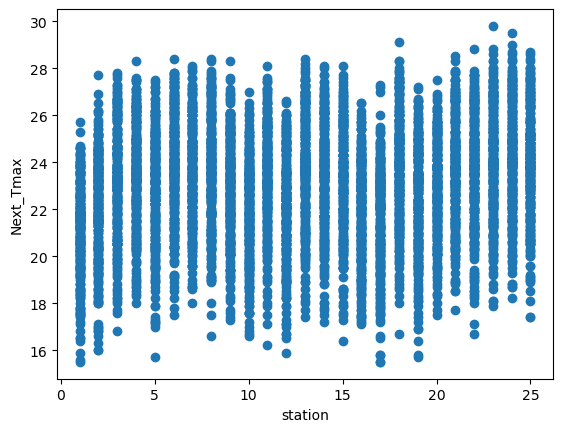

In [101]:
plt.scatter(x='station',y='Next_Tmin',data=df)
plt.xlabel('station')
plt.ylabel('Next_Tmax')
plt.show()

- Station: Positive correlation with Next_Tmin.

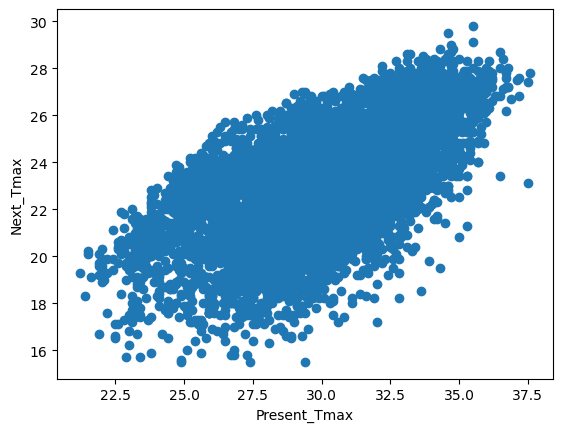

In [103]:
plt.scatter(x='Present_Tmax',y='Next_Tmin',data=df)
plt.xlabel('Present_Tmax')
plt.ylabel('Next_Tmax')
plt.show()

- Present_Tmax: Strong positive correlation with Next_Tmin.

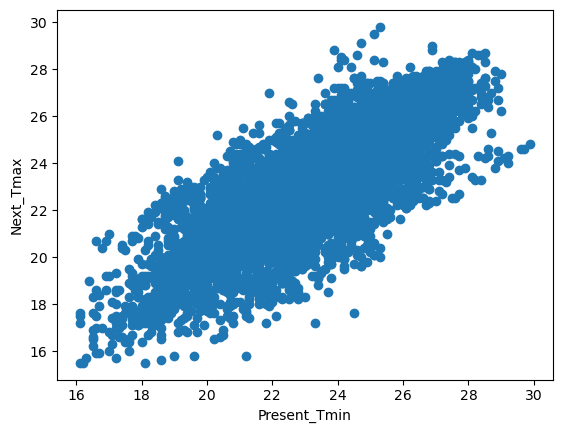

In [104]:
plt.scatter(x='Present_Tmin',y='Next_Tmin',data=df)
plt.xlabel('Present_Tmin')
plt.ylabel('Next_Tmax')
plt.show()

- Present_Tmin: Strong positive correlation with Next_Tmin.

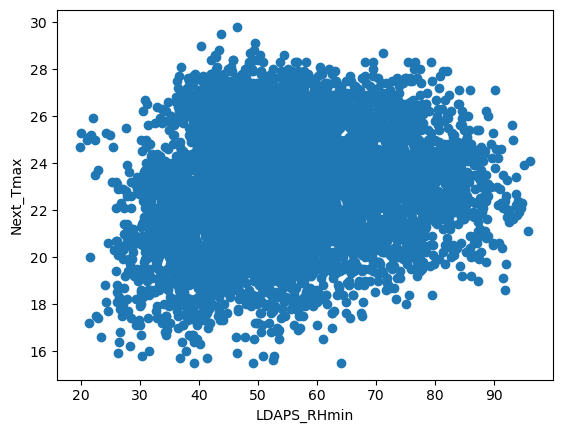

In [105]:
plt.scatter(x='LDAPS_RHmin',y='Next_Tmin',data=df)
plt.xlabel('LDAPS_RHmin')
plt.ylabel('Next_Tmax')
plt.show()

- LDAPS_RHmin: Very less positive correlation with Next_Tmin..

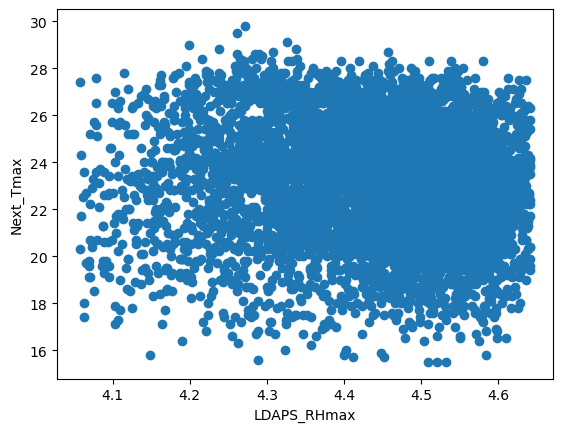

In [108]:
plt.scatter(x='LDAPS_RHmax',y='Next_Tmin',data=df)
plt.xlabel('LDAPS_RHmax')
plt.ylabel('Next_Tmax')
plt.show()

- LDAPS_Tmax_lapse:very weak negative correlation with Next_Tmin.

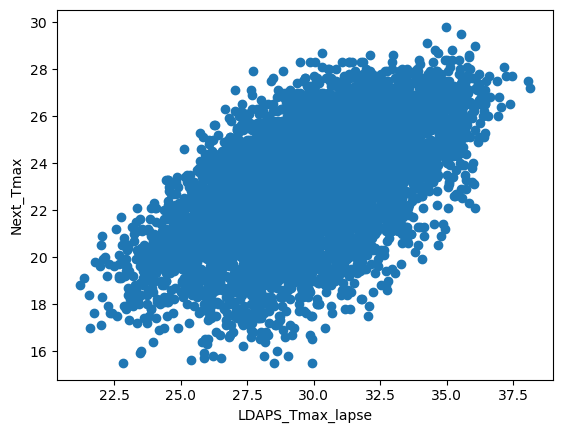

In [110]:
plt.scatter(x='LDAPS_Tmax_lapse',y='Next_Tmin',data=df)
plt.xlabel('LDAPS_Tmax_lapse')
plt.ylabel('Next_Tmax')
plt.show()

- LDAPS_Tmax_lapse: Strong positive correlation with  Next_Tmin.

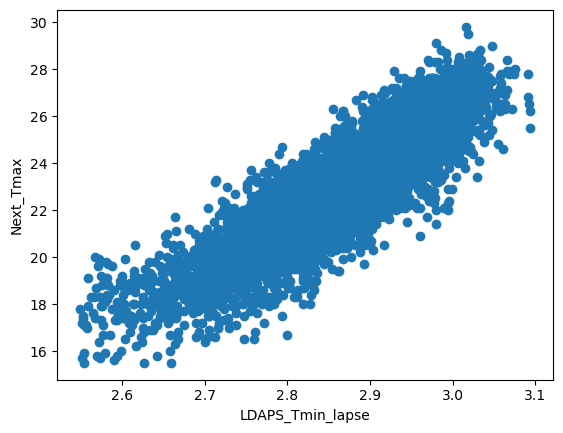

In [112]:
plt.scatter(x='LDAPS_Tmin_lapse',y='Next_Tmin',data=df)
plt.xlabel('LDAPS_Tmin_lapse')
plt.ylabel('Next_Tmax')
plt.show()

- LDAPS_Tmin_lapse: Strong positive correlation with Next_Tmin.

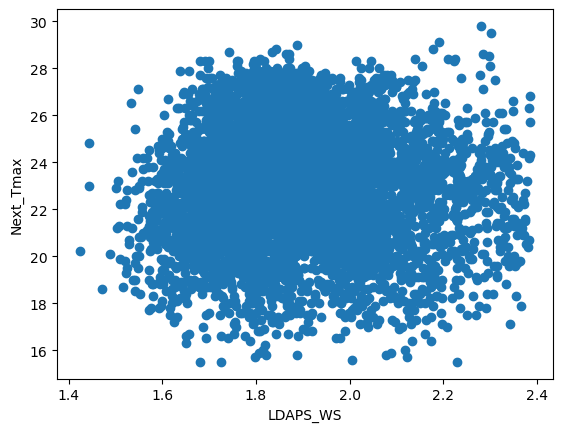

In [114]:
plt.scatter(x='LDAPS_WS',y='Next_Tmin',data=df)
plt.xlabel('LDAPS_WS')
plt.ylabel('Next_Tmax')
plt.show()

LDAPS_WS: less Negative correlation with Next_Tmin.

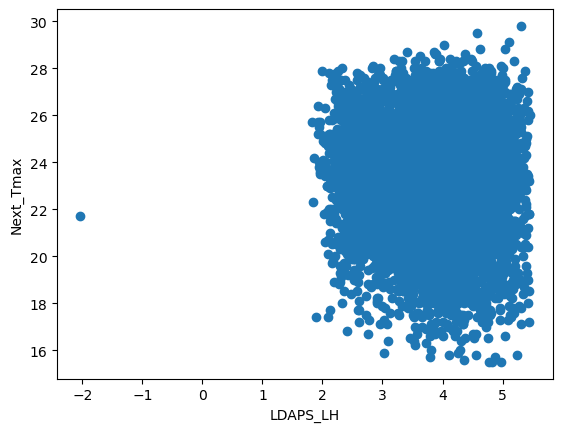

In [115]:
plt.scatter(x='LDAPS_LH',y='Next_Tmin',data=df)
plt.xlabel('LDAPS_LH')
plt.ylabel('Next_Tmax')
plt.show()

- LDAPS_LH: Weak Negative correlation with Next_Tmin.

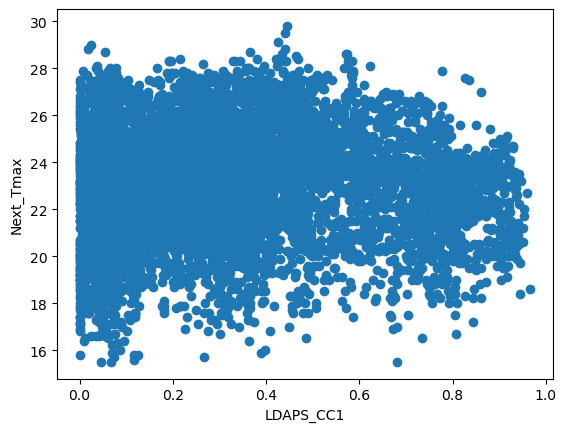

In [117]:
plt.scatter(x='LDAPS_CC1',y='Next_Tmin',data=df)
plt.xlabel('LDAPS_CC1')
plt.ylabel('Next_Tmax')
plt.show()

- LDAPS_CC1:  Weak Negative correlation with Next_Tmin.

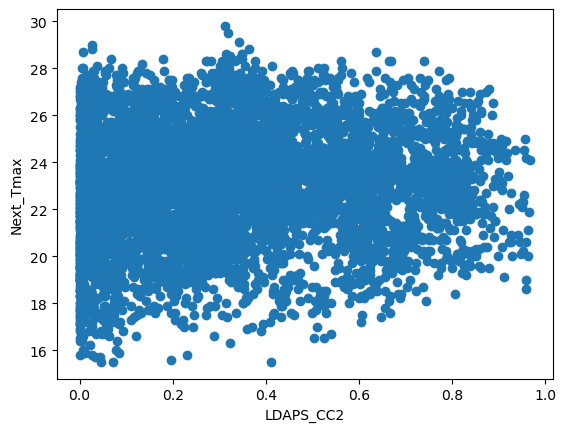

In [119]:
plt.scatter(x='LDAPS_CC2',y='Next_Tmin',data=df)
plt.xlabel('LDAPS_CC2')
plt.ylabel('Next_Tmax')
plt.show()

- LDAPS_CC2: Weak Negative correlation with Next_Tmin.

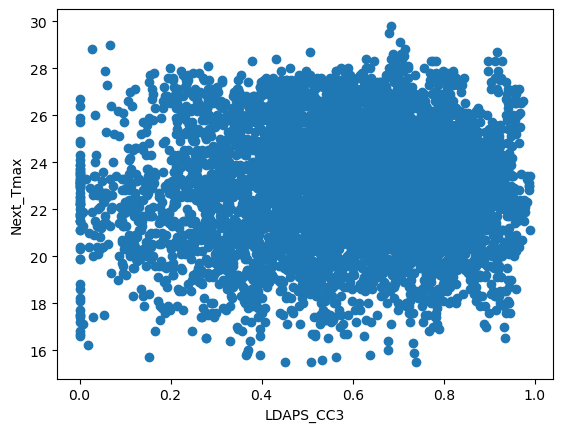

In [120]:
plt.scatter(x='LDAPS_CC3',y='Next_Tmin',data=df)
plt.xlabel('LDAPS_CC3')
plt.ylabel('Next_Tmax')
plt.show()

- LDAPS_CC3:Weak Negative correlation with Next_Tmin.

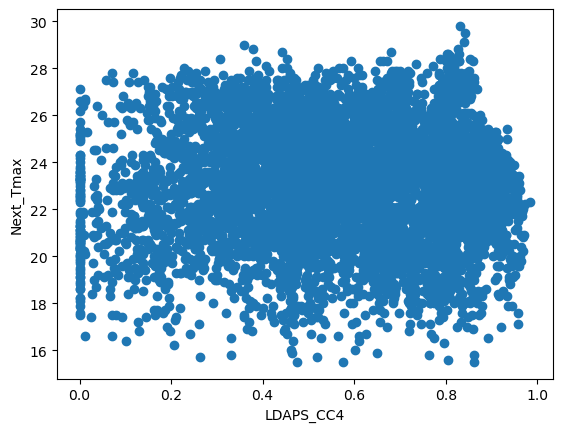

In [121]:
plt.scatter(x='LDAPS_CC4',y='Next_Tmin',data=df)
plt.xlabel('LDAPS_CC4')
plt.ylabel('Next_Tmax')
plt.show()

- LDAPS_CC4: Weak Negative correlation with Next_Tmin.

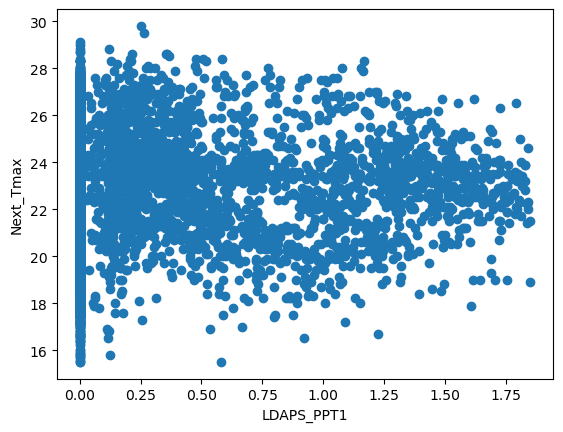

In [123]:
plt.scatter(x='LDAPS_PPT1',y='Next_Tmin',data=df)
plt.xlabel('LDAPS_PPT1')
plt.ylabel('Next_Tmax')
plt.show()

- LDAPS_PPT1: Weak Negative correlation with Next_Tmin.

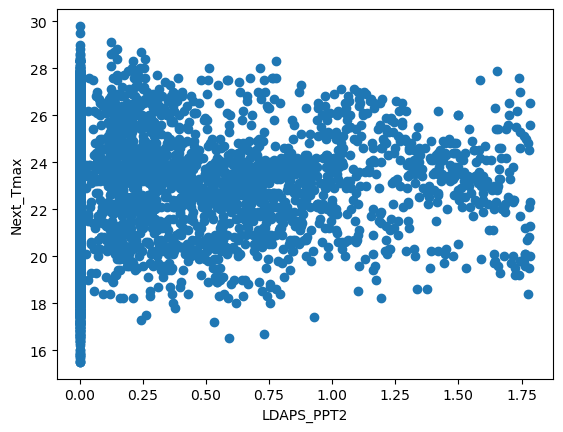

In [142]:
plt.scatter(x='LDAPS_PPT2',y='Next_Tmin',data=df)
plt.xlabel('LDAPS_PPT2')
plt.ylabel('Next_Tmax')
plt.show()

- LDAPS_PPT2: Weak Negative correlation with Next_Tmin.

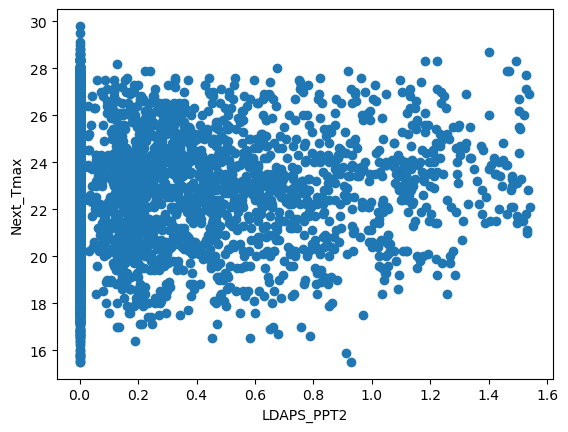

In [125]:
plt.scatter(x='LDAPS_PPT3',y='Next_Tmin',data=df)
plt.xlabel('LDAPS_PPT2')
plt.ylabel('Next_Tmax')
plt.show()

- LDAPS_PPT3: Weak Negative correlation with Next_Tmin.

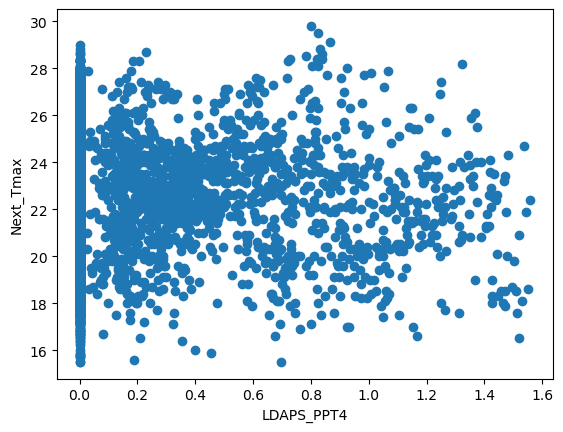

In [127]:
plt.scatter(x='LDAPS_PPT4',y='Next_Tmin',data=df)
plt.xlabel('LDAPS_PPT4')
plt.ylabel('Next_Tmax')
plt.show()

LDAPS_PPT4:Weak Negative correlation with Next_Tmin.

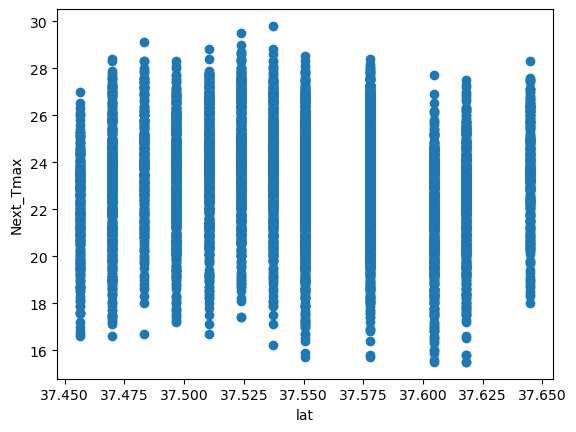

In [129]:
plt.scatter(x='lat',y='Next_Tmin',data=df)
plt.xlabel('lat')
plt.ylabel('Next_Tmax')
plt.show()

- Lat: Very weak negative correlation with Next_Tmax.

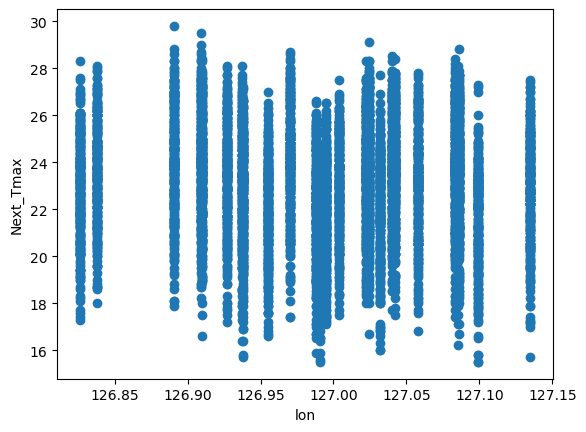

In [131]:
plt.scatter(x='lon',y='Next_Tmin',data=df)
plt.xlabel('lon')
plt.ylabel('Next_Tmax')
plt.show()

- Lon: Very weak neagative correlation with Next_Tmin.

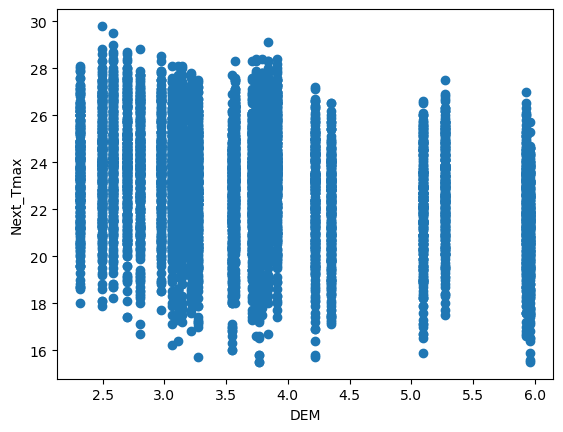

In [133]:
plt.scatter(x='DEM',y='Next_Tmin',data=df)
plt.xlabel('DEM')
plt.ylabel('Next_Tmax')
plt.show()

- DEM: Negative correlation with Next_Tmax.

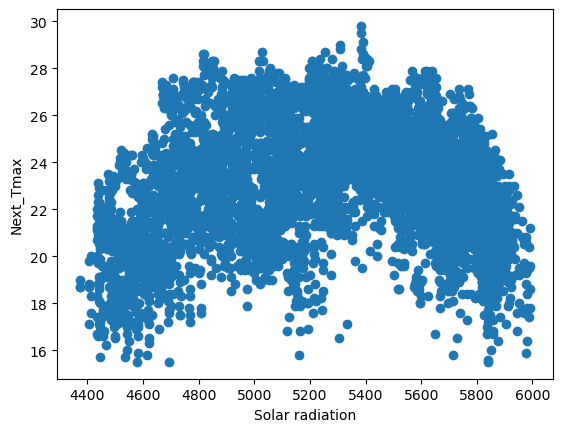

In [135]:
plt.scatter(x='Solar radiation',y='Next_Tmin',data=df)
plt.xlabel('Solar radiation')
plt.ylabel('Next_Tmax')
plt.show()

- Slope: Negative correlation with Next_Tmin.

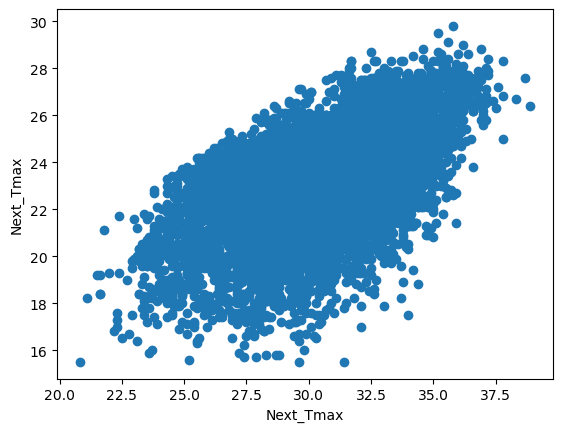

In [137]:
plt.scatter(x='Next_Tmax',y='Next_Tmin',data=df)
plt.xlabel('Next_Tmax')
plt.ylabel('Next_Tmax')
plt.show()

Solar radiation: Positive correlation with Next_Tmin.

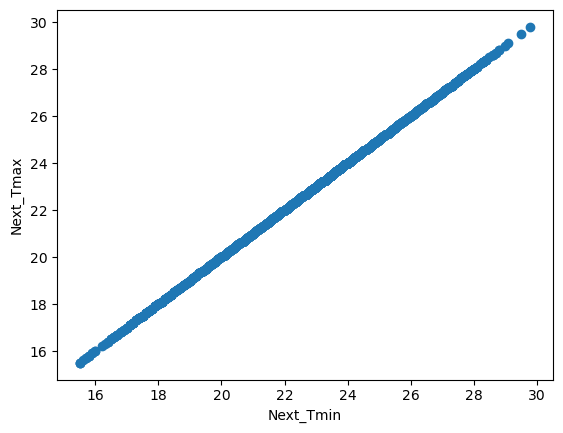

In [139]:
plt.scatter(x='Next_Tmin',y='Next_Tmin',data=df)
plt.xlabel('Next_Tmin')
plt.ylabel('Next_Tmax')
plt.show()

- Next_Tmin: Strong positive correlation with Next_Tmin.

In [143]:
# Correlationship of features with target variable-

In [144]:
df.corr()['Next_Tmin']

station             0.129780
Present_Tmax        0.616173
Present_Tmin        0.786257
LDAPS_RHmin         0.134119
LDAPS_RHmax        -0.094464
LDAPS_Tmax_lapse    0.553755
LDAPS_Tmin_lapse    0.873669
LDAPS_WS            0.000579
LDAPS_LH           -0.055304
LDAPS_CC1           0.007758
LDAPS_CC2           0.078653
LDAPS_CC3           0.043607
LDAPS_CC4           0.000255
LDAPS_PPT1         -0.035044
LDAPS_PPT2          0.006981
LDAPS_PPT3         -0.015842
LDAPS_PPT4         -0.119357
lat                -0.077214
lon                -0.041543
DEM                -0.245974
Slope              -0.156384
Solar radiation     0.083863
Next_Tmax           0.581613
Next_Tmin           1.000000
Name: Next_Tmin, dtype: float64

In [145]:
df.corr().abs()['Next_Tmin'].sort_values(ascending=True)

LDAPS_CC4           0.000255
LDAPS_WS            0.000579
LDAPS_PPT2          0.006981
LDAPS_CC1           0.007758
LDAPS_PPT3          0.015842
LDAPS_PPT1          0.035044
lon                 0.041543
LDAPS_CC3           0.043607
LDAPS_LH            0.055304
lat                 0.077214
LDAPS_CC2           0.078653
Solar radiation     0.083863
LDAPS_RHmax         0.094464
LDAPS_PPT4          0.119357
station             0.129780
LDAPS_RHmin         0.134119
Slope               0.156384
DEM                 0.245974
LDAPS_Tmax_lapse    0.553755
Next_Tmax           0.581613
Present_Tmax        0.616173
Present_Tmin        0.786257
LDAPS_Tmin_lapse    0.873669
Next_Tmin           1.000000
Name: Next_Tmin, dtype: float64

<Axes: >

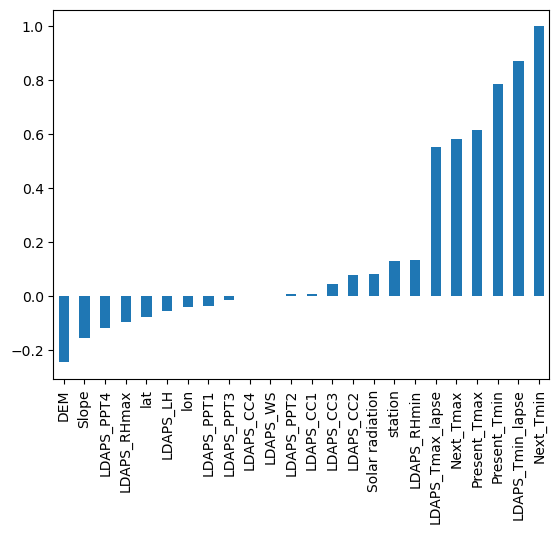

In [146]:
df.corr()['Next_Tmin'].sort_values().drop(columns=['Next_Tmin']).plot(kind='bar')

# Observations: 
From the above graph, it is evident that lon, LDAPS_CC1, LDAPS_PPT1, LDAPS_PPT2, and LDAPS_CC2 have very little correlation with the target variable. On the other hand, LDAPS_Tmin_lapse and Present_Tmin show the highest correlation with the target variable.

# Model-I:- with all features

In [150]:
df

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Date                                                                        
2013-06-30      1.0          28.7          21.4    58.255688     4.499858   
2013-06-30      2.0          31.9          21.6    52.263397     4.491419   
2013-06-30      3.0          31.6          23.3    48.690479     4.379060   
2013-06-30      4.0          32.0          23.4    58.239788     4.586534   
2013-06-30      5.0          31.4          21.9    56.174095     4.483978   
...             ...           ...           ...          ...          ...   
2017-08-30     21.0          23.1          17.8    24.688997     4.277426   
2017-08-30     22.0          22.5          17.4    30.094858     4.374125   
2017-08-30     23.0          23.3          17.1    26.741310     4.288483   
2017-08-30     24.0          23.3          17.7    24.040634     4.259746   
2017-08-30     25.0          23.2          17.4    22.933014     4.258805   

            LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  \
Date                                                                            
2013-06-30         28.074101          2.844153  1.896289  4.110499   0.233947   
2013-06-30         29.850689          2.885901  1.785468  3.731014   0.225508   
2013-06-30         30.091292          2.906984  1.830969  2.740099   0.209344   
2013-06-30         29.704629          2.857247  1.781083  4.035663   0.216372   
2013-06-30         29.113934          2.863778  1.789965  4.761697   0.151407   
...                      ...               ...       ...       ...        ...   
2017-08-30         27.812697          2.635366  1.876086  2.126355   0.052902   
2017-08-30         26.704905          2.611685  1.793400  4.347071   0.066461   
2017-08-30         26.352081          2.657859  1.832031  4.161290   0.030034   
2017-08-30         27.010193          2.655868  1.870345  3.614996   0.035874   
2017-08-30         27.939516          2.645880  1.938926  2.086997   0.048954   

            ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon  \
Date        ...                                                         
2013-06-30  ...         0.0         0.0         0.0  37.6046  126.991   
2013-06-30  ...         0.0         0.0         0.0  37.6046  127.032   
2013-06-30  ...         0.0         0.0         0.0  37.5776  127.058   
2013-06-30  ...         0.0         0.0         0.0  37.6450  127.022   
2013-06-30  ...         0.0         0.0         0.0  37.5507  127.135   
...         ...         ...         ...         ...      ...      ...   
2017-08-30  ...         0.0         0.0         0.0  37.5507  127.040   
2017-08-30  ...         0.0         0.0         0.0  37.5102  127.086   
2017-08-30  ...         0.0         0.0         0.0  37.5372  126.891   
2017-08-30  ...         0.0         0.0         0.0  37.5237  126.909   
2017-08-30  ...         0.0         0.0         0.0  37.5237  126.970   

                 DEM     Slope  Solar radiation  Next_Tmax  Next_Tmin  
Date                                                                   
2013-06-30  5.965871  1.406938      5992.895996       29.1       21.2  
2013-06-30  3.550622  0.801092      5869.312500       30.5       22.5  
2013-06-30  3.217444  0.643203      5863.555664       31.1       23.9  
2013-06-30  3.575659  1.363477      5856.964844       31.7       24.3  
2013-06-30  3.272250  0.796600      5859.552246       31.2       22.5  
...              ...       ...              ...        ...        ...  
2017-08-30  2.973771  0.830151      4456.024414       27.6       17.7  
2017-08-30  2.800629  0.510703      4441.803711       28.0       17.1  
2017-08-30  2.498004  0.537630      4443.313965       28.3       18.1  
2017-08-30  2.586099  0.605778      4438.373535       28.6       18.8  
2017-08-30  2.695484  0.647366      4451.345215       27.8       17.4  

[6740 rows x 24 columns]

In [151]:
X = df.drop('Next_Tmin', axis=1)
Y = df['Next_Tmin']

In [152]:
X

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Date                                                                        
2013-06-30      1.0          28.7          21.4    58.255688     4.499858   
2013-06-30      2.0          31.9          21.6    52.263397     4.491419   
2013-06-30      3.0          31.6          23.3    48.690479     4.379060   
2013-06-30      4.0          32.0          23.4    58.239788     4.586534   
2013-06-30      5.0          31.4          21.9    56.174095     4.483978   
...             ...           ...           ...          ...          ...   
2017-08-30     21.0          23.1          17.8    24.688997     4.277426   
2017-08-30     22.0          22.5          17.4    30.094858     4.374125   
2017-08-30     23.0          23.3          17.1    26.741310     4.288483   
2017-08-30     24.0          23.3          17.7    24.040634     4.259746   
2017-08-30     25.0          23.2          17.4    22.933014     4.258805   

            LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  \
Date                                                                            
2013-06-30         28.074101          2.844153  1.896289  4.110499   0.233947   
2013-06-30         29.850689          2.885901  1.785468  3.731014   0.225508   
2013-06-30         30.091292          2.906984  1.830969  2.740099   0.209344   
2013-06-30         29.704629          2.857247  1.781083  4.035663   0.216372   
2013-06-30         29.113934          2.863778  1.789965  4.761697   0.151407   
...                      ...               ...       ...       ...        ...   
2017-08-30         27.812697          2.635366  1.876086  2.126355   0.052902   
2017-08-30         26.704905          2.611685  1.793400  4.347071   0.066461   
2017-08-30         26.352081          2.657859  1.832031  4.161290   0.030034   
2017-08-30         27.010193          2.655868  1.870345  3.614996   0.035874   
2017-08-30         27.939516          2.645880  1.938926  2.086997   0.048954   

            ...  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat  \
Date        ...                                                            
2013-06-30  ...         0.0         0.0         0.0         0.0  37.6046   
2013-06-30  ...         0.0         0.0         0.0         0.0  37.6046   
2013-06-30  ...         0.0         0.0         0.0         0.0  37.5776   
2013-06-30  ...         0.0         0.0         0.0         0.0  37.6450   
2013-06-30  ...         0.0         0.0         0.0         0.0  37.5507   
...         ...         ...         ...         ...         ...      ...   
2017-08-30  ...         0.0         0.0         0.0         0.0  37.5507   
2017-08-30  ...         0.0         0.0         0.0         0.0  37.5102   
2017-08-30  ...         0.0         0.0         0.0         0.0  37.5372   
2017-08-30  ...         0.0         0.0         0.0         0.0  37.5237   
2017-08-30  ...         0.0         0.0         0.0         0.0  37.5237   

                lon       DEM     Slope  Solar radiation  Next_Tmax  
Date                                                                 
2013-06-30  126.991  5.965871  1.406938      5992.895996       29.1  
2013-06-30  127.032  3.550622  0.801092      5869.312500       30.5  
2013-06-30  127.058  3.217444  0.643203      5863.555664       31.1  
2013-06-30  127.022  3.575659  1.363477      5856.964844       31.7  
2013-06-30  127.135  3.272250  0.796600      5859.552246       31.2  
...             ...       ...       ...              ...        ...  
2017-08-30  127.040  2.973771  0.830151      4456.024414       27.6  
2017-08-30  127.086  2.800629  0.510703      4441.803711       28.0  
2017-08-30  126.891  2.498004  0.537630      4443.313965       28.3  
2017-08-30  126.909  2.586099  0.605778      4438.373535       28.6  
2017-08-30  126.970  2.695484  0.647366      4451.345215       27.8  

[6740 rows x 23 columns]

In [153]:
X.shape

(6740, 23)

In [154]:
Y.shape

(6740,)

# Feature Scaling

In [155]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X 

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0    -1.672247     -0.425379     -0.813497     0.195832     0.449854   
1    -1.533506      0.690369     -0.726877    -0.236706     0.379639   
2    -1.394764      0.585768      0.009395    -0.494608    -0.555281   
3    -1.256023      0.725237      0.052705     0.194685     1.171070   
4    -1.117281      0.516034     -0.596947     0.045578     0.317721   
...        ...           ...           ...          ...          ...   
6735  1.102584     -2.377939     -2.372660    -2.227094    -1.400959   
6736  1.241325     -2.587142     -2.545900    -1.836886    -0.596342   
6737  1.380067     -2.308205     -2.675830    -2.078953    -1.308956   
6738  1.518808     -2.308205     -2.415970    -2.273895    -1.548066   
6739  1.657550     -2.343072     -2.545900    -2.353846    -1.555899   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  ...  \
0            -0.661843         -0.254901  0.064570  0.391322  -0.440302  ...   
1            -0.016305          0.199561 -0.619482 -0.110100  -0.473856  ...   
2             0.071120          0.429067 -0.338627 -1.419420  -0.538125  ...   
3            -0.069377         -0.112355 -0.646553  0.292440  -0.510181  ...   
4            -0.284011         -0.041268 -0.591725  1.251765  -0.768477  ...   
...                ...               ...       ...       ...        ...  ...   
6735         -0.756827         -2.527713 -0.060137 -2.230374  -1.160123  ...   
6736         -1.159353         -2.785495 -0.570524  0.703911  -1.106214  ...   
6737         -1.287554         -2.282859 -0.332067  0.458434  -1.251045  ...   
6738         -1.048423         -2.304531 -0.095574 -0.263398  -1.227827  ...   
6739         -0.710746         -2.413254  0.327753 -2.282378  -1.175823  ...   

      LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4       lat       lon  \
0      -0.539408    -0.48482   -0.464964   -0.407186  1.210944  0.002925   
1      -0.539408    -0.48482   -0.464964   -0.407186  1.210944  0.518771   
2      -0.539408    -0.48482   -0.464964   -0.407186  0.671264  0.845892   
3      -0.539408    -0.48482   -0.464964   -0.407186  2.018464  0.392955   
4      -0.539408    -0.48482   -0.464964   -0.407186  0.133584  1.814676   
...          ...         ...         ...         ...       ...       ...   
6735   -0.539408    -0.48482   -0.464964   -0.407186  0.133584  0.619424   
6736   -0.539408    -0.48482   -0.464964   -0.407186 -0.675936  1.198177   
6737   -0.539408    -0.48482   -0.464964   -0.407186 -0.136256 -1.255235   
6738   -0.539408    -0.48482   -0.464964   -0.407186 -0.406096 -1.028766   
6739   -0.539408    -0.48482   -0.464964   -0.407186 -0.406096 -0.261289   

           DEM     Slope  Solar radiation  Next_Tmax  
0     2.364830  1.291600         1.543139  -0.489092  
1    -0.136160 -0.415822         1.249602  -0.010633  
2    -0.481166 -0.860791         1.235929   0.194421  
3    -0.110234  1.169116         1.220274   0.399475  
4    -0.424414 -0.428481         1.226420   0.228597  
...        ...       ...              ...        ...  
6735 -0.733489 -0.333926        -2.107247  -1.001727  
6736 -0.912777 -1.234210        -2.141024  -0.865024  
6737 -1.226146 -1.158322        -2.137437  -0.762497  
6738 -1.134923 -0.966266        -2.149172  -0.659970  
6739 -1.021655 -0.849059        -2.118361  -0.933375  

[6740 rows x 23 columns]

# Assessing multicollinearity among features.

In [156]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [157]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Features']=X.columns
vif

VIF Values          Features
0     1.256832           station
1     2.780452      Present_Tmax
2     3.068254      Present_Tmin
3     5.942852       LDAPS_RHmin
4     2.208894       LDAPS_RHmax
5     8.204436  LDAPS_Tmax_lapse
6     6.848666  LDAPS_Tmin_lapse
7     1.246146          LDAPS_WS
8     1.525761          LDAPS_LH
9     4.853984         LDAPS_CC1
10    5.394436         LDAPS_CC2
11    3.739884         LDAPS_CC3
12    2.612874         LDAPS_CC4
13    2.654430        LDAPS_PPT1
14    2.199652        LDAPS_PPT2
15    1.571373        LDAPS_PPT3
16    1.575040        LDAPS_PPT4
17    1.243414               lat
18    1.184974               lon
19    3.146341               DEM
20    2.867366             Slope
21    1.245994   Solar radiation
22    4.135199         Next_Tmax

In [158]:
df.corr()['Next_Tmin']

station             0.129780
Present_Tmax        0.616173
Present_Tmin        0.786257
LDAPS_RHmin         0.134119
LDAPS_RHmax        -0.094464
LDAPS_Tmax_lapse    0.553755
LDAPS_Tmin_lapse    0.873669
LDAPS_WS            0.000579
LDAPS_LH           -0.055304
LDAPS_CC1           0.007758
LDAPS_CC2           0.078653
LDAPS_CC3           0.043607
LDAPS_CC4           0.000255
LDAPS_PPT1         -0.035044
LDAPS_PPT2          0.006981
LDAPS_PPT3         -0.015842
LDAPS_PPT4         -0.119357
lat                -0.077214
lon                -0.041543
DEM                -0.245974
Slope              -0.156384
Solar radiation     0.083863
Next_Tmax           0.581613
Next_Tmin           1.000000
Name: Next_Tmin, dtype: float64

Here, I'm dropping the multicollinear features along with those least correlated with the target variable.

The longitude,latitude,Slope,Solar radiation,Station has the least correlation with target variable so we will be dropping theses columns.

In [159]:
X=X.drop(columns=['station', 'lat',  'lon',   'Slope', 'Solar radiation'])
X

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
0        -0.425379     -0.813497     0.195832     0.449854         -0.661843   
1         0.690369     -0.726877    -0.236706     0.379639         -0.016305   
2         0.585768      0.009395    -0.494608    -0.555281          0.071120   
3         0.725237      0.052705     0.194685     1.171070         -0.069377   
4         0.516034     -0.596947     0.045578     0.317721         -0.284011   
...            ...           ...          ...          ...               ...   
6735     -2.377939     -2.372660    -2.227094    -1.400959         -0.756827   
6736     -2.587142     -2.545900    -1.836886    -0.596342         -1.159353   
6737     -2.308205     -2.675830    -2.078953    -1.308956         -1.287554   
6738     -2.308205     -2.415970    -2.273895    -1.548066         -1.048423   
6739     -2.343072     -2.545900    -2.353846    -1.555899         -0.710746   

      LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  \
0            -0.254901  0.064570  0.391322  -0.440302  -0.526633  -0.255209   
1             0.199561 -0.619482 -0.110100  -0.473856  -0.327639  -0.267061   
2             0.429067 -0.338627 -1.419420  -0.538125  -0.303955  -0.050202   
3            -0.112355 -0.646553  0.292440  -0.510181  -0.434747  -0.258037   
4            -0.041268 -0.591725  1.251765  -0.768477  -0.335021  -0.168180   
...                ...       ...       ...        ...        ...        ...   
6735         -2.527713 -0.060137 -2.230374  -1.160123  -1.248726  -2.795370   
6736         -2.785495 -0.570524  0.703911  -1.106214  -1.272212  -2.756375   
6737         -2.282859 -0.332067  0.458434  -1.251045  -1.037302  -2.795370   
6738         -2.304531 -0.095574 -0.263398  -1.227827  -1.062543  -2.795370   
6739         -2.413254  0.327753 -2.282378  -1.175823  -1.125280  -2.795370   

      LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4       DEM  \
0     -0.301709   -0.539408    -0.48482   -0.464964   -0.407186  2.364830   
1     -0.320107   -0.539408    -0.48482   -0.464964   -0.407186 -0.136160   
2     -0.239618   -0.539408    -0.48482   -0.464964   -0.407186 -0.481166   
3     -0.282938   -0.539408    -0.48482   -0.464964   -0.407186 -0.110234   
4     -0.097963   -0.539408    -0.48482   -0.464964   -0.407186 -0.424414   
...         ...         ...         ...         ...         ...       ...   
6735  -1.819314   -0.539408    -0.48482   -0.464964   -0.407186 -0.733489   
6736  -1.392096   -0.539408    -0.48482   -0.464964   -0.407186 -0.912777   
6737  -2.540774   -0.539408    -0.48482   -0.464964   -0.407186 -1.226146   
6738  -2.540774   -0.539408    -0.48482   -0.464964   -0.407186 -1.134923   
6739  -2.132090   -0.539408    -0.48482   -0.464964   -0.407186 -1.021655   

      Next_Tmax  
0     -0.489092  
1     -0.010633  
2      0.194421  
3      0.399475  
4      0.228597  
...         ...  
6735  -1.001727  
6736  -0.865024  
6737  -0.762497  
6738  -0.659970  
6739  -0.933375  

[6740 rows x 18 columns]

In [160]:
X.shape

(6740, 18)

In [161]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Features']=X.columns
vif

VIF Values          Features
0     2.753482      Present_Tmax
1     2.976613      Present_Tmin
2     5.388733       LDAPS_RHmin
3     2.151185       LDAPS_RHmax
4     7.408593  LDAPS_Tmax_lapse
5     6.504886  LDAPS_Tmin_lapse
6     1.215891          LDAPS_WS
7     1.504330          LDAPS_LH
8     4.755414         LDAPS_CC1
9     5.366901         LDAPS_CC2
10    3.712298         LDAPS_CC3
11    2.602983         LDAPS_CC4
12    2.648060        LDAPS_PPT1
13    2.197973        LDAPS_PPT2
14    1.552645        LDAPS_PPT3
15    1.564126        LDAPS_PPT4
16    1.163006               DEM
17    4.039455         Next_Tmax

Now that the multicollinearity issue has been addressed and is within an acceptable range, we can proceed with confidence to the next step of model building.

In [163]:
X

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
0        -0.425379     -0.813497     0.195832     0.449854         -0.661843   
1         0.690369     -0.726877    -0.236706     0.379639         -0.016305   
2         0.585768      0.009395    -0.494608    -0.555281          0.071120   
3         0.725237      0.052705     0.194685     1.171070         -0.069377   
4         0.516034     -0.596947     0.045578     0.317721         -0.284011   
...            ...           ...          ...          ...               ...   
6735     -2.377939     -2.372660    -2.227094    -1.400959         -0.756827   
6736     -2.587142     -2.545900    -1.836886    -0.596342         -1.159353   
6737     -2.308205     -2.675830    -2.078953    -1.308956         -1.287554   
6738     -2.308205     -2.415970    -2.273895    -1.548066         -1.048423   
6739     -2.343072     -2.545900    -2.353846    -1.555899         -0.710746   

      LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  \
0            -0.254901  0.064570  0.391322  -0.440302  -0.526633  -0.255209   
1             0.199561 -0.619482 -0.110100  -0.473856  -0.327639  -0.267061   
2             0.429067 -0.338627 -1.419420  -0.538125  -0.303955  -0.050202   
3            -0.112355 -0.646553  0.292440  -0.510181  -0.434747  -0.258037   
4            -0.041268 -0.591725  1.251765  -0.768477  -0.335021  -0.168180   
...                ...       ...       ...        ...        ...        ...   
6735         -2.527713 -0.060137 -2.230374  -1.160123  -1.248726  -2.795370   
6736         -2.785495 -0.570524  0.703911  -1.106214  -1.272212  -2.756375   
6737         -2.282859 -0.332067  0.458434  -1.251045  -1.037302  -2.795370   
6738         -2.304531 -0.095574 -0.263398  -1.227827  -1.062543  -2.795370   
6739         -2.413254  0.327753 -2.282378  -1.175823  -1.125280  -2.795370   

      LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4       DEM  \
0     -0.301709   -0.539408    -0.48482   -0.464964   -0.407186  2.364830   
1     -0.320107   -0.539408    -0.48482   -0.464964   -0.407186 -0.136160   
2     -0.239618   -0.539408    -0.48482   -0.464964   -0.407186 -0.481166   
3     -0.282938   -0.539408    -0.48482   -0.464964   -0.407186 -0.110234   
4     -0.097963   -0.539408    -0.48482   -0.464964   -0.407186 -0.424414   
...         ...         ...         ...         ...         ...       ...   
6735  -1.819314   -0.539408    -0.48482   -0.464964   -0.407186 -0.733489   
6736  -1.392096   -0.539408    -0.48482   -0.464964   -0.407186 -0.912777   
6737  -2.540774   -0.539408    -0.48482   -0.464964   -0.407186 -1.226146   
6738  -2.540774   -0.539408    -0.48482   -0.464964   -0.407186 -1.134923   
6739  -2.132090   -0.539408    -0.48482   -0.464964   -0.407186 -1.021655   

      Next_Tmax  
0     -0.489092  
1     -0.010633  
2      0.194421  
3      0.399475  
4      0.228597  
...         ...  
6735  -1.001727  
6736  -0.865024  
6737  -0.762497  
6738  -0.659970  
6739  -0.933375  

[6740 rows x 18 columns]

In [164]:
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=i) 
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)   
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is', maxacc,'at random state',maxrs) 

Best accuracy is 0.8483934880998272 at random state 34


In [165]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=maxrs)

20% of the dataset will be used for testing, and the remaining 80% for training our machine learning models.

In [167]:
def evaluate_regression(model, X, Y):
    print('Model Name:',model)
    # Splitting data into train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=maxrs)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting y_test
    pred = model.predict(X_test)
    
    # Predicting y_train
    train = model.predict(X_train)
    
    
    # R-squared Score
    r2 = r2_score(Y_test, pred)
    print("R-squared Score:", r2)
    
    #R-squared Score on training data
    r3 = r2_score(Y_train, train)
    print("R-squared Score on training data:", r3*100)
    
    # Mean Absolute Error
    mae = mean_absolute_error(Y_test, pred)
    print("Mean Absolute Error:", mae)
    
    # Mean Squared Error
    mse = mean_squared_error(Y_test, pred)
    print("Mean Squared Error:", mse)
    
    # Root Mean Squared Error
    rmse =np.sqrt(mean_squared_error(Y_test, pred))
    print("Root Mean Squared Error:", rmse)
    
    
    
    # Cross Validation Score
    cv_score = cross_val_score(model, X, Y, cv=5, scoring='r2') 
    print("\nCross Validation Score:", cv_score)
    print("Cross Validation Score Mean:", cv_score.mean())
    
    # Result of accuracy minus cv scores
    result = r2 - cv_score.mean()
    print("R-squared Score - Cross Validation Score is", result*100)


In [168]:
# Linear Regression
LR = LinearRegression()
evaluate_regression(LR,X, Y)

Model Name: LinearRegression()
R-squared Score: 0.8464768403279321
R-squared Score on training data: 83.34477790855499
Mean Absolute Error: 0.7388012645223323
Mean Squared Error: 0.8690148745629358
Root Mean Squared Error: 0.9322096730687447

Cross Validation Score: [0.73866228 0.67450678 0.79737932 0.86625018 0.86246306]
Cross Validation Score Mean: 0.7878523216248274
R-squared Score - Cross Validation Score is 5.86245187031047


In [169]:
# Ridge Regressor
RDG = Ridge()
evaluate_regression(RDG,X, Y)

Model Name: Ridge()
R-squared Score: 0.846483694468618
R-squared Score on training data: 83.34477210320269
Mean Absolute Error: 0.7387678644750642
Mean Squared Error: 0.8689760768322149
Root Mean Squared Error: 0.932188863284804

Cross Validation Score: [0.73869606 0.67455923 0.79735657 0.8662623  0.86248021]
Cross Validation Score Mean: 0.7878708751842534
R-squared Score - Cross Validation Score is 5.861281928436468


In [170]:
# Lasso Regressor
LS = Lasso()
evaluate_regression(LS,X, Y)

Model Name: Lasso()
R-squared Score: 0.6078138276279483
R-squared Score on training data: 58.492798348918406
Mean Absolute Error: 1.1978320378096086
Mean Squared Error: 2.219962239685618
Root Mean Squared Error: 1.4899537709894284

Cross Validation Score: [0.53576197 0.40644017 0.58458481 0.49304433 0.63501376]
Cross Validation Score Mean: 0.5309690093592924
R-squared Score - Cross Validation Score is 7.684481826865596


In [171]:
# Decision Tree Regression
DT = DecisionTreeRegressor()
evaluate_regression(DT,X, Y)

Model Name: DecisionTreeRegressor()
R-squared Score: 0.7861769483457385
R-squared Score on training data: 100.0
Mean Absolute Error: 0.8161721068249258
Mean Squared Error: 1.2103412462908012
Root Mean Squared Error: 1.100155101015671

Cross Validation Score: [0.48168862 0.4142971  0.5589356  0.73024593 0.6563796 ]
Cross Validation Score Mean: 0.5683093702421895
R-squared Score - Cross Validation Score is 21.786757810354896


In [172]:
# Random Forest Regression
RFR = RandomForestRegressor()
evaluate_regression(RFR,X, Y)

Model Name: RandomForestRegressor()
R-squared Score: 0.904566463319691
R-squared Score on training data: 98.47466588892331
Mean Absolute Error: 0.5599250741839763
Mean Squared Error: 0.5401996876854599
Root Mean Squared Error: 0.7349827805367006

Cross Validation Score: [0.72382011 0.68013694 0.78473087 0.86655559 0.83927341]
Cross Validation Score Mean: 0.7789033830296929
R-squared Score - Cross Validation Score is 12.566308028999817


In [173]:
# Extra Tree Regression
ETR = ExtraTreesRegressor()
evaluate_regression(ETR,X, Y)

Model Name: ExtraTreesRegressor()
R-squared Score: 0.9149732764842237
R-squared Score on training data: 99.99999989290158
Mean Absolute Error: 0.5213367952522251
Mean Squared Error: 0.4812921231454001
Root Mean Squared Error: 0.6937522058670517

Cross Validation Score: [0.72343618 0.66788968 0.79168079 0.8617512  0.86012567]
Cross Validation Score Mean: 0.7809767027486898
R-squared Score - Cross Validation Score is 13.399657373553387


In [174]:
# ADA Boost Regressor
ABR = AdaBoostRegressor()
evaluate_regression(ABR,X, Y)

Model Name: AdaBoostRegressor()
R-squared Score: 0.8244717619370373
R-squared Score on training data: 81.08969436497367
Mean Absolute Error: 0.8016465718661188
Mean Squared Error: 0.9935741949837639
Root Mean Squared Error: 0.9967819194707355

Cross Validation Score: [0.70286245 0.60077447 0.75403413 0.83006408 0.82910255]
Cross Validation Score Mean: 0.7433675360529742
R-squared Score - Cross Validation Score is 8.110422588406308


In [175]:
# GradientBoostingRegressor
GBR = GradientBoostingRegressor()
evaluate_regression(GBR,X, Y)

Model Name: GradientBoostingRegressor()
R-squared Score: 0.8929533107529701
R-squared Score on training data: 89.99016059564278
Mean Absolute Error: 0.6074008818463775
Mean Squared Error: 0.6059357130682501
Root Mean Squared Error: 0.7784187260518918

Cross Validation Score: [0.73705044 0.69229244 0.81918937 0.87984333 0.87887661]
Cross Validation Score Mean: 0.8014504370042083
R-squared Score - Cross Validation Score is 9.150287374876187


In [176]:
# XGBRegressor
XGBR = XGBRegressor()
evaluate_regression(XGBR,X, Y)

Model Name: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
R-squared Score: 0.9268029832029966
R-squared Score on training data: 99.24038645382049
Mean Absolute Error: 0.49285274075471336
Mean Squared Error: 0.414330297175366
Root Mean Squared Error: 0.6436849362656905

Cross Validation Score: [0.72

I'm selecting XGBRegressor as the best model because it exhibits the smallest disparity between the test accuracy and cross-validation score. Moreover, both the train and test accuracies are promising and closely aligned.

# Hyper parameter tuning on the best ML Model

In [178]:
# Choosing the XGBRegressor as best model
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]
}

In [179]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=XGBR, param_grid=param_grid, cv=5)

In [180]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...one,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]})

In [181]:
best_params = grid_search.best_params_
best_params

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}

In [182]:
final_model_1 = XGBRegressor(learning_rate=0.1, max_depth=5, n_estimators=300)

In [183]:
final_model_1.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [184]:
pred = final_model_1.predict(X_test)

In [185]:
mse = mean_squared_error(Y_test, pred)

In [186]:
print("Mean Squared Error:", mse)

Mean Squared Error: 0.364981124353217


In [187]:
r2_score(Y_test,pred)

0.9355211779780511

# Saving the model

In [188]:
import joblib

filename = "FinalModel_14.pkl"
joblib.dump(final_model_1, filename)

['FinalModel_14.pkl']

In [189]:
model=joblib.load("FinalModel_14.pkl")

prediction=model.predict(X_test)
prediction

array([16.664738, 23.309011, 21.83404 , ..., 26.368275, 25.26354 ,
       19.813679], dtype=float32)

In [190]:
a=np.array(Y_test)
df=pd.DataFrame()
df['Predicted']=prediction
df['Original']=a
df

Predicted  Original
0     16.664738      15.9
1     23.309011      23.6
2     21.834040      23.4
3     22.320868      21.7
4     22.823572      22.9
...         ...       ...
1343  26.303717      26.6
1344  20.737144      20.6
1345  26.368275      25.9
1346  25.263540      26.0
1347  19.813679      19.9

[1348 rows x 2 columns]

In [191]:
df.tail()

Predicted  Original
1343  26.303717      26.6
1344  20.737144      20.6
1345  26.368275      25.9
1346  25.263540      26.0
1347  19.813679      19.9

# Model-II:-applying Select K-Best feature method for feature selection

In [194]:
X

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
0        -0.425379     -0.813497     0.195832     0.449854         -0.661843   
1         0.690369     -0.726877    -0.236706     0.379639         -0.016305   
2         0.585768      0.009395    -0.494608    -0.555281          0.071120   
3         0.725237      0.052705     0.194685     1.171070         -0.069377   
4         0.516034     -0.596947     0.045578     0.317721         -0.284011   
...            ...           ...          ...          ...               ...   
6735     -2.377939     -2.372660    -2.227094    -1.400959         -0.756827   
6736     -2.587142     -2.545900    -1.836886    -0.596342         -1.159353   
6737     -2.308205     -2.675830    -2.078953    -1.308956         -1.287554   
6738     -2.308205     -2.415970    -2.273895    -1.548066         -1.048423   
6739     -2.343072     -2.545900    -2.353846    -1.555899         -0.710746   

      LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  \
0            -0.254901  0.064570  0.391322  -0.440302  -0.526633  -0.255209   
1             0.199561 -0.619482 -0.110100  -0.473856  -0.327639  -0.267061   
2             0.429067 -0.338627 -1.419420  -0.538125  -0.303955  -0.050202   
3            -0.112355 -0.646553  0.292440  -0.510181  -0.434747  -0.258037   
4            -0.041268 -0.591725  1.251765  -0.768477  -0.335021  -0.168180   
...                ...       ...       ...        ...        ...        ...   
6735         -2.527713 -0.060137 -2.230374  -1.160123  -1.248726  -2.795370   
6736         -2.785495 -0.570524  0.703911  -1.106214  -1.272212  -2.756375   
6737         -2.282859 -0.332067  0.458434  -1.251045  -1.037302  -2.795370   
6738         -2.304531 -0.095574 -0.263398  -1.227827  -1.062543  -2.795370   
6739         -2.413254  0.327753 -2.282378  -1.175823  -1.125280  -2.795370   

      LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4       DEM  \
0     -0.301709   -0.539408    -0.48482   -0.464964   -0.407186  2.364830   
1     -0.320107   -0.539408    -0.48482   -0.464964   -0.407186 -0.136160   
2     -0.239618   -0.539408    -0.48482   -0.464964   -0.407186 -0.481166   
3     -0.282938   -0.539408    -0.48482   -0.464964   -0.407186 -0.110234   
4     -0.097963   -0.539408    -0.48482   -0.464964   -0.407186 -0.424414   
...         ...         ...         ...         ...         ...       ...   
6735  -1.819314   -0.539408    -0.48482   -0.464964   -0.407186 -0.733489   
6736  -1.392096   -0.539408    -0.48482   -0.464964   -0.407186 -0.912777   
6737  -2.540774   -0.539408    -0.48482   -0.464964   -0.407186 -1.226146   
6738  -2.540774   -0.539408    -0.48482   -0.464964   -0.407186 -1.134923   
6739  -2.132090   -0.539408    -0.48482   -0.464964   -0.407186 -1.021655   

      Next_Tmax  
0     -0.489092  
1     -0.010633  
2      0.194421  
3      0.399475  
4      0.228597  
...         ...  
6735  -1.001727  
6736  -0.865024  
6737  -0.762497  
6738  -0.659970  
6739  -0.933375  

[6740 rows x 18 columns]

In [195]:
Y

Date
2013-06-30    21.2
2013-06-30    22.5
2013-06-30    23.9
2013-06-30    24.3
2013-06-30    22.5
              ... 
2017-08-30    17.7
2017-08-30    17.1
2017-08-30    18.1
2017-08-30    18.8
2017-08-30    17.4
Name: Next_Tmin, Length: 6740, dtype: float64

# Performing feature selection using the select k-best method.

In [196]:
from sklearn.feature_selection import SelectKBest,f_classif

In [197]:
# Instantiate SelectKBest with f_classif scoring function and select top 16 features
best_features = SelectKBest(score_func=f_classif, k=18)

# Fit SelectKBest to features and target variable
fit = best_features.fit(x, y)

# Create DataFrame of feature scores
df_scores = pd.DataFrame(fit.scores_)

# Create DataFrame of feature names
df_columns = pd.DataFrame(x.columns)

# Concatenate scores and feature names
feature_score = pd.concat([df_scores, df_columns], axis=1)
feature_score.columns = ['score', 'feature_name']

# Print top 11 features based on scores
print(feature_score.nlargest(12, 'score'))

         score      feature_name
5   100.761133  LDAPS_Tmax_lapse
22   28.785418         Next_Tmin
1    27.421366      Present_Tmax
6    26.552492  LDAPS_Tmin_lapse
11   18.722782         LDAPS_CC3
10   15.833986         LDAPS_CC2
12   14.285273         LDAPS_CC4
2    14.171371      Present_Tmin
9    13.281908         LDAPS_CC1
3    12.415072       LDAPS_RHmin
7     8.732292          LDAPS_WS
15    7.728626        LDAPS_PPT3


In [199]:
df3=X[["LDAPS_Tmax_lapse", "Present_Tmax", "LDAPS_Tmin_lapse", "LDAPS_CC3", "LDAPS_CC2", "LDAPS_CC4", "Present_Tmin", "LDAPS_CC1", "LDAPS_RHmin", "LDAPS_WS", "LDAPS_PPT3"]
]

In [200]:
df3

LDAPS_Tmax_lapse  Present_Tmax  LDAPS_Tmin_lapse  LDAPS_CC3  LDAPS_CC2  \
0            -0.661843     -0.425379         -0.254901  -0.255209  -0.526633   
1            -0.016305      0.690369          0.199561  -0.267061  -0.327639   
2             0.071120      0.585768          0.429067  -0.050202  -0.303955   
3            -0.069377      0.725237         -0.112355  -0.258037  -0.434747   
4            -0.284011      0.516034         -0.041268  -0.168180  -0.335021   
...                ...           ...               ...        ...        ...   
6735         -0.756827     -2.377939         -2.527713  -2.795370  -1.248726   
6736         -1.159353     -2.587142         -2.785495  -2.756375  -1.272212   
6737         -1.287554     -2.308205         -2.282859  -2.795370  -1.037302   
6738         -1.048423     -2.308205         -2.304531  -2.795370  -1.062543   
6739         -0.710746     -2.343072         -2.413254  -2.795370  -1.125280   

      LDAPS_CC4  Present_Tmin  LDAPS_CC1  LDAPS_RHmin  LDAPS_WS  LDAPS_PPT3  
0     -0.301709     -0.813497  -0.440302     0.195832  0.064570   -0.464964  
1     -0.320107     -0.726877  -0.473856    -0.236706 -0.619482   -0.464964  
2     -0.239618      0.009395  -0.538125    -0.494608 -0.338627   -0.464964  
3     -0.282938      0.052705  -0.510181     0.194685 -0.646553   -0.464964  
4     -0.097963     -0.596947  -0.768477     0.045578 -0.591725   -0.464964  
...         ...           ...        ...          ...       ...         ...  
6735  -1.819314     -2.372660  -1.160123    -2.227094 -0.060137   -0.464964  
6736  -1.392096     -2.545900  -1.106214    -1.836886 -0.570524   -0.464964  
6737  -2.540774     -2.675830  -1.251045    -2.078953 -0.332067   -0.464964  
6738  -2.540774     -2.415970  -1.227827    -2.273895 -0.095574   -0.464964  
6739  -2.132090     -2.545900  -1.175823    -2.353846  0.327753   -0.464964  

[6740 rows x 11 columns]

In [201]:
Y.shape

(6740,)

In [202]:
X=df3

In [203]:
X.shape

(6740, 11)

In [204]:
# Assessing multicollinearity among features.

In [205]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Features']=X.columns
vif

VIF Values          Features
0     5.681301  LDAPS_Tmax_lapse
1     2.299577      Present_Tmax
2     5.583625  LDAPS_Tmin_lapse
3     3.476120         LDAPS_CC3
4     4.074271         LDAPS_CC2
5     2.309235         LDAPS_CC4
6     2.804735      Present_Tmin
7     2.729663         LDAPS_CC1
8     3.793987       LDAPS_RHmin
9     1.100204          LDAPS_WS
10    1.310403        LDAPS_PPT3

In [206]:
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=i) 
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)   
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is', maxacc,'at random state',maxrs) 

Best accuracy is 0.824876632400627 at random state 9


In [207]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=maxrs)

20% of the dataset will be used for testing, and the remaining 80% for training our machine learning models.

# Model Building

In [209]:
def evaluate_regression(model, X, Y):
    print('Model Name:',model)
    # Splitting data into train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=maxrs)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting y_test
    pred = model.predict(X_test)
    
    # Predicting y_train
    train = model.predict(X_train)
    
    
    # R-squared Score
    r2 = r2_score(Y_test, pred)
    print("R-squared Score:", r2)
    
    #R-squared Score on training data
    r3 = r2_score(Y_train, train)
    print("R-squared Score on training data:", r3*100)
    
    # Mean Absolute Error
    mae = mean_absolute_error(Y_test, pred)
    print("Mean Absolute Error:", mae)
    
    # Mean Squared Error
    mse = mean_squared_error(Y_test, pred)
    print("Mean Squared Error:", mse)
    
    # Root Mean Squared Error
    rmse =np.sqrt(mean_squared_error(Y_test, pred))
    print("Root Mean Squared Error:", rmse)
    
    
    # Cross Validation Score
    cv_score = cross_val_score(model, X, Y, cv=5, scoring='r2') 
    print("\nCross Validation Score:", cv_score)
    print("Cross Validation Score Mean:", cv_score.mean())
    
    # Result of accuracy minus cv scores
    result = r2 - cv_score.mean()
    print("R-squared Score - Cross Validation Score is", result*100)


In [210]:
# Linear Regression
LR = LinearRegression()
evaluate_regression(LR,X, Y)

Model Name: LinearRegression()
R-squared Score: 0.8269530091443794
R-squared Score on training data: 80.02983093424898
Mean Absolute Error: 0.8073334117936296
Mean Squared Error: 1.0544391712060637
Root Mean Squared Error: 1.0268588857316587

Cross Validation Score: [0.70917994 0.64159395 0.76983336 0.85081109 0.82447473]
Cross Validation Score Mean: 0.7591786123573275
R-squared Score - Cross Validation Score is 6.777439678705188


In [211]:
# Ridge Regressor
RDG = Ridge()
evaluate_regression(RDG,X, Y)

Model Name: Ridge()
R-squared Score: 0.8269461372839588
R-squared Score on training data: 80.02982820851862
Mean Absolute Error: 0.8073508827237226
Mean Squared Error: 1.0544810439873855
Root Mean Squared Error: 1.026879274300239

Cross Validation Score: [0.70920811 0.6416224  0.7698221  0.85080953 0.82449787]
Cross Validation Score Mean: 0.7591920034157065
R-squared Score - Cross Validation Score is 6.775413386825235


In [212]:
# Lasso Regressor
LS = Lasso()
evaluate_regression(LS,X, Y)

Model Name: Lasso()
R-squared Score: 0.5864956127413953
R-squared Score on training data: 57.86728842770297
Mean Absolute Error: 1.2679765575529385
Mean Squared Error: 2.5196348184685724
Root Mean Squared Error: 1.5873357611005217

Cross Validation Score: [0.53577106 0.4064457  0.58459383 0.49304433 0.63501713]
Cross Validation Score Mean: 0.5309744121315424
R-squared Score - Cross Validation Score is 5.552120060985288


In [213]:
# Decision Tree Regression
DT = DecisionTreeRegressor()
evaluate_regression(DT,X, Y)

Model Name: DecisionTreeRegressor()
R-squared Score: 0.7976725057624057
R-squared Score on training data: 100.0
Mean Absolute Error: 0.8190652818991098
Mean Squared Error: 1.2328560830860535
Root Mean Squared Error: 1.1103405257334586

Cross Validation Score: [0.37448281 0.44121468 0.54467758 0.72058876 0.63114933]
Cross Validation Score Mean: 0.5424226307845066
R-squared Score - Cross Validation Score is 25.52498749778991


In [214]:
# Random Forest Regression
RFR = RandomForestRegressor()
evaluate_regression(RFR,X, Y)

Model Name: RandomForestRegressor()
R-squared Score: 0.8938089634168744
R-squared Score on training data: 98.25276973126287
Mean Absolute Error: 0.614202522255193
Mean Squared Error: 0.6470611713649853
Root Mean Squared Error: 0.8044011259098195

Cross Validation Score: [0.65902524 0.64809178 0.75143827 0.83804309 0.81501778]
Cross Validation Score Mean: 0.7423232290157722
R-squared Score - Cross Validation Score is 15.148573440110225


In [215]:
# Extra Tree Regression
ETR = ExtraTreesRegressor()
evaluate_regression(ETR,X, Y)

Model Name: ExtraTreesRegressor()
R-squared Score: 0.9000500656648547
R-squared Score on training data: 99.9999999931681
Mean Absolute Error: 0.597271513353116
Mean Squared Error: 0.6090318323442142
Root Mean Squared Error: 0.7804049156330413

Cross Validation Score: [0.66972204 0.6425153  0.7627343  0.84366092 0.82634417]
Cross Validation Score Mean: 0.7489953490782046
R-squared Score - Cross Validation Score is 15.105471658665003


In [216]:
# ADA Boost Regressor
ABR = AdaBoostRegressor()
evaluate_regression(ABR,X, Y)

Model Name: AdaBoostRegressor()
R-squared Score: 0.8092328982556819
R-squared Score on training data: 79.32621401451811
Mean Absolute Error: 0.8682745832347714
Mean Squared Error: 1.16241434573393
Root Mean Squared Error: 1.0781532106959242

Cross Validation Score: [0.68770984 0.59425302 0.7280937  0.81501749 0.82063758]
Cross Validation Score Mean: 0.7291423253877065
R-squared Score - Cross Validation Score is 8.009057286797539


In [217]:
# GradientBoostingRegressor
GBR = GradientBoostingRegressor()
evaluate_regression(GBR,X, Y)

Model Name: GradientBoostingRegressor()
R-squared Score: 0.8604873759621385
R-squared Score on training data: 86.14101011627497
Mean Absolute Error: 0.7293152738822702
Mean Squared Error: 0.8501018996973084
Root Mean Squared Error: 0.9220097069431039

Cross Validation Score: [0.65256834 0.6198128  0.75432629 0.83839512 0.83217505]
Cross Validation Score Mean: 0.7394555193846596
R-squared Score - Cross Validation Score is 12.103185657747895


In [218]:
# XGBRegressor
XGBR = XGBRegressor()
evaluate_regression(XGBR,X, Y)

Model Name: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
R-squared Score: 0.9004881858575815
R-squared Score on training data: 98.41373148361193
Mean Absolute Error: 0.595340018456343
Mean Squared Error: 0.6063622043395708
Root Mean Squared Error: 0.7786926250707469

Cross Validation Score: [0.573

I'm selecting Extra Tree Regressor the best model because it exhibits the smallest disparity between the test accuracy and cross-validation score. Moreover, both the train and test accuracies are promising and closely aligned.

# Hyper parameter tuning on the best ML Model

In [219]:
# Choosing the Extra Tree  Regressor as best model
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [220]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=ETR, param_grid=param_grid, cv=5)


In [221]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [239]:
best_params = grid_search.best_params_
best_params

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [240]:
final_model_1 = ExtraTreesRegressor(max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300)

In [242]:
final_model_1.fit(X_train,Y_train)

ExtraTreesRegressor(min_samples_split=5, n_estimators=300)

In [243]:
pred=final_model_1.predict(X_test)

In [244]:
mse = mean_squared_error(Y_test, pred)

In [245]:
r2_score(Y_test,pred)

0.8983209316748021

# Saving the model

In [246]:
filename = "FinalModel_15.pkl"
joblib.dump(final_model_1, filename)


['FinalModel_15.pkl']

In [247]:
model=joblib.load("FinalModel_15.pkl")
prediction=model.predict(X_test)
prediction

array([20.42491667, 23.69927778, 24.487     , ..., 21.49858333,
       20.7835    , 24.68955556])

In [248]:
a=np.array(Y_test)
df=pd.DataFrame()
df['Predicted']=prediction
df['Original']=a
df


Predicted  Original
0     20.424917      19.2
1     23.699278      24.0
2     24.487000      24.5
3     22.338472      21.8
4     21.588194      22.2
...         ...       ...
1343  23.330694      24.3
1344  24.000417      23.6
1345  21.498583      22.1
1346  20.783500      20.3
1347  24.689556      26.1

[1348 rows x 2 columns]

In [249]:
df.tail()

Predicted  Original
1343  23.330694      24.3
1344  24.000417      23.6
1345  21.498583      22.1
1346  20.783500      20.3
1347  24.689556      26.1

# Coclusion-

# 1.Maximum Temperature Prediction Model: This model predicts the maximum air temperature for the next day.

- Model-I having accuracy of 92% with XGBRegressor model.
- MModel-II having accuracy of 89% with Extra Tree regression model.

# 2.Minimum Temperature Prediction Model: This model predicts the minimum air temperature for the next day.

- Model-I having accuracy of 93% with XGBRegressor model.
- Model-II having accuracy of 89% with Extra Tree regression model.